# Houses info
<!-- ![landscape of faculty houses](landscape.png) -->
<img src="landscape.png" alt="landscape" width="600"/>
load data and solar data, same data in a year/month (2019),
house 212, 213, 214, 215 (205, 206, 208) pick these 4 houses to replace the sample data,
only load data is needed (w.r.t the form of sample data, house ID needed)

In [179]:
import os
import pandas as pd
import numpy as np

import logging.config, datetime
logger = logging.getLogger(__name__)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
house212_2019 = '/Users/Huang/Documents/DQNBattery/data/house212_2019_sift'
house213_2019 = '/Users/Huang/Documents/DQNBattery/data/house213_2019_sift'
house214_2019 = '/Users/Huang/Documents/DQNBattery/data/house214_2019_sift'
house215_2019 = '/Users/Huang/Documents/DQNBattery/data/house215_2019_sift'

house205_2019 = '/Users/Huang/Documents/DQNBattery/data/house205_2019_sift'
house206_2019 = '/Users/Huang/Documents/DQNBattery/data/house206_2019_sift'
house208_2019 = '/Users/Huang/Documents/DQNBattery/data/house208_2019_sift'

# weather 
weather_2019 = '/Users/Huang/Documents/DQNBattery/data/2019_hillside_weather'

In [3]:
def get_file_house(foldername, houseID):
    
    file_list = []  # file name stored in file_list
   
    for root, dirs, files in os.walk(foldername):
        for file in files:
            dirname, filename = os.path.split(file)

#             print(filename.split('2019', 1)[0])
            if filename.split('_', 1)[0] == houseID:
                filename = filename.split('_', 1)[1]        
                file_list.append(filename.split('.', 1)[0])

    file_list.sort()
    
    return file_list

In [4]:
def get_file_weather(foldername, houseID):
    
    file_list = []  # file name stored in file_list
   
    for root, dirs, files in os.walk(foldername):
        for file in files:
            dirname, filename = os.path.split(file)
            
#             print(filename)
#             print(filename.split('2019', 1)[0])      

            if filename.split('2019', 1)[0] == houseID:
                filename = filename.split('weather', 1)[1]        
                file_list.append(filename.split('.', 1)[0])

    file_list.sort()
    
    return file_list

In [5]:
house212_files = get_file_house(house212_2019, "house212")
house213_files = get_file_house(house213_2019, "house213")
house214_files = get_file_house(house214_2019, "house214")
house215_files = get_file_house(house215_2019, "house215")

weather_files = get_file_weather(weather_2019, "weather")

print("weather:", len(weather_files), "\n",
      "house212", len(house212_files), "\n",
      "house213", len(house213_files), "\n",
      "house214", len(house214_files), "\n",
      "house215", len(house215_files))

weather: 334 
 house212 344 
 house213 346 
 house214 334 
 house215 345


# Get the common date files

In [6]:
common = list(set(weather_files)&set(house212_files)&set(house213_files)&set(house214_files)&set(house215_files))
print(len(common))

332


In [16]:
common.sort()
print(common)

['20190101', '20190102', '20190103', '20190104', '20190105', '20190106', '20190107', '20190108', '20190109', '20190110', '20190111', '20190112', '20190113', '20190114', '20190115', '20190116', '20190117', '20190118', '20190119', '20190120', '20190121', '20190122', '20190123', '20190124', '20190126', '20190127', '20190128', '20190129', '20190130', '20190131', '20190201', '20190202', '20190205', '20190206', '20190208', '20190209', '20190210', '20190211', '20190212', '20190213', '20190214', '20190215', '20190216', '20190217', '20190218', '20190219', '20190220', '20190221', '20190222', '20190223', '20190224', '20190225', '20190226', '20190227', '20190228', '20190301', '20190302', '20190303', '20190304', '20190305', '20190306', '20190313', '20190314', '20190315', '20190316', '20190317', '20190318', '20190319', '20190320', '20190321', '20190322', '20190323', '20190324', '20190325', '20190326', '20190327', '20190328', '20190329', '20190402', '20190403', '20190404', '20190405', '20190406', '20

# generate APIS data

In [17]:
def gener_apis(houseID, common_list, inputfile_dir, outputfile_dir, outputfile_name):
    # join all common dates data into one single file for each node
    
    df = pd.read_csv(inputfile_dir + '/' + houseID + common_list[0] + ".csv")

    df.to_csv(outputfile_dir + '/' + outputfile_name, index=False)

    for i in range(1, len(common_list)):
        df = pd.read_csv(inputfile_dir + '/' + houseID + common_list[i] + ".csv", error_bad_lines=False)
        df.to_csv(outputfile_dir + '/' + outputfile_name, index=False, header=False, mode='a+')


In [18]:
common_list = common

house212_inputfile_dir = '/Users/Huang/Documents/DQNBattery/data/house212_2019_sift'
house212_outputfile_dir = '/Users/Huang/Documents/DQNBattery/data'
house212_outputfile_name = 'house212_2019_apis_all.csv'

house212_apis = gener_apis("house212_", common, house212_inputfile_dir, house212_outputfile_dir, house212_outputfile_name)


In [19]:
house213_inputfile_dir = '/Users/Huang/Documents/DQNBattery/data/house213_2019_sift'
house213_outputfile_dir = '/Users/Huang/Documents/DQNBattery/data'
house213_outputfile_name = 'house213_2019_apis_all.csv'

house213_apis = gener_apis("house213_", common, house213_inputfile_dir, house213_outputfile_dir, house213_outputfile_name)


In [20]:
house214_inputfile_dir = '/Users/Huang/Documents/DQNBattery/data/house214_2019_sift'
house214_outputfile_dir = '/Users/Huang/Documents/DQNBattery/data'
house214_outputfile_name = 'house214_2019_apis_all.csv'

house214_apis = gener_apis("house214_", common, house214_inputfile_dir, house214_outputfile_dir, house214_outputfile_name)


In [21]:
house215_inputfile_dir = '/Users/Huang/Documents/DQNBattery/data/house215_2019_sift'
house215_outputfile_dir = '/Users/Huang/Documents/DQNBattery/data'
house215_outputfile_name = 'house215_2019_apis_all.csv'

house215_apis = gener_apis("house215_", common, house215_inputfile_dir, house215_outputfile_dir, house215_outputfile_name)


In [22]:
weather_inputfile_dir = '/Users/Huang/Documents/DQNBattery/data/2019_hillside_weather'
weather_outputfile_dir = '/Users/Huang/Documents/DQNBattery/data'
weather_outputfile_name = 'weather_2019_apis_all.csv'

weather_apis = gener_apis("weather", common, weather_inputfile_dir, weather_outputfile_dir, weather_outputfile_name)


# take average value for every 30 mins

In [29]:
def timeframe(timestep, inputdata):
    # select the timestamp with every timestep mins
    # slice data for every 15 minutes
    # raw data recorded for each 30s, ~ slice data for every timestep*2 rows
    step = np.arange(0, len(inputdata), timestep * 2)
    outputdata = inputdata.loc[step, :]
    outputdata.index = range(len(outputdata))  # do not keep original index
    return outputdata

In [30]:
def timeframe_avg(timestep, inputdata):
    inputdata = inputdata.fillna(method='ffill', inplace=False)
    avg = inputdata.groupby(inputdata.index // (timestep * 2)).mean()
    timestamp = timeframe(timestep, inputdata)
    time = timestamp[['timestamp']]
    outputdata = pd.concat((time, avg), axis=1)
    return outputdata

In [31]:
timestep = 30

house212_ess_dir = '/Users/Huang/Documents/DQNBattery/data/house212_2019_apis_all.csv'
house212_inputdata = pd.read_csv(house212_ess_dir)
house212_outputdata = timeframe_avg(timestep, house212_inputdata)
house212_outputdata.to_csv('/Users/Huang/Documents/APIS/apis-emulator/data/input/Sample/house212_2019_avg.csv', index=False)


In [32]:
house213_ess_dir = '/Users/Huang/Documents/DQNBattery/data/house213_2019_apis_all.csv'
house213_inputdata = pd.read_csv(house213_ess_dir)
house213_outputdata = timeframe_avg(timestep, house213_inputdata)
house213_outputdata.to_csv('/Users/Huang/Documents/APIS/apis-emulator/data/input/Sample/house213_2019_avg.csv', index=False)


In [33]:
house214_ess_dir = '/Users/Huang/Documents/DQNBattery/data/house214_2019_apis_all.csv'
house214_inputdata = pd.read_csv(house214_ess_dir)
house214_outputdata = timeframe_avg(timestep, house214_inputdata)
house214_outputdata.to_csv('/Users/Huang/Documents/APIS/apis-emulator/data/input/Sample/house214_2019_avg.csv', index=False)


In [34]:
house215_ess_dir = '/Users/Huang/Documents/DQNBattery/data/house215_2019_apis_all.csv'
house215_inputdata = pd.read_csv(house215_ess_dir)
house215_outputdata = timeframe_avg(timestep, house215_inputdata)
house215_outputdata.to_csv('/Users/Huang/Documents/APIS/apis-emulator/data/input/Sample/house215_2019_avg.csv', index=False)


In [35]:
weather_ess_dir = '/Users/Huang/Documents/DQNBattery/data/weather_2019_apis_all.csv'
weather_inputdata = pd.read_csv(weather_ess_dir)
weather_outputdata = timeframe_avg(timestep, weather_inputdata)
weather_outputdata.to_csv('/Users/Huang/Documents/APIS/apis-emulator/data/input/Sample/weather_2019_avg.csv', index=False)


# put all data into one file

In [ ]:
# house 212, 213, 214, 215 four houses

def file_name_csv(input_data, output_data_dir):

    os.chdir(input_data)  # path of original csv data files
    # name = os.path.splitext(raw_data_dir)[0]  # get file name
    input_data = os.getcwd()  # read current file path

    file_list = os.listdir(input_data)

    new_path = output_data_dir
    for path in file_list:
        data = pd.read_csv(path)
        df = pd.DataFrame(data, columns=["timestamp",
                                         "ups_output_power",
                                         ])
        # export to csv files
        df.to_csv(os.path.join(new_path, path), index=False)

## leave the data with the same arrangement 

In [65]:
input_data = pd.read_csv("/Users/Huang/Documents/APIS/apis-emulator/data/input/Sample/house212_2019_avg.csv") 
input_data = input_data.fillna(method="ffill", inplace=False)
df = pd.DataFrame(input_data, columns=["timestamp", "ups_output_power"])

df.rename(columns={"timestamp":"Date"}, inplace=True)
# print(df.Date)
df["Date"] = pd.to_datetime(df.Date)

# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# df["Date"] = df["Date"].dt.date

# df["Time"] = df["Date"].dt.time
df["Date"] = df["Date"].dt.strftime('%Y/%m/%d')

display(df)


# df3 = df.unstack(0)
# print(df3)


# new_path = output_data_dir


# for path in file_list:
#     data = pd.read_csv(path)
#     df = pd.DataFrame(data, columns=["timestamp",
#                                      "ups_output_power",
#                                      ])
#     # export to csv files
#     df.to_csv(os.path.join(new_path, path), index=False)

Date  ups_output_power
0      2019/01/01        144.633333
1      2019/01/01        124.466667
2      2019/01/01        154.616667
3      2019/01/01        153.100000
4      2019/01/01        125.083333
...           ...               ...
15931  2019/12/31         72.050000
15932  2019/12/31         69.866667
15933  2019/12/31        133.783333
15934  2019/12/31         73.433333
15935  2019/12/31         15.350000

[15936 rows x 2 columns]

In [66]:
def old_loadDemand_Sample():
    
    global demand
    # demand = {}
    # demand_data = pd.read_csv('data/input/Sample/sample_load_data.csv')

    # cusids = set(demand_data.ix[:,1])
    # for i, cusid in enumerate(cusids):
    #     # takes all values per userid with a step of 2 [colum 6 to 53]
    #     demand_cusid = demand_data.ix[demand_data.ix[:,1]==cusid, range(6,len(demand_data.ix[0,:]),2)]
    #     cus_id = "E{0:03d}".format(i+1)
    #     demand[cus_id] = pd.np.array(demand_cusid)
    #     gl.displayNames[cus_id]="Sample_"+cus_id

    # print('#### cusids : {}'.format(cusids))
    # for key in demand.keys():
    #     a = demand[key]
    #     print('#### demand[{}] ({})'.format(key, len(a)))
    #     for aa in a:
    #         print(*aa, sep=',')

    demand = {}
    # demand_data = np.genfromtxt('data/input/Sample/sample_load_data.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
    cols = list(range(6, 52+1, 2))
    cols.insert(0, 1)
    # read column 2, col 7~53 for every 2 cols (1 hour per data point) from input data
    # replace our own data files to the /Sample/ folder
    demand_data = np.loadtxt('cdata/input/Sample/sample_load_data.csv', delimiter=',', skiprows=1, usecols=cols)
    print(demand_data)
    
    for row in demand_data:
        cus_id = "E{0:03d}".format(int(row[0]))
        print("cus_id", cus_id)
        if not demand.get(cus_id):
            demand[cus_id] = []
        demand[cus_id].append(row[1:])
    for cus_id in demand:
        demand[cus_id] = np.array(demand[cus_id])
        gl.displayNames[cus_id] = "Sample_"+cus_id

    # print('#### cols : {}'.format(cols))
    # print('#### demand_data : {}'.format(demand_data))
    # for key in demand.keys():
    #     a = demand[key]
    #     print('#### demand[{}] ({})'.format(key, len(a)))
    #     for aa in a:
    #         print(*aa, sep=',')

    return demand

In [68]:
demandUpdate = old_loadDemand_Sample()


[[  1.     0.13   0.13 ...   0.13   0.11   0.11]
 [  1.     0.13   0.13 ...   0.13   0.13   0.13]
 [  1.     0.14   0.14 ...   0.15   0.16   0.13]
 ...
 [100.     0.13   0.13 ...   0.49   0.5    0.91]
 [100.     0.13   0.13 ...   0.43   0.39   1.31]
 [100.     0.15   0.11 ...   0.55   1.25   0.61]]
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_id E001
cus_

cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_id E004
cus_

cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_id E006
cus_

cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_id E008
cus_

cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_id E010
cus_

cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_id E013
cus_

cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E015
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_id E016
cus_

cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_id E019
cus_

cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E021
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_id E022
cus_

cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_id E025
cus_

cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_id E027
cus_

cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_id E030
cus_

cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E032
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_id E033
cus_

cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_id E035
cus_

cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_id E038
cus_

cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_id E041
cus_

cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E043
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_id E044
cus_

cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_id E046
cus_

cus_id E049
cus_id E049
cus_id E049
cus_id E049
cus_id E049
cus_id E049
cus_id E049
cus_id E049
cus_id E049
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_id E050
cus_

cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_id E052
cus_

cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_id E055
cus_

cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_id E058
cus_

cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E060
cus_id E061
cus_

cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_id E063
cus_

cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_id E066
cus_

cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_id E069
cus_

cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_id E072
cus_

cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_id E075
cus_

cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_id E077
cus_

cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_id E079
cus_

cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E082
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_id E083
cus_

cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_id E086
cus_

cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_id E089
cus_

cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_id E092
cus_

cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_id E094
cus_

cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_id E097
cus_

cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E099
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_id E100
cus_

NameError: name 'gl' is not defined

In [100]:
def old_loadDemand_Sample():
    global demand
    # demand = {}
    # demand_data = pd.read_csv('data/input/Sample/sample_load_data.csv')

    # cusids = set(demand_data.ix[:,1])
    # for i, cusid in enumerate(cusids):
    #     # takes all values per userid with a step of 2 [colum 6 to 53]
    #     demand_cusid = demand_data.ix[demand_data.ix[:,1]==cusid, range(6,len(demand_data.ix[0,:]),2)]
    #     cus_id = "E{0:03d}".format(i+1)
    #     demand[cus_id] = pd.np.array(demand_cusid)
    #     gl.displayNames[cus_id]="Sample_"+cus_id

    # print('#### cusids : {}'.format(cusids))
    # for key in demand.keys():
    #     a = demand[key]
    #     print('#### demand[{}] ({})'.format(key, len(a)))
    #     for aa in a:
    #         print(*aa, sep=',')

    demand = {}
    # demand_data = np.genfromtxt('data/input/Sample/sample_load_data.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
    cols = list(range(6, 52+1, 2))
    cols.insert(0, 1)
    print(cols)
    # read column 2, col 7~53 for every 2 cols (1 hour per data point) from input data
    # replace our own data files to the /Sample/ folder
    demand_data = np.loadtxt('/Users/Huang/Documents/APIS/apis-emulator/data/input/Sample/sample_load_data.csv', delimiter=',', skiprows=1, usecols=cols)
#     print(demand_data)
    
    for row in demand_data:
        print(int(row[0]), row)
        cus_id = "E{0:03d}".format(int(row[0]))
        print("cus_id", cus_id)
        if not demand.get(cus_id):
            demand[cus_id] = []
        demand[cus_id].append(row[1:])
#         print(demand[cus_id])
        
    print("all id", demand)
    
    for cus_id in demand:
        demand[cus_id] = np.array(demand[cus_id])
        displayNames[cus_id] = "Sample_"+cus_id

    # print('#### cols : {}'.format(cols))
    # print('#### demand_data : {}'.format(demand_data))
    # for key in demand.keys():
    #     a = demand[key]
    #     print('#### demand[{}] ({})'.format(key, len(a)))
    #     for aa in a:
    #         print(*aa, sep=',')

    return demand

In [101]:
displayNames = {}
sample_load = old_loadDemand_Sample()
display(sample_load["E001"])
print(len(sample_load["E001"]))

[1, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52]
1 [1.   0.13 0.13 0.13 0.13 0.11 0.13 0.13 0.13 0.16 0.13 0.13 0.13 0.11
 0.13 0.13 0.13 0.13 0.13 0.14 0.13 0.13 0.13 0.11 0.11]
cus_id E001
1 [1.   0.13 0.13 0.13 0.13 0.13 0.15 0.15 0.15 0.13 0.13 0.13 0.13 0.13
 0.13 0.14 0.13 0.11 0.11 0.13 0.14 0.13 0.13 0.13 0.13]
cus_id E001
1 [1.   0.14 0.14 0.13 0.13 0.13 0.13 0.13 0.14 0.14 0.13 0.13 0.13 0.11
 0.13 0.16 0.11 0.13 0.13 0.13 0.14 0.14 0.15 0.16 0.13]
cus_id E001
1 [1.   0.13 0.13 0.13 0.11 0.14 0.2  0.16 0.18 0.13 0.13 0.13 0.15 0.11
 0.13 0.13 0.13 0.14 0.13 0.13 0.14 0.13 0.16 0.16 0.13]
cus_id E001
1 [1.   0.13 0.14 0.15 0.13 0.13 0.13 0.13 0.16 0.13 0.13 0.13 0.13 0.13
 0.14 0.13 0.14 0.13 0.13 0.13 0.13 0.14 0.13 0.13 0.13]
cus_id E001
1 [1.   0.13 0.13 0.13 0.13 0.14 0.16 0.13 0.15 0.13 0.13 0.13 0.14 0.11
 0.15 0.13 0.13 0.13 0.13 0.13 0.15 0.13 0.15 0.14 0.13]
cus_id E001
1 [1.   0.13 0.13 0.13 0.13 0.13 0.13 0.14 0.15 0.

 0.56 1.   0.51 0.47 0.69 0.99 0.37 0.64 0.84 0.53 0.53]
cus_id E001
1 [1.   0.48 0.47 0.5  0.4  0.4  0.36 0.7  0.87 0.91 0.55 0.25 0.27 0.32
 0.31 0.38 0.4  0.39 0.35 0.26 0.26 0.58 0.68 0.46 0.39]
cus_id E001
1 [1.   0.38 0.37 0.3  0.34 0.29 0.35 0.33 0.72 0.54 0.43 0.36 0.56 0.55
 0.65 0.65 0.56 0.91 1.39 1.64 1.39 1.21 1.22 1.31 1.09]
cus_id E001
1 [1.   0.56 0.25 0.29 0.2  0.27 0.26 0.23 0.57 0.5  0.7  0.55 0.94 0.93
 0.53 0.64 0.75 1.91 2.12 2.24 1.05 1.16 0.86 1.04 0.88]
cus_id E001
1 [1.   0.56 0.25 0.31 0.29 0.31 0.26 0.44 1.03 0.75 0.46 0.21 0.3  0.3
 0.37 0.79 0.32 0.34 0.71 0.55 0.71 2.09 0.5  0.51 0.5 ]
cus_id E001
1 [1.   0.25 0.21 0.25 0.25 0.19 0.27 0.28 1.04 0.61 0.45 0.46 0.49 0.59
 0.83 0.68 0.39 0.3  0.46 0.52 0.38 0.88 0.71 0.59 0.51]
cus_id E001
1 [1.   0.41 0.64 0.27 0.37 0.47 0.46 0.23 0.28 0.59 0.39 0.43 0.25 0.43
 0.45 0.41 0.69 1.75 2.15 0.86 1.07 1.1  1.09 0.94 0.94]
cus_id E001
1 [1.   0.57 0.31 0.52 0.44 0.3  0.28 0.27 0.37 0.74 0.73 0.54 0.4  0.4
 0.35 0.

cus_id E002
2 [2.   0.41 0.38 0.29 0.38 0.38 0.29 2.34 1.79 1.74 1.77 0.33 0.9  0.66
 2.41 2.01 1.67 0.42 0.32 0.33 0.31 0.32 2.49 1.92 0.3 ]
cus_id E002
2 [2.   0.4  0.35 0.31 0.36 0.39 0.28 1.22 2.21 1.9  1.18 0.42 0.57 0.57
 0.63 0.41 0.42 2.58 1.89 1.77 1.68 1.55 1.63 0.86 0.33]
cus_id E002
2 [2.   0.21 0.39 0.29 0.33 0.4  2.11 1.45 1.59 1.51 0.65 0.38 0.47 0.79
 1.2  2.62 1.9  1.27 1.62 1.59 1.5  1.55 1.38 1.45 0.37]
cus_id E002
2 [2.   0.29 0.32 0.35 0.31 0.32 0.79 1.63 1.46 1.8  0.77 0.54 0.64 1.4
 0.62 0.37 0.72 0.84 1.98 1.8  2.1  1.9  1.71 1.37 1.33]
cus_id E002
2 [2.   1.38 1.44 1.31 1.44 1.81 1.59 1.89 1.85 1.63 0.65 0.37 0.63 1.9
 1.4  0.82 0.35 0.61 0.58 0.83 1.14 1.79 1.42 0.55 0.34]
cus_id E002
2 [2.   0.19 0.36 0.27 0.2  0.33 0.22 0.63 1.3  1.4  0.38 0.29 1.81 1.47
 1.15 1.15 1.65 0.4  0.51 0.73 2.19 1.35 1.19 1.29 0.29]
cus_id E002
2 [2.   0.33 0.35 0.29 0.37 0.37 0.3  1.78 1.37 1.06 1.11 0.49 0.28 0.63
 0.52 0.52 2.04 1.38 1.54 1.85 1.49 1.48 1.48 0.92 0.7 ]
cus_id E

cus_id E003
3 [3.   0.63 0.22 0.17 0.2  0.11 0.11 0.27 0.4  0.63 0.16 0.13 0.13 0.13
 0.15 0.15 0.15 0.15 0.13 0.19 0.57 0.57 0.54 0.38 0.38]
cus_id E003
3 [3.   0.33 0.11 0.14 0.13 0.09 0.13 0.23 0.42 0.29 0.51 0.27 0.27 0.71
 0.33 0.32 0.34 0.28 0.27 0.29 0.62 0.42 0.65 0.4  0.44]
cus_id E003
3 [3.   0.31 0.13 0.16 0.09 0.25 0.17 0.32 0.35 0.33 0.28 0.55 0.3  0.33
 0.29 0.23 0.19 0.28 0.25 0.42 0.55 0.3  0.33 0.35 0.43]
cus_id E003
3 [3.   0.32 0.13 0.13 0.09 0.14 0.13 0.14 0.11 0.35 0.13 0.19 0.15 0.16
 0.11 0.34 0.21 0.14 0.11 0.2  0.94 0.35 0.27 0.37 0.36]
cus_id E003
3 [3.   0.2  0.09 0.22 0.18 0.11 0.11 0.13 0.21 0.22 0.15 0.13 0.2  0.25
 0.28 0.24 0.32 0.29 0.21 0.25 0.2  0.18 0.11 0.29 0.55]
cus_id E003
3 [3.   0.49 0.15 0.13 0.15 0.13 0.11 0.11 0.27 0.26 0.14 0.16 0.13 0.13
 0.14 0.11 0.15 0.29 0.18 0.17 0.23 0.32 0.31 0.41 0.62]
cus_id E003
3 [3.   0.53 0.15 0.22 0.11 0.15 0.16 0.09 0.13 0.72 0.09 0.09 0.11 0.15
 0.13 0.42 0.26 0.34 0.55 0.62 0.4  0.7  0.36 0.44 0.55]
cus_id

 0.09 0.18 0.13 0.29 0.6  0.84 0.73 0.81 0.42 0.62 0.52]
cus_id E003
3 [3.   0.75 0.18 0.11 0.13 0.13 0.13 0.11 0.11 0.88 0.41 0.16 0.4  0.33
 0.45 0.33 0.11 0.13 0.33 0.72 1.45 0.76 0.91 0.58 0.35]
cus_id E003
3 [3.   0.43 0.81 0.11 0.11 0.11 0.11 0.18 0.13 0.56 0.57 0.49 0.52 0.36
 0.29 0.11 0.11 0.15 0.51 0.57 0.6  0.4  0.53 0.49 0.56]
cus_id E003
3 [3.   0.82 0.2  0.13 0.13 0.09 0.17 0.13 0.13 0.21 0.38 0.67 0.39 0.33
 0.27 0.15 0.47 0.89 0.41 0.3  0.36 0.71 0.55 0.6  0.44]
cus_id E003
3 [3.   0.46 0.15 0.11 0.22 0.11 0.13 0.4  0.56 0.48 0.27 0.39 0.5  0.27
 0.27 0.19 0.17 0.15 0.4  0.43 0.42 0.63 0.42 0.64 0.53]
cus_id E003
3 [3.   0.32 0.26 0.13 0.11 0.09 0.09 0.13 0.13 0.69 0.42 0.41 0.39 0.35
 0.46 0.49 0.36 0.38 0.09 0.35 0.55 0.51 0.53 0.68 0.36]
cus_id E003
3 [3.   0.69 0.15 0.15 0.09 0.09 0.11 0.16 0.13 0.85 0.13 0.09 0.09 0.11
 0.11 0.14 0.13 0.11 0.13 0.27 0.56 0.5  0.46 0.42 0.39]
cus_id E003
3 [3.   0.15 0.45 0.2  0.13 0.11 0.11 0.11 0.11 0.47 0.13 0.13 0.11 0.09
 0.16 

4 [4.   0.55 0.53 0.44 0.45 0.43 0.63 0.83 0.74 0.44 0.37 0.41 0.42 0.43
 0.5  0.45 0.42 0.4  0.39 0.4  0.75 1.   0.92 0.58 0.29]
cus_id E004
4 [4.   0.41 0.32 0.31 0.27 0.29 0.49 0.96 0.73 0.8  0.39 0.36 0.45 0.47
 0.55 0.42 0.37 0.41 0.4  0.39 0.84 0.85 0.79 0.84 0.98]
cus_id E004
4 [4.   0.39 0.27 0.27 0.3  0.35 0.37 0.36 0.48 0.74 0.6  0.46 0.45 0.43
 0.38 0.37 0.42 0.39 0.36 0.87 0.69 0.31 0.35 0.29 0.26]
cus_id E004
4 [4.   0.3  0.26 0.29 0.25 0.26 0.27 0.53 0.79 0.5  0.48 0.4  0.39 0.4
 0.4  0.42 0.45 0.44 0.42 0.39 0.37 0.81 0.87 0.31 0.26]
cus_id E004
4 [4.   0.27 0.28 0.31 0.36 0.35 0.35 0.39 0.34 0.3  0.52 0.35 0.39 0.28
 0.33 0.29 0.31 0.33 0.26 0.26 0.28 0.4  1.16 0.93 0.5 ]
cus_id E004
4 [4.   0.41 0.37 0.38 0.33 0.35 0.33 0.35 0.46 0.32 0.41 0.35 0.33 0.33
 0.35 0.35 0.31 0.32 0.32 0.29 0.38 0.97 0.88 0.51 0.3 ]
cus_id E004
4 [4.   0.27 0.29 0.26 0.24 0.23 0.22 0.42 0.53 0.24 0.31 0.31 0.28 0.28
 0.24 0.24 0.24 0.24 0.27 0.24 0.89 0.57 0.59 0.53 0.4 ]
cus_id E004
4 [4.  

 0.15 0.17 0.14 0.15 0.17 0.15 0.21 0.24 0.17 0.13 0.4 ]
cus_id E005
5 [5.   0.22 0.2  0.13 0.15 0.17 0.2  0.19 0.44 0.13 0.17 0.2  0.22 0.22
 0.09 0.11 0.15 0.13 0.13 0.14 0.11 0.15 0.14 0.11 0.71]
cus_id E005
5 [5.   0.36 0.31 0.24 0.31 0.15 0.17 0.21 0.69 0.2  0.18 0.18 0.18 0.15
 0.2  0.19 0.15 0.22 0.27 0.27 0.16 0.15 0.19 0.13 0.47]
cus_id E005
5 [5.   0.22 0.15 0.2  0.15 0.22 0.09 0.19 0.65 0.18 0.2  0.26 0.24 0.17
 0.27 0.17 0.15 0.25 0.19 0.16 0.21 0.17 0.54 0.79 0.92]
cus_id E005
5 [5.   0.66 0.19 0.23 0.23 0.27 0.21 0.5  1.03 0.27 1.15 1.1  0.21 0.14
 0.23 0.19 0.11 0.24 0.15 0.16 0.22 0.24 0.26 0.62 0.44]
cus_id E005
5 [5.   1.1  0.47 0.2  0.15 0.2  0.13 0.19 0.99 0.15 0.19 0.11 0.15 0.19
 0.22 0.23 0.21 0.11 0.15 0.19 0.13 0.18 0.19 0.09 0.29]
cus_id E005
5 [5.   0.62 0.11 0.22 0.19 0.32 0.28 0.37 0.3  0.39 0.35 0.28 0.33 0.32
 0.33 0.35 0.44 0.26 0.67 0.66 1.17 0.68 0.51 0.73 0.31]
cus_id E005
5 [5.   0.68 0.4  0.23 0.11 0.2  0.15 0.17 0.11 0.15 0.68 0.42 0.41 0.48
 0.67 

cus_id E006
6 [6.   1.11 0.62 0.21 0.28 0.21 0.46 1.67 0.86 0.57 0.19 0.18 0.18 0.2
 0.21 0.22 0.2  0.19 0.57 1.14 2.11 2.31 1.69 1.61 1.25]
cus_id E006
6 [6.   1.05 0.6  0.27 0.25 0.21 0.37 0.72 0.88 0.63 0.2  0.19 0.2  0.19
 0.21 0.22 0.19 0.22 0.49 4.07 1.76 1.52 1.07 0.95 0.95]
cus_id E006
6 [6.   0.78 0.41 0.24 0.23 0.22 1.13 1.02 0.58 0.52 0.18 0.2  0.2  0.21
 0.22 0.21 0.2  0.19 0.53 1.81 2.04 2.11 1.15 1.38 1.15]
cus_id E006
6 [6.   1.17 0.65 0.22 0.21 0.41 0.33 1.21 0.72 0.53 0.21 0.2  0.19 0.24
 0.21 0.21 0.2  0.2  0.53 1.62 3.82 2.06 1.44 1.1  1.12]
cus_id E006
6 [6.   1.08 0.88 0.57 0.4  0.27 0.92 0.67 1.22 0.77 0.77 0.8  0.59 1.82
 2.11 0.73 1.25 1.15 2.14 3.04 1.49 0.79 1.22 1.36 0.91]
cus_id E006
6 [6.   1.37 1.23 1.42 0.53 0.21 0.21 0.31 0.23 0.53 0.83 0.73 1.24 1.25
 1.21 1.13 1.16 2.84 2.22 1.73 1.61 1.3  1.46 1.23 0.77]
cus_id E006
6 [6.   0.95 0.66 0.29 0.25 0.24 0.75 0.77 0.69 0.49 0.17 0.17 0.2  0.19
 0.22 0.22 0.2  0.22 0.52 3.63 2.17 1.52 1.95 1.08 1.03]
cus_id 

 2.17 1.91 1.9  2.46 2.22 2.95 3.28 3.42 1.47 1.4  1.18]
cus_id E006
6 [6.   1.33 1.05 0.22 0.22 0.19 0.88 1.18 0.68 0.5  0.63 0.46 0.58 0.76
 0.53 0.73 3.   2.08 2.42 4.45 3.36 2.9  2.8  1.52 1.28]
cus_id E006
6 [6.   1.01 1.07 0.22 0.51 0.23 0.95 1.41 2.16 2.5  2.86 2.29 2.3  2.39
 2.43 1.3  0.72 0.66 2.15 2.85 1.71 1.31 1.48 1.12 1.08]
cus_id E006
6 [6.   0.91 0.79 0.2  0.21 0.26 1.27 1.53 0.71 0.17 0.17 0.22 0.16 0.2
 0.22 0.18 0.2  0.17 0.53 3.28 1.91 1.85 2.02 1.49 1.4 ]
cus_id E006
6 [6.   0.92 0.79 0.18 0.17 0.15 2.45 2.1  0.83 0.48 0.19 0.2  0.17 0.2
 0.19 0.17 0.17 0.19 0.51 3.24 1.93 2.05 2.09 1.42 1.05]
cus_id E006
6 [6.   0.92 1.   0.92 0.5  0.61 0.8  1.01 2.11 1.02 0.22 0.23 0.17 0.21
 0.88 1.51 1.25 1.29 1.49 3.18 1.86 1.67 1.64 1.56 1.83]
cus_id E006
6 [6.   1.17 0.83 0.2  0.15 0.16 2.03 1.45 1.05 0.53 0.35 0.21 0.19 0.18
 0.19 0.21 0.17 0.21 0.16 3.91 2.07 2.36 1.95 1.84 1.46]
cus_id E006
6 [6.   1.16 0.97 0.19 0.15 0.18 1.32 1.77 0.8  0.45 0.17 0.17 0.16 0.3
 0.24 0.2

 0.19 0.22 0.22 0.22 0.43 0.39 1.21 0.35 0.37 0.46 1.13]
cus_id E007
7 [7.   0.41 0.47 0.22 0.2  0.22 0.2  0.2  0.46 0.23 0.28 0.27 0.26 0.25
 0.23 0.25 0.23 0.24 0.26 0.28 0.28 0.55 0.41 0.38 0.42]
cus_id E007
7 [7.   0.43 0.39 0.3  0.28 0.28 0.27 0.27 0.25 0.28 0.37 0.37 0.44 0.44
 0.49 0.57 0.74 0.43 0.34 0.38 0.41 0.59 0.52 0.51 0.51]
cus_id E007
7 [7.   0.23 0.21 0.21 0.23 0.22 0.22 0.26 0.53 0.43 0.32 0.56 0.21 0.22
 0.21 0.27 0.22 0.35 0.31 0.33 0.37 0.57 0.48 0.35 0.39]
cus_id E007
7 [7.   1.47 0.22 0.19 0.21 0.21 0.19 0.22 0.19 0.46 0.38 0.45 0.35 0.52
 0.43 0.46 0.36 0.35 0.34 0.38 0.33 0.47 0.33 0.35 0.47]
cus_id E007
7 [7.   0.41 0.26 0.2  0.21 0.23 0.22 0.19 0.2  0.24 0.43 0.35 0.38 0.37
 0.37 0.37 0.39 0.38 0.35 0.42 0.74 0.63 0.57 0.63 0.39]
cus_id E007
7 [7.   0.41 0.21 0.19 0.2  0.21 0.19 0.21 0.22 0.22 0.53 0.42 0.42 0.38
 0.57 0.71 0.26 0.36 0.33 0.41 1.   0.35 0.37 0.43 0.39]
cus_id E007
7 [7.   0.36 0.22 0.19 0.22 0.22 0.35 0.43 0.4  0.39 0.45 0.44 0.4  0.37
 0.38 

cus_id E008
8 [8.   0.21 0.07 0.07 0.07 0.07 0.07 0.07 0.3  0.19 0.63 0.24 0.09 0.07
 0.07 0.07 0.05 0.09 0.09 0.28 0.55 0.53 0.54 0.29 0.29]
cus_id E008
8 [8.   0.35 0.19 0.15 0.09 0.09 0.07 0.38 0.21 0.13 0.07 0.09 0.09 0.07
 0.09 0.07 0.09 0.53 0.37 0.52 1.09 1.05 0.4  0.42 0.9 ]
cus_id E008
8 [8.   0.71 0.42 0.33 0.09 0.09 0.09 0.09 0.11 0.15 0.27 0.29 0.15 0.58
 0.56 0.07 0.09 0.09 0.09 0.33 0.61 0.37 0.47 0.64 0.81]
cus_id E008
8 [8.   0.21 0.18 0.09 0.07 0.09 0.09 0.11 0.28 0.11 0.57 0.29 0.19 0.09
 0.09 0.11 0.21 0.09 0.15 0.37 0.33 0.66 0.29 0.44 0.25]
cus_id E008
8 [8.   0.09 0.09 0.07 0.07 0.07 0.09 0.19 0.25 0.24 0.25 0.31 0.11 0.11
 0.09 0.09 0.09 0.11 0.09 0.33 0.41 0.77 0.77 0.41 0.35]
cus_id E008
8 [8.   0.24 0.18 0.17 0.18 0.13 0.16 0.11 0.09 0.31 0.32 1.   0.25 0.05
 0.07 0.07 0.09 0.07 0.13 0.09 0.17 0.39 0.22 0.31 0.36]
cus_id E008
8 [8.   0.36 0.09 0.07 0.09 0.07 0.09 0.31 0.27 0.38 0.17 0.09 0.11 0.07
 0.07 0.49 0.52 0.16 0.09 0.27 0.44 0.45 0.38 0.32 0.24]
cus_id

cus_id E008
8 [8.   0.11 0.11 0.09 0.09 0.09 0.09 0.11 0.72 0.32 0.3  0.23 0.11 0.11
 0.11 0.09 0.09 0.09 0.11 0.46 0.53 0.53 0.75 0.53 0.25]
cus_id E008
8 [8.   0.09 0.07 0.11 0.11 0.09 0.11 0.11 0.11 0.34 0.14 0.09 0.11 0.11
 0.09 0.09 0.07 0.07 0.2  0.58 0.68 0.7  0.88 0.35 0.11]
cus_id E008
8 [8.   0.09 0.11 0.09 0.11 0.09 0.09 0.07 0.49 0.35 0.11 0.09 0.11 0.35
 0.11 0.23 0.17 0.3  0.6  0.8  0.6  0.55 0.62 0.71 0.72]
cus_id E008
8 [8.   0.13 0.11 0.11 0.11 0.11 0.11 0.11 0.59 0.18 0.15 0.18 0.17 0.15
 0.13 0.15 0.15 0.13 0.69 0.58 0.6  0.81 0.41 0.42 0.2 ]
cus_id E008
8 [8.   0.11 0.11 0.11 0.09 0.09 0.09 0.11 0.09 0.26 0.33 0.62 0.66 0.93
 0.69 0.25 0.33 0.11 0.17 0.21 0.11 0.11 0.11 0.11 0.51]
cus_id E008
8 [8.   0.15 0.11 0.09 0.11 0.11 0.11 0.11 0.43 0.27 0.28 0.27 0.11 0.09
 0.11 0.3  0.2  0.09 0.15 1.62 1.04 0.73 0.77 0.35 0.09]
cus_id E008
8 [8.   0.09 0.07 0.09 0.09 0.09 0.11 0.09 0.51 0.28 0.6  0.11 0.09 0.11
 0.09 0.11 0.09 0.09 0.16 0.9  0.19 0.8  0.74 0.74 0.78]
cus_id

 0.15 0.15 0.11 0.15 0.13 0.15 0.93 0.72 0.51 0.18 0.25]
cus_id E009
9 [9.   0.25 0.18 0.24 0.19 0.25 0.27 0.41 0.51 0.43 0.15 0.32 0.16 0.15
 0.16 0.13 0.15 0.28 0.45 0.47 0.56 0.61 0.49 0.26 0.25]
cus_id E009
9 [9.   0.27 0.22 0.15 0.13 0.15 0.17 0.11 0.54 0.42 0.15 0.15 0.23 0.17
 0.15 0.15 0.15 0.15 0.13 0.11 0.61 0.52 0.33 0.23 0.23]
cus_id E009
9 [9.   0.39 0.27 0.27 0.23 0.16 0.25 0.23 0.53 0.38 0.26 0.13 0.07 0.09
 0.11 0.09 0.09 0.13 0.17 0.13 0.68 0.54 0.58 0.51 0.36]
cus_id E009
9 [9.   0.26 0.23 0.25 0.24 0.2  0.09 0.09 0.47 0.42 0.15 0.15 0.13 0.13
 0.11 0.11 0.11 0.13 0.11 0.26 0.69 0.54 0.53 0.47 0.51]
cus_id E009
9 [9.   0.46 0.21 0.23 0.18 0.11 0.13 0.22 0.24 0.66 0.34 0.48 0.17 0.15
 0.16 0.16 0.13 0.18 0.15 0.15 0.67 0.5  0.57 0.35 0.27]
cus_id E009
9 [9.   0.19 0.21 0.26 0.2  0.27 0.27 0.27 0.29 0.56 0.45 0.26 0.16 0.15
 0.16 0.15 0.16 0.15 0.16 0.16 0.92 0.52 0.51 0.37 0.36]
cus_id E009
9 [9.   0.25 0.26 0.26 0.25 0.24 0.19 0.21 0.29 0.27 0.16 0.15 0.13 0.18
 0.16 

  0.07]
cus_id E010
10 [10.    0.09  0.09  0.09  0.07  0.07  0.13  0.09  0.07  0.09  0.07  0.09
  0.21  0.18  0.17  0.15  0.58  0.31  0.17  0.15  0.58  0.57  0.47  0.47
  0.27]
cus_id E010
10 [10.    0.18  0.18  0.2   0.18  0.17  0.15  0.21  0.17  0.26  0.39  0.2
  0.52  0.39  0.32  0.33  0.33  0.49  0.51  0.9   0.41  0.42  0.33  0.49
  0.46]
cus_id E010
10 [10.    0.15  0.13  0.11  0.11  0.11  0.17  0.11  0.35  0.13  0.09  0.09
  0.07  0.09  0.09  0.09  0.09  0.07  0.09  0.53  0.36  0.39  0.49  0.13
  0.31]
cus_id E010
10 [10.    0.35  0.11  0.09  0.11  0.11  0.09  0.11  0.22  0.13  0.11  0.07
  0.09  0.09  0.09  0.07  0.09  0.09  0.07  0.09  0.38  0.33  0.47  0.17
  0.09]
cus_id E010
10 [10.    0.26  0.34  0.09  0.07  0.09  0.13  0.09  0.2   0.14  0.09  0.09
  0.09  0.09  0.07  0.07  0.09  0.09  0.09  0.11  0.33  0.26  0.07  0.09
  0.09]
cus_id E010
10 [10.    0.37  0.09  0.07  0.09  0.09  0.09  0.09  0.07  0.35  0.16  0.09
  0.09  0.09  0.07  0.07  0.09  0.09  0.07  0.07  0.09  0.36

  0.07]
cus_id E011
11 [11.    0.07  0.07  0.07  0.07  0.05  0.05  0.05  0.05  1.5   1.5   1.37
  1.47  1.5   1.43  1.39  1.48  1.41  1.42  1.45  0.23  0.05  0.07  0.05
  0.05]
cus_id E011
11 [11.    0.05  0.05  0.05  0.05  0.07  0.05  0.05  0.07  1.63  1.48  1.49
  1.37  1.42  1.47  1.47  1.43  1.45  1.37  1.39  0.21  0.07  0.07  0.07
  0.05]
cus_id E011
11 [11.    0.05  0.07  0.07  0.05  0.05  0.07  0.07  0.05  1.78  1.53  1.47
  1.47  1.51  1.51  1.39  1.46  1.52  1.44  1.47  1.01  0.05  0.05  0.05
  0.05]
cus_id E011
11 [11.    0.05  0.07  0.05  0.05  0.07  0.05  0.05  0.07  1.49  1.39  1.44
  1.42  1.44  1.42  1.41  1.5   1.42  1.42  1.37  0.38  0.05  0.05  0.07
  0.05]
cus_id E011
11 [11.    0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  1.49  1.5   1.44
  1.49  1.4   1.49  1.47  1.39  1.4   1.46  1.36  0.48  0.05  0.05  0.07
  0.05]
cus_id E011
11 [11.    0.05  0.07  0.05  0.05  0.05  0.05  0.05  0.05  1.47  1.68  1.48
  1.47  1.44  1.51  1.46  1.36  1.5   1.43  1.44  0.22  0.0

11 [11.    0.05  0.07  0.07  0.05  0.05  0.07  0.05  0.05  2.48  2.33  2.31
  2.36  2.4   2.36  2.32  2.37  2.31  2.4   3.83  1.37  0.05  0.05  0.05
  0.05]
cus_id E011
11 [11.    0.05  0.05  0.07  0.07  0.07  0.07  0.07  0.07  2.41  2.42  2.39
  2.35  2.34  2.52  2.52  2.43  2.34  2.34  3.53  1.05  0.05  0.05  0.05
  0.05]
cus_id E011
11 [11.    0.05  0.05  0.07  0.05  0.05  0.05  0.05  0.05  2.44  2.42  2.44
  2.47  2.5   2.29  2.27  2.24  2.11  1.38  2.59  1.49  0.05  0.05  0.07
  0.05]
cus_id E011
11 [11.    0.05  0.07  0.05  0.05  0.07  0.05  0.05  0.07  2.59  2.45  2.38
  2.37  2.33  2.4   1.95  1.84  1.92  1.96  3.02  1.04  0.05  0.05  0.07
  0.05]
cus_id E011
11 [11.    0.05  0.07  0.05  0.05  0.07  0.05  0.05  0.07  2.45  2.35  2.32
  2.34  2.52  2.42  2.4   2.45  2.54  2.52  3.56  1.21  0.07  0.05  0.05
  0.07]
cus_id E011
11 [11.    0.05  0.05  0.05  0.07  0.05  0.05  0.07  0.07  2.44  2.4   2.48
  2.33  2.31  2.42  2.24  2.32  2.31  2.32  3.54  1.13  0.05  0.07  0.05
  0.05

cus_id E012
12 [12.    0.48  0.4   0.21  0.21  0.2   0.17  0.19  0.19  0.24  0.13  0.13
  0.13  0.14  0.11  0.13  0.14  0.13  0.11  0.09  0.13  0.16  0.49  1.18
  0.3 ]
cus_id E012
12 [12.    0.66  1.08  0.31  0.15  0.13  0.13  1.02  0.11  0.11  0.15  0.13
  0.13  0.11  0.13  0.15  0.14  0.13  0.74  1.21  0.75  0.65  0.56  0.84
  0.35]
cus_id E012
12 [12.    0.22  0.16  0.14  0.15  0.13  0.11  0.16  0.13  0.73  0.13  0.11
  0.13  0.14  0.09  0.14  0.15  0.11  0.13  0.11  0.13  0.15  0.11  0.13
  0.15]
cus_id E012
12 [12.    0.11  0.2   1.61  1.44  1.15  0.28  0.11  0.15  0.35  0.11  0.13
  0.13  0.09  0.13  0.15  0.11  0.13  0.15  0.11  0.13  0.82  1.77  2.03
  0.3 ]
cus_id E012
12 [12.    1.19  1.36  0.17  0.15  0.11  0.13  0.16  0.13  0.11  0.17  0.26
  0.23  0.64  0.2   0.13  0.11  0.14  0.2   0.81  1.06  0.93  0.64  0.68
  0.61]
cus_id E012
12 [12.    0.77  0.52  0.43  0.16  0.13  0.15  0.13  0.15  0.95  0.14  0.13
  0.11  0.13  0.16  0.14  0.13  0.14  0.11  0.11  0.13  0.14  0.11 

  0.32]
cus_id E013
13 [13.    0.33  0.35  0.49  0.53  0.5   0.37  0.31  0.77  0.86  0.8   1.05
  0.63  0.55  0.41  0.28  0.32  0.31  0.58  1.08  1.24  1.04  0.92  0.94
  0.32]
cus_id E013
13 [13.    0.3   0.49  0.34  0.45  0.51  0.35  0.61  0.74  0.52  0.51  0.57
  0.55  0.57  0.58  0.42  0.31  0.34  0.53  0.35  0.62  0.88  0.93  0.49
  0.42]
cus_id E013
13 [13.    0.42  0.38  0.44  0.39  0.36  0.35  0.46  1.15  0.53  0.76  0.71
  0.53  0.52  0.52  0.45  0.52  0.67  0.64  1.46  1.21  1.04  0.66  1.33
  0.99]
cus_id E013
13 [13.    0.9   0.31  0.37  0.36  0.31  0.42  0.58  0.78  0.68  0.59  0.63
  0.65  0.73  0.46  0.71  0.66  0.29  0.31  0.32  1.17  1.68  1.06  0.59
  0.5 ]
cus_id E013
13 [13.    0.48  0.58  0.53  0.49  0.27  0.29  0.33  0.86  1.26  0.51  0.32
  0.31  0.27  0.27  0.29  0.29  0.33  0.93  0.76  0.94  1.02  0.62  0.46
  0.38]
cus_id E013
13 [13.    0.35  0.33  0.33  0.33  0.37  0.33  0.44  1.34  0.95  0.88  1.17
  0.73  0.62  0.55  0.57  0.64  0.63  0.62  0.7   1.07  1.2

  0.35]
cus_id E013
13 [13.    0.31  0.29  0.3   0.3   0.31  0.6   0.37  0.86  0.33  0.3   0.3
  0.32  0.29  0.29  0.31  0.31  0.29  0.95  1.19  1.63  1.14  1.31  0.93
  0.91]
cus_id E013
13 [13.    1.06  1.02  0.76  0.74  0.73  0.7   1.08  1.2   0.35  0.3   0.31
  0.31  0.29  0.27  0.33  0.3   0.46  0.35  0.59  1.2   1.01  1.02  0.9
  1.05]
cus_id E013
13 [13.    1.01  0.68  0.72  0.7   0.66  0.97  0.68  0.7   0.71  0.87  1.2
  1.08  0.99  0.9   0.97  0.92  0.94  1.03  1.07  1.08  1.04  1.13  1.48
  1.02]
cus_id E013
13 [13.    0.34  0.29  0.29  0.33  0.29  0.33  0.29  1.17  1.22  1.32  0.29
  0.3   0.3   0.28  0.31  0.28  0.28  0.29  0.29  0.3   0.29  0.3   1.33
  1.18]
cus_id E013
13 [13.    0.81  0.67  0.73  0.72  0.78  0.7   1.1   1.17  1.39  1.38  1.37
  1.48  0.49  0.4   0.27  0.27  0.25  0.25  0.25  0.31  0.45  0.55  0.55
  0.25]
cus_id E013
13 [13.    0.29  0.24  0.24  0.25  0.25  0.25  0.25  1.49  1.31  0.93  0.8
  0.77  0.71  0.91  0.93  0.81  0.98  1.2   1.35  1.18  1.29  1

  0.21]
cus_id E014
14 [14.    0.19  0.09  0.07  0.11  0.09  0.09  0.11  0.18  0.25  0.22  0.18
  0.13  0.19  0.14  0.13  0.09  0.11  0.31  0.28  0.39  0.31  0.33  0.32
  0.24]
cus_id E014
14 [14.    0.14  0.07  0.11  0.07  0.11  0.09  0.11  0.28  0.19  0.16  0.17
  0.26  0.25  0.18  0.07  0.15  0.22  0.21  0.74  0.33  0.35  0.33  0.41
  0.26]
cus_id E014
14 [14.    0.09  0.13  0.2   0.19  0.11  0.13  0.11  0.21  0.25  0.41  0.19
  0.25  0.21  0.16  0.18  0.16  0.25  0.3   0.37  0.29  0.3   0.24  0.23
  0.13]
cus_id E014
14 [14.    0.07  0.09  0.15  0.07  0.09  0.39  0.32  0.36  0.15  0.11  0.11
  0.07  0.18  0.19  0.16  0.11  0.07  0.09  0.71  0.33  0.35  0.37  0.21
  0.13]
cus_id E014
14 [14.    0.09  0.13  0.09  0.11  0.11  0.25  0.26  0.18  0.11  0.15  0.2
  0.19  0.13  0.11  0.11  0.13  0.11  0.15  0.72  0.26  0.28  0.25  0.2
  0.11]
cus_id E014
14 [14.    0.11  0.18  0.07  0.11  0.09  0.09  0.16  0.13  0.11  0.13  0.11
  0.07  0.07  0.07  0.09  0.18  0.09  0.15  0.18  0.43  0.34 

cus_id E015
15 [15.    0.29  0.3   0.35  0.27  0.25  0.19  0.48  1.62  0.41  0.34  0.29
  0.3   0.48  0.45  0.41  0.36  0.35  0.47  1.01  0.7   0.16  0.73  0.72
  0.58]
cus_id E015
15 [15.    0.47  0.41  0.31  0.33  0.23  0.25  0.7   0.88  0.29  0.18  0.2
  0.13  0.41  0.38  0.26  0.2   0.2   0.3   0.46  1.09  1.07  0.85  0.66
  0.75]
cus_id E015
15 [15.    0.45  0.39  0.73  0.29  0.17  0.22  0.62  1.25  0.39  0.43  0.42
  0.33  0.39  0.37  0.45  0.42  0.46  0.46  0.45  1.17  0.77  1.11  0.69
  0.73]
cus_id E015
15 [15.    0.52  0.32  0.28  0.25  0.21  0.17  0.54  0.85  0.63  0.41  0.38
  0.51  0.5   0.51  0.47  0.57  0.44  0.56  1.19  0.83  0.9   0.86  1.07
  0.72]
cus_id E015
15 [15.    0.32  0.3   0.28  0.25  0.33  0.22  0.66  1.2   0.38  0.18  0.16
  0.13  0.15  0.37  0.68  0.41  0.38  0.31  0.51  1.77  0.91  1.02  0.92
  0.64]
cus_id E015
15 [15.    0.29  0.35  0.35  0.33  0.31  0.19  0.81  1.43  0.43  0.32  0.35
  0.44  0.45  0.37  0.59  0.55  0.57  0.95  1.11  1.2   0.71  0.81  

  0.94]
cus_id E015
15 [15.    0.45  0.33  0.25  0.44  0.27  0.25  0.59  1.49  0.86  1.52  1.63
  1.02  0.22  0.25  0.4   0.35  0.46  0.61  0.84  1.12  0.87  0.96  0.6
  0.57]
cus_id E015
15 [15.    0.25  0.27  0.19  0.23  0.23  0.2   0.56  1.49  0.38  0.37  0.35
  0.17  0.17  0.26  0.15  0.14  0.22  0.53  0.73  1.31  1.2   0.9   0.87
  0.75]
cus_id E015
15 [15.    0.3   0.17  0.27  0.4   0.6   0.24  0.76  0.86  0.27  0.38  0.15
  0.15  0.13  0.5   0.29  0.25  0.29  0.72  0.69  1.32  0.74  1.15  0.63
  0.86]
cus_id E015
15 [15.    0.47  0.4   0.3   0.26  0.3   0.23  0.18  1.18  0.59  0.11  0.13
  0.4   0.41  0.53  0.44  0.34  0.6   0.55  0.79  1.19  0.79  0.96  0.65
  0.74]
cus_id E015
15 [15.    0.32  0.28  0.3   0.37  0.43  0.24  0.17  0.74  0.67  0.44  0.39
  0.13  0.37  0.4   0.44  0.55  0.54  0.63  0.76  0.76  0.88  1.02  0.83
  0.79]
cus_id E015
15 [15.    0.36  0.27  0.17  0.26  0.44  0.4   0.75  1.67  0.51  0.61  0.44
  0.54  0.19  0.17  0.37  0.23  0.15  0.64  0.76  0.9   0.96

16 [16.    0.13  0.11  0.11  0.11  0.11  0.11  0.09  0.11  0.14  0.19  0.15
  0.15  0.13  0.17  0.18  0.18  0.18  0.17  0.18  0.13  0.18  0.17  0.18
  0.15]
cus_id E016
16 [16.    0.18  0.22  0.16  0.13  0.13  0.13  0.26  0.15  0.15  0.15  0.15
  0.15  0.15  0.16  0.15  0.16  0.15  0.11  0.11  0.17  0.15  0.41  0.41
  0.44]
cus_id E016
16 [16.    0.36  0.35  0.33  0.35  0.3   0.31  0.32  0.3   0.33  0.37  0.31
  0.39  0.29  0.36  0.37  0.17  0.18  0.15  0.16  0.17  0.15  0.16  0.16
  0.17]
cus_id E016
16 [16.    0.15  0.17  0.13  0.13  0.13  0.11  0.11  0.11  0.15  0.15  0.15
  0.15  0.37  0.4   0.27  0.27  0.26  0.25  0.21  0.2   0.34  0.33  0.33
  0.33]
cus_id E016
16 [16.    0.32  0.29  0.21  0.19  0.16  0.11  0.11  0.11  0.19  0.18  0.15
  0.16  0.2   0.13  0.14  0.15  0.38  0.32  0.3   0.37  0.38  0.36  0.35
  0.36]
cus_id E016
16 [16.    0.23  0.2   0.16  0.13  0.14  0.13  0.13  0.11  0.13  0.17  0.19
  0.22  0.15  0.16  0.14  0.37  0.39  0.34  0.37  0.38  0.38  0.38  0.43
  0.44

17 [17.    0.24  0.24  0.24  0.15  0.18  0.22  0.36  0.29  0.36  0.3   0.27
  0.29  0.26  0.23  0.29  0.17  0.17  0.21  0.9   0.49  0.64  0.55  0.5
  0.26]
cus_id E017
17 [17.    0.18  0.19  0.17  0.18  0.22  0.3   0.74  0.43  0.26  0.72  0.36
  0.35  0.29  0.29  0.24  0.36  0.33  0.19  0.28  0.43  0.74  0.48  0.17
  0.17]
cus_id E017
17 [17.    0.18  0.19  0.19  0.17  0.18  0.29  0.61  0.51  0.61  0.26  0.43
  0.16  0.23  0.23  0.19  0.11  0.18  0.24  0.21  0.19  0.11  0.18  0.17
  0.19]
cus_id E017
17 [17.    0.13  0.17  0.17  0.09  0.17  0.17  0.18  0.15  0.22  0.19  0.11
  0.2   0.19  0.15  0.18  0.19  0.11  0.15  0.19  0.15  0.15  0.19  0.22
  0.22]
cus_id E017
17 [17.    0.11  0.19  0.18  0.17  0.22  0.13  0.18  0.17  0.15  0.18  0.19
  0.24  0.21  0.22  0.17  0.17  0.22  0.15  0.17  0.2   0.14  0.17  0.19
  0.13]
cus_id E017
17 [17.    0.17  0.23  0.19  0.11  0.17  0.19  0.15  0.17  0.18  0.16  0.54
  0.44  0.34  0.37  0.4   0.27  0.21  0.23  0.39  0.6   0.51  0.68  0.53
  0.24]

  0.17]
cus_id E017
17 [17.    0.21  0.21  0.17  0.16  0.15  0.16  0.31  0.78  0.39  0.28  0.27
  0.28  0.32  0.29  0.33  0.29  0.33  0.8   0.42  0.58  0.91  1.49  0.97
  0.44]
cus_id E017
17 [17.    0.19  0.18  0.18  0.15  0.27  1.45  0.71  0.51  0.35  0.34  0.33
  0.59  0.31  0.34  0.33  0.43  0.36  0.89  0.42  0.59  0.51  0.47  0.5
  0.41]
cus_id E017
17 [17.    0.17  0.2   0.23  0.18  0.29  0.27  0.4   0.41  0.4   0.33  0.44
  0.45  0.44  0.37  0.35  0.48  0.26  0.49  0.57  0.8   0.58  0.49  0.47
  0.46]
cus_id E017
17 [17.    0.26  0.13  0.16  0.18  0.16  0.35  0.28  0.85  0.57  0.37  0.4
  0.44  0.37  0.29  0.36  0.31  0.29  0.38  0.61  0.61  0.57  0.49  0.39
  0.52]
cus_id E017
17 [17.    0.29  0.17  0.15  0.15  0.19  0.16  0.26  0.33  0.66  0.62  0.37
  0.48  0.39  0.41  0.34  0.39  0.3   0.16  0.17  0.49  0.5   0.4   0.17
  0.16]
cus_id E017
17 [17.    0.4   0.13  0.18  0.18  0.18  0.15  0.17  0.83  0.64  0.26  0.16
  0.17  0.37  0.33  0.35  0.35  0.18  0.24  0.55  0.67  0.51 

cus_id E018
18 [18.    0.56  0.22  0.26  0.28  0.27  0.32  0.57  0.71  0.6   0.18  0.55
  1.15  0.21  0.19  0.25  0.24  0.19  0.31  0.58  0.69  1.04  0.72  0.65
  0.83]
cus_id E018
18 [18.    0.48  0.33  0.29  0.27  0.29  0.29  0.52  1.9   0.53  0.36  0.47
  1.06  0.57  0.54  0.5   0.25  0.28  0.39  0.64  0.61  0.66  0.65  0.78
  0.5 ]
cus_id E018
18 [18.    1.74  0.49  0.29  0.29  0.3   0.41  0.63  1.02  0.43  0.42  0.27
  0.21  0.47  0.58  0.29  0.41  0.59  1.54  0.71  0.55  0.69  0.85  1.4
  0.49]
cus_id E018
18 [18.    0.41  0.31  0.31  0.27  0.28  0.75  0.69  0.23  0.3   0.45  0.37
  0.25  0.28  0.31  0.22  0.32  0.23  0.17  0.34  0.7   0.64  0.67  1.35
  0.81]
cus_id E018
18 [18.    0.36  0.27  0.26  0.27  0.19  0.16  0.57  0.36  0.56  0.31  0.29
  0.27  0.52  0.3   0.44  0.32  0.4   0.21  0.31  0.86  0.45  1.01  0.77
  0.41]
cus_id E018
18 [18.    0.45  0.5   0.33  0.26  0.19  0.25  0.49  0.74  0.55  0.75  0.27
  0.33  0.35  0.45  0.49  0.48  0.46  0.37  0.47  0.66  0.53  0.57  

cus_id E018
18 [18.    2.51  1.38  0.62  0.3   0.33  0.27  1.11  2.52  1.58  0.63  0.84
  0.91  0.97  0.48  0.69  1.13  1.13  1.05  1.86  1.13  1.67  1.07  1.11
  2.62]
cus_id E018
18 [18.    1.7   0.24  0.19  0.24  0.69  1.35  2.49  1.63  0.84  0.31  0.5
  0.69  0.73  0.79  0.72  1.42  1.21  0.65  1.37  0.94  1.16  1.52  3.16
  2.84]
cus_id E018
18 [18.    2.24  0.67  0.23  0.23  0.28  0.42  2.16  2.31  1.22  1.27  1.12
  0.33  0.44  0.47  0.48  0.33  0.36  0.35  1.33  1.08  1.39  2.15  1.67
  1.61]
cus_id E018
18 [18.    1.22  0.42  0.31  0.29  0.24  0.19  1.13  1.36  1.01  0.35  1.09
  0.97  1.01  0.73  0.98  1.69  0.48  0.99  1.48  1.19  1.75  2.36  2.08
  1.7 ]
cus_id E018
18 [18.    1.45  0.28  0.27  0.27  0.29  0.92  1.65  1.82  0.82  0.73  0.49
  0.87  0.8   0.67  1.65  0.71  0.79  0.29  1.72  1.44  1.11  1.34  1.34
  1.81]
cus_id E018
18 [18.    1.85  0.28  0.29  0.29  0.88  1.18  1.89  1.25  0.59  0.23  0.22
  0.71  0.83  0.73  0.55  1.57  0.83  0.42  1.06  1.51  2.25  1.81  

cus_id E019
19 [19.    0.65  0.46  0.26  0.23  0.17  0.37  0.4   0.49  0.75  0.69  0.52
  0.5   0.19  0.13  0.15  0.19  0.61  0.55  0.78  0.73  0.58  0.64  0.49
  0.86]
cus_id E019
19 [19.    0.68  0.26  0.24  0.65  0.24  0.19  0.89  0.38  0.36  0.25  0.5
  0.35  0.41  0.42  0.37  0.19  0.13  0.44  0.55  0.6   0.69  0.57  0.54
  0.64]
cus_id E019
19 [19.    0.51  0.26  0.24  0.23  0.42  0.44  0.97  0.46  0.4   0.21  0.18
  0.45  0.18  0.13  0.15  0.18  0.2   0.21  0.48  0.57  0.64  0.53  0.49
  0.45]
cus_id E019
19 [19.    0.52  0.25  0.19  0.29  0.33  0.28  0.82  0.37  0.6   0.56  0.67
  0.67  0.57  0.51  0.52  0.72  0.63  0.6   0.66  0.35  0.45  0.37  0.75
  0.73]
cus_id E019
19 [19.    0.85  0.31  0.26  0.23  0.17  0.21  0.88  0.47  0.54  0.33  0.41
  0.55  0.66  0.58  0.31  0.45  0.21  0.32  0.59  0.72  0.67  0.57  0.6
  0.62]
cus_id E019
19 [19.    0.6   0.41  0.55  0.13  0.6   0.61  0.15  0.41  0.6   0.58  0.24
  0.23  0.24  0.15  0.17  0.15  0.18  0.21  0.17  0.19  0.55  0.66  0

  0.35]
cus_id E020
20 [20.    0.19  0.18  0.18  0.19  0.41  0.77  0.56  0.6   0.61  0.22  0.17
  0.17  0.17  0.18  0.16  0.16  0.2   0.37  0.74  0.88  0.56  0.47  0.68
  0.57]
cus_id E020
20 [20.    0.51  0.17  0.15  0.15  0.29  0.31  0.76  0.23  0.22  0.2   0.24
  0.18  0.24  0.25  0.19  0.19  0.18  0.17  0.48  0.71  0.64  0.74  0.48
  0.52]
cus_id E020
20 [20.    0.22  0.15  0.19  0.2   0.23  0.31  0.65  0.61  0.2   0.22  0.2
  0.2   0.19  0.18  0.17  0.18  0.17  0.17  0.17  0.46  0.25  0.53  0.63
  0.4 ]
cus_id E020
20 [20.    0.2   0.15  0.15  0.15  0.15  0.33  0.42  0.78  0.6   0.22  0.17
  0.19  0.19  0.2   0.2   0.17  0.45  0.2   0.33  0.19  0.53  0.5   0.57
  0.46]
cus_id E020
20 [20.    0.43  0.15  0.14  0.13  0.17  0.29  0.77  0.7   0.7   0.19  0.18
  0.15  0.13  0.13  0.14  0.13  0.27  0.38  0.61  0.75  0.73  0.65  0.49
  0.58]
cus_id E020
20 [20.    0.27  0.19  0.15  0.16  0.13  0.16  0.29  0.78  0.75  0.2   0.19
  0.17  0.18  0.17  0.15  0.15  0.18  0.16  0.75  0.62  0.49

cus_id E020
20 [20.    0.43  0.3   0.29  0.24  0.24  0.25  0.33  0.67  0.72  0.59  0.5
  0.41  0.57  0.2   0.22  0.21  0.26  1.35  0.5   0.22  0.22  0.57  0.58
  0.77]
cus_id E020
20 [20.    0.62  0.22  0.22  0.2   0.2   0.47  0.48  0.73  0.56  0.21  0.19
  0.19  0.2   0.2   0.2   0.22  0.89  0.22  0.22  0.23  0.85  0.82  0.9
  0.84]
cus_id E020
20 [20.    0.97  0.22  0.22  0.21  0.22  0.49  0.58  0.82  0.63  0.25  0.23
  0.21  0.47  0.38  0.23  0.23  0.52  0.51  0.7   0.68  0.59  0.69  0.65
  0.72]
cus_id E020
20 [20.    0.44  0.22  0.21  0.21  0.22  0.53  0.37  0.73  1.01  0.21  0.24
  0.23  0.21  0.22  0.24  0.39  0.24  0.56  0.73  0.78  0.77  0.71  0.7
  0.86]
cus_id E020
20 [20.    0.63  0.29  0.26  0.22  0.24  0.55  0.72  0.79  0.69  0.22  0.21
  0.2   0.19  0.53  0.59  0.53  0.53  0.55  0.41  0.69  0.61  0.71  0.71
  0.56]
cus_id E020
20 [20.    0.77  0.21  0.24  0.22  0.21  0.5   0.35  0.77  0.86  0.41  0.23
  0.23  0.21  0.25  0.23  0.22  0.43  1.24  0.83  0.61  0.77  0.85  0.

  0.19]
cus_id E021
21 [21.    0.2   0.19  0.17  0.24  0.2   0.18  0.2   1.56  0.13  0.14  0.15
  0.13  0.13  0.14  0.11  0.13  0.29  0.15  1.42  1.46  1.53  1.48  0.26
  0.21]
cus_id E021
21 [21.    0.19  0.15  0.2   0.22  0.22  0.18  1.15  1.16  0.11  0.13  0.13
  0.11  0.24  0.2   0.15  0.11  0.11  0.18  0.13  1.58  0.86  0.9   2.32
  0.72]
cus_id E021
21 [21.    0.14  0.2   0.17  0.22  0.11  0.18  0.19  1.44  0.2   0.11  0.13
  0.13  0.14  0.13  0.13  0.17  0.15  0.23  0.57  0.16  0.13  0.15  0.22
  0.11]
cus_id E021
21 [21.    0.13  0.11  1.19  0.88  0.74  0.2   0.58  1.81  0.17  0.15  0.15
  0.13  0.13  0.14  0.16  0.11  0.13  0.13  1.56  1.28  1.01  1.17  1.44
  0.22]
cus_id E021
21 [21.    0.21  0.17  0.19  0.24  0.22  0.18  0.17  1.34  0.15  0.29  0.18
  0.21  0.13  0.13  0.13  0.13  0.16  0.13  1.25  1.43  1.38  1.46  1.37
  0.97]
cus_id E021
21 [21.    0.29  0.2   0.27  0.18  0.2   0.19  0.37  1.35  0.13  0.2   0.11
  0.11  0.96  1.19  0.33  0.39  1.    2.21  1.54  0.17  0.1

  0.93]
cus_id E022
22 [22.    0.95  0.38  0.35  0.4   0.34  0.34  0.73  0.52  0.09  0.11  0.09
  0.14  0.09  0.11  0.18  0.13  0.11  0.09  0.09  0.11  0.13  0.09  0.11
  0.09]
cus_id E022
22 [22.    0.11  0.55  0.54  0.31  0.29  0.34  0.29  0.46  0.6   0.5   0.53
  0.79  0.54  0.52  0.51  0.46  0.49  0.62  0.15  0.45  0.53  0.5   0.51
  0.36]
cus_id E022
22 [22.    0.41  0.38  0.33  0.29  0.28  0.28  0.26  0.13  0.09  0.11  0.09
  0.14  0.09  0.15  0.15  0.11  0.13  0.11  0.11  0.11  0.58  0.63  0.11
  0.11]
cus_id E022
22 [22.    0.11  0.18  0.13  0.14  0.11  0.11  0.13  0.11  0.57  0.11  0.13
  0.13  0.11  0.17  0.15  0.14  0.13  0.11  0.14  0.11  0.13  0.11  0.11
  0.11]
cus_id E022
22 [22.    0.4   0.3   0.27  0.24  0.23  0.22  0.23  0.71  0.11  0.13  0.11
  0.13  0.13  0.18  0.4   0.21  0.28  0.33  0.84  0.74  0.69  0.66  0.17
  0.14]
cus_id E022
22 [22.    0.11  0.17  0.13  0.13  0.11  0.14  0.11  0.11  0.11  0.09  0.14
  0.11  0.11  0.15  0.13  0.11  0.11  0.14  0.26  0.62  0.5

  0.35]
cus_id E023
23 [23.    0.54  0.17  0.17  0.19  0.19  0.24  0.26  0.19  0.2   0.18  0.2
  0.22  0.25  0.4   0.42  0.3   0.31  0.29  0.42  0.38  0.3   0.3   0.31
  0.37]
cus_id E023
23 [23.    0.35  0.33  0.33  0.34  0.25  0.28  0.33  0.3   0.29  0.36  0.31
  0.2   0.17  0.17  0.19  0.22  0.27  0.29  0.38  0.3   0.45  0.39  0.42
  0.35]
cus_id E023
23 [23.    0.33  0.33  0.32  0.18  0.15  0.15  0.15  0.23  0.24  0.22  0.21
  0.22  0.19  0.21  0.44  0.29  0.3   0.32  0.47  0.33  0.29  0.37  0.37
  0.35]
cus_id E023
23 [23.    0.28  0.15  0.18  0.15  0.15  0.2   0.25  0.23  0.22  0.17  0.25
  0.17  0.31  0.26  0.27  0.35  0.45  0.37  0.38  0.36  0.38  0.33  0.37
  0.27]
cus_id E023
23 [23.    0.22  0.24  0.24  0.18  0.18  0.17  0.26  0.18  0.2   0.17  0.18
  0.23  0.21  0.22  0.26  0.35  0.4   0.33  0.37  0.35  0.43  0.43  0.44
  0.38]
cus_id E023
23 [23.    0.21  0.24  0.27  0.24  0.21  0.2   0.33  0.23  0.23  0.24  0.34
  0.42  0.39  0.33  0.34  0.33  0.34  0.26  0.25  0.36  0.39

  0.4 ]
cus_id E023
23 [23.    0.36  0.22  0.25  0.21  0.27  0.47  0.25  0.27  0.21  0.25  0.27
  0.23  0.25  0.26  0.31  0.4   1.24  1.05  0.52  0.33  0.39  0.36  0.35
  0.35]
cus_id E023
23 [23.    0.33  0.36  0.38  0.38  0.33  0.28  0.3   0.31  0.73  0.37  0.31
  0.36  0.49  0.26  0.28  0.24  0.39  0.35  0.37  0.43  0.4   0.37  0.37
  0.37]
cus_id E023
23 [23.    0.41  0.38  0.63  0.3   0.26  0.27  0.23  0.24  0.26  0.34  0.37
  0.36  0.47  0.42  0.38  0.36  0.37  0.33  0.34  0.37  0.46  1.52  0.33
  0.33]
cus_id E023
23 [23.    0.36  0.55  0.29  0.76  0.28  0.85  0.38  0.25  0.24  0.26  0.25
  0.27  0.31  1.19  1.32  0.71  0.3   0.31  0.28  0.29  0.28  0.28  1.39
  0.29]
cus_id E023
23 [23.    0.6   0.2   0.2   0.8   1.24  0.25  0.22  0.25  0.22  0.25  0.25
  0.21  0.24  0.24  0.27  0.75  0.55  1.24  1.26  1.08  0.33  0.37  0.35
  1.37]
cus_id E023
23 [23.    1.37  0.47  0.29  0.25  0.21  0.27  0.24  0.22  0.24  0.3   0.45
  0.44  0.42  0.44  0.33  0.42  0.36  0.37  0.36  0.35  0.4

  0.39]
cus_id E024
24 [24.    0.18  0.19  0.24  0.17  0.18  0.22  0.77  1.33  0.51  0.43  0.29
  0.29  0.42  0.33  0.35  0.37  0.17  0.46  0.89  0.75  1.07  0.62  0.6
  0.16]
cus_id E024
24 [24.    0.15  0.21  0.17  0.13  0.2   0.15  1.01  0.73  0.67  0.61  0.16
  0.15  0.59  0.34  0.41  0.4   0.66  0.65  1.02  0.57  0.49  0.56  0.51
  0.19]
cus_id E024
24 [24.    0.23  0.14  0.19  0.14  0.22  0.26  1.19  1.02  0.26  0.19  0.09
  0.15  0.14  0.13  0.24  0.13  0.21  0.46  0.8   0.86  0.58  0.53  0.55
  0.62]
cus_id E024
24 [24.    0.11  0.19  0.13  0.17  0.15  0.17  0.71  0.71  0.78  0.56  0.18
  0.15  0.6   0.16  0.21  0.17  0.73  0.6   0.69  0.79  0.55  0.59  0.69
  0.51]
cus_id E024
24 [24.    0.23  0.18  0.18  0.21  0.17  0.23  0.33  0.93  0.23  0.22  0.16
  0.13  0.63  0.51  0.55  0.15  0.15  0.37  1.1   0.66  0.56  0.62  0.32
  0.46]
cus_id E024
24 [24.    0.17  0.15  0.17  0.23  0.18  0.2   0.2   1.44  0.64  0.19  0.2
  0.11  0.15  0.17  0.21  0.2   0.15  0.88  0.69  0.75  0.89 

  0.85]
cus_id E025
25 [25.    0.73  0.19  0.18  0.2   0.17  0.15  0.18  0.07  0.61  0.07  0.17
  0.07  0.72  0.74  0.71  0.85  0.83  0.97  0.75  0.71  0.77  0.76  1.86
  0.4 ]
cus_id E025
25 [25.    0.39  0.42  0.38  0.24  0.27  0.31  0.42  0.21  0.22  0.76  1.11
  0.67  0.75  0.18  0.13  0.09  0.15  0.69  0.75  0.89  0.87  0.88  0.8
  0.97]
cus_id E025
25 [25.    0.76  0.34  0.17  0.25  0.19  0.76  0.95  0.18  0.19  0.09  0.09
  0.53  0.7   0.65  0.66  0.57  0.71  0.62  0.63  0.79  0.72  0.7   0.81
  0.75]
cus_id E025
25 [25.    0.62  0.19  0.2   0.09  0.16  0.13  0.09  0.15  0.09  0.31  0.66
  0.33  0.69  0.76  0.67  0.66  0.72  0.73  0.7   0.73  0.76  0.72  0.84
  0.73]
cus_id E025
25 [25.    0.26  0.18  0.22  0.23  0.22  0.15  0.21  0.27  0.69  0.46  0.07
  0.07  0.15  0.13  0.11  0.15  0.19  0.07  0.15  0.97  1.38  1.41  1.11
  0.52]
cus_id E025
25 [25.    0.35  0.4   0.32  0.37  0.38  0.73  1.06  0.24  0.19  0.7   0.69
  0.15  0.14  0.16  0.07  0.15  0.15  0.13  1.14  0.92  1.  

cus_id E025
25 [25.    0.7   0.18  0.13  0.15  0.16  0.18  0.09  0.17  0.17  0.44  0.66
  0.81  0.7   0.66  0.73  0.65  0.3   0.13  0.45  0.83  0.87  0.8   0.8
  0.68]
cus_id E025
25 [25.    0.39  0.15  0.15  0.17  0.11  0.15  0.17  0.46  0.69  0.73  0.64
  0.41  0.63  0.87  0.68  0.78  0.72  0.51  0.77  0.81  0.84  0.9   0.86
  0.25]
cus_id E025
25 [25.    0.49  0.15  0.15  0.18  0.13  1.09  0.2   0.15  0.13  0.43  0.67
  0.19  0.13  0.15  0.11  0.13  0.15  0.15  0.9   0.78  0.79  0.75  0.79
  0.73]
cus_id E025
25 [25.    0.43  0.15  0.11  0.14  0.16  0.11  0.15  0.15  0.16  0.14  0.79
  0.13  0.15  0.11  0.77  0.76  0.68  0.64  0.88  0.13  0.13  0.76  0.84
  0.57]
cus_id E025
25 [25.    0.62  0.17  0.17  0.16  0.13  0.15  0.11  0.17  0.89  1.06  0.39
  0.13  0.15  0.15  0.09  0.15  0.21  0.67  0.81  0.78  0.79  0.87  0.79
  0.74]
cus_id E025
25 [25.    0.69  0.17  0.11  0.11  0.11  0.49  0.66  0.22  0.13  0.14  0.14
  0.72  0.65  0.65  0.15  0.09  0.15  0.33  0.71  0.78  0.77  0.76  

  0.73]
cus_id E026
26 [26.    0.67  0.55  1.07  0.93  1.31  1.29  1.3   1.36  1.04  1.04  2.1
  1.49  1.15  0.85  0.93  0.98  0.93  0.9   1.06  1.26  1.47  1.37  1.39
  1.08]
cus_id E026
26 [26.    1.1   0.54  0.51  0.44  0.4   0.4   1.05  0.72  0.71  0.68  0.75
  0.74  0.78  0.9   0.84  1.62  0.68  0.7   0.9   1.04  0.9   1.17  1.1
  0.75]
cus_id E026
26 [26.    0.82  0.67  0.51  0.38  0.33  0.36  0.58  0.38  0.67  0.93  1.05
  0.99  0.9   0.9   0.93  0.73  0.68  0.77  0.86  1.09  1.16  1.26  1.21
  0.81]
cus_id E026
26 [26.    0.48  0.44  0.43  0.41  0.36  0.65  0.97  0.71  0.93  0.94  0.89
  0.81  0.86  0.87  0.93  0.37  0.66  1.    1.    1.1   1.49  1.88  0.77
  0.71]
cus_id E026
26 [26.    0.59  0.39  0.41  0.75  0.7   0.78  0.97  0.84  0.83  0.76  1.04
  0.85  0.87  0.79  0.85  0.35  0.75  0.95  1.03  1.21  1.26  1.2   1.04
  0.5 ]
cus_id E026
26 [26.    0.48  0.44  0.46  0.44  0.43  0.8   1.48  0.93  0.98  0.93  0.95
  0.95  0.84  0.73  0.41  0.59  0.89  0.8   0.75  0.93  1.15 

  0.98]
cus_id E027
27 [27.    0.9   0.22  0.33  0.24  0.54  1.03  0.78  0.42  0.16  0.27  0.13
  0.28  0.15  0.15  0.13  0.11  0.39  0.5   2.95  1.06  0.75  1.06  1.09
  1.48]
cus_id E027
27 [27.    0.87  1.1   0.84  0.75  1.15  1.51  1.27  0.87  0.28  0.26  0.19
  0.22  0.53  0.35  0.25  0.13  0.15  0.75  0.55  1.57  0.93  0.93  1.01
  1.47]
cus_id E027
27 [27.    0.62  0.43  0.23  0.21  0.53  1.31  0.65  0.41  0.29  0.43  0.13
  0.22  0.24  0.2   0.17  0.13  0.31  2.02  1.26  1.25  1.23  1.07  1.12
  1.08]
cus_id E027
27 [27.    1.09  1.01  0.89  0.75  1.17  0.84  1.16  0.76  0.65  0.68  1.14
  1.03  0.65  0.53  0.69  0.67  1.05  1.21  2.1   1.83  1.37  1.28  1.96
  1.14]
cus_id E027
27 [27.    1.59  1.74  0.99  0.85  1.25  1.2   1.11  1.33  0.46  0.37  0.24
  0.33  0.13  0.25  0.33  0.38  0.39  0.38  0.31  0.99  1.26  2.22  2.4
  1.77]
cus_id E027
27 [27.    0.65  0.43  0.36  0.29  0.94  0.98  0.31  0.59  0.21  0.21  0.24
  0.25  0.23  0.27  0.32  0.24  0.22  0.17  0.55  1.22  0.57

  0.43]
cus_id E027
27 [27.    0.28  0.17  0.45  0.21  0.51  1.12  2.23  0.62  0.15  0.31  0.67
  0.47  0.75  0.59  0.34  0.11  0.15  0.15  0.69  3.19  2.51  3.18  2.17
  1.16]
cus_id E027
27 [27.    0.19  0.13  0.13  0.11  0.5   2.7   2.58  0.52  0.29  0.13  0.13
  0.19  0.2   0.29  0.46  0.56  0.17  0.74  2.08  2.15  3.02  2.21  2.08
  1.87]
cus_id E027
27 [27.    0.34  0.24  0.13  0.11  0.41  2.27  2.3   0.63  0.13  0.17  0.11
  0.58  0.42  0.26  0.41  0.43  0.47  1.06  1.21  2.36  2.14  2.01  0.78
  0.45]
cus_id E027
27 [27.    0.25  0.13  0.29  0.27  0.56  3.03  2.13  1.16  0.22  0.34  0.11
  0.11  0.11  0.11  0.11  0.27  0.38  0.43  0.98  1.87  2.04  1.5   0.54
  0.25]
cus_id E027
27 [27.    0.24  0.22  0.11  0.13  0.45  2.25  1.61  0.5   0.28  0.74  0.11
  0.13  0.11  0.11  0.13  0.11  0.13  1.15  4.17  2.87  2.35  2.88  1.97
  0.63]
cus_id E027
27 [27.    0.38  0.16  0.15  0.43  0.51  2.69  1.42  0.37  0.29  0.76  0.57
  0.36  0.42  0.91  0.37  0.43  0.22  0.77  3.18  0.84  1.9

cus_id E028
28 [28.    0.34  0.31  0.31  0.25  0.31  0.33  0.43  0.43  0.3   0.3   0.3
  0.21  0.31  0.19  0.3   0.19  0.27  0.23  0.41  0.53  0.59  0.55  0.5
  0.46]
cus_id E028
28 [28.    0.35  0.31  0.31  0.22  0.33  0.33  0.87  0.37  0.53  0.48  0.42
  0.44  0.48  0.38  0.33  0.33  0.32  0.33  0.37  0.54  0.51  0.44  0.38
  0.33]
cus_id E028
28 [28.    0.31  0.31  0.32  0.26  0.25  0.27  0.32  0.37  0.4   0.42  0.44
  0.37  0.33  0.47  0.44  0.46  0.36  0.48  0.51  0.43  0.38  0.42  0.42
  0.43]
cus_id E028
28 [28.    0.33  0.33  0.31  0.31  0.22  0.33  0.78  0.31  0.25  0.24  0.24
  0.23  0.23  0.24  0.18  0.24  0.28  0.21  0.3   0.43  0.5   0.43  0.47
  0.32]
cus_id E028
28 [28.    0.31  0.27  0.3   0.31  0.27  0.44  0.51  0.22  0.25  0.15  0.24
  0.26  0.26  0.25  0.22  0.27  0.25  0.65  0.37  0.45  0.47  0.48  0.41
  0.45]
cus_id E028
28 [28.    0.35  0.33  0.29  0.3   0.32  0.33  0.45  0.3   0.33  0.28  0.29
  0.33  0.31  0.27  0.33  0.2   0.31  0.32  0.89  1.89  1.61  0.63  0

  0.09]
cus_id E029
29 [29.    0.13  0.11  0.11  0.11  0.11  0.09  0.09  0.6   0.13  0.13  0.13
  0.16  0.13  0.17  0.32  0.23  0.09  0.09  0.13  0.11  0.13  0.44  0.47
  0.53]
cus_id E029
29 [29.    0.13  0.14  0.13  0.15  0.31  0.66  0.11  0.09  0.09  0.11  0.09
  0.11  0.11  0.09  0.09  0.11  0.09  0.09  0.09  0.09  0.09  0.09  0.09
  0.11]
cus_id E029
29 [29.    0.11  0.09  0.09  0.07  0.09  0.13  0.09  0.11  0.11  0.09  0.09
  0.09  0.07  0.09  0.09  0.09  0.07  0.11  0.11  0.09  0.11  0.45  0.16
  0.15]
cus_id E029
29 [29.    0.11  0.11  0.11  0.13  0.31  0.11  0.09  0.11  0.11  0.09  0.09
  0.11  0.11  0.18  0.24  0.11  0.13  0.18  0.13  0.81  0.59  0.35  0.11
  0.16]
cus_id E029
29 [29.    0.15  0.14  0.13  0.15  0.13  0.11  0.15  0.13  0.14  0.14  0.3
  0.2   0.15  0.14  0.27  0.15  0.13  0.11  0.11  0.14  0.13  0.37  0.22
  0.15]
cus_id E029
29 [29.    0.15  0.16  0.16  0.15  0.15  0.17  0.15  0.56  0.23  0.15  0.13
  0.13  0.15  0.11  0.13  0.21  0.23  0.13  0.16  0.13  0.48

  1.4 ]
cus_id E029
29 [29.    0.13  0.09  0.09  0.09  0.07  0.89  0.07  0.09  0.11  0.09  0.43
  0.67  1.12  1.48  0.94  0.36  0.27  0.09  0.11  0.09  0.09  0.15  0.33
  0.11]
cus_id E029
29 [29.    0.11  0.11  0.09  0.11  0.09  0.13  0.17  0.09  0.09  0.11  0.09
  0.09  0.09  0.07  0.46  0.71  0.37  0.09  0.07  0.11  0.07  0.07  0.07
  0.07]
cus_id E029
29 [29.    0.09  0.11  0.09  0.14  0.09  0.11  0.09  0.07  0.07  0.09  0.09
  0.07  0.07  0.09  0.11  0.11  0.11  0.11  0.11  0.14  0.11  0.11  0.11
  0.09]
cus_id E029
29 [29.    0.11  0.09  0.11  0.09  0.14  0.11  0.11  0.11  0.11  0.11  0.11
  0.11  0.11  0.11  0.09  0.11  1.05  0.76  0.11  0.09  0.09  0.11  1.16
  1.3 ]
cus_id E029
29 [29.    0.71  0.13  0.11  0.14  0.11  0.13  0.11  1.18  0.86  0.11  0.24
  1.1   0.38  0.52  1.18  0.25  1.47  0.37  0.11  0.09  0.09  0.09  0.15
  0.13]
cus_id E029
29 [29.    1.2   1.42  0.17  0.11  0.11  0.11  0.11  0.09  0.95  1.17  0.11
  0.13  0.13  0.13  0.13  0.14  0.13  0.11  0.11  0.13  0.1

cus_id E030
30 [30.    0.6   0.27  0.53  0.35  0.37  0.4   0.29  0.54  0.63  0.93  0.91
  0.46  0.62  1.12  0.93  1.01  0.55  0.55  0.85  0.84  0.52  0.58  0.47
  0.44]
cus_id E030
30 [30.    0.46  0.33  0.45  0.27  0.4   0.35  0.27  0.47  0.29  0.67  0.34
  0.3   0.51  0.38  0.38  0.43  1.07  0.78  0.96  0.78  0.62  0.57  0.61
  0.31]
cus_id E030
30 [30.    0.21  0.36  0.34  0.34  0.25  0.39  0.39  0.27  0.38  0.77  0.32
  0.39  0.5   0.38  0.37  0.56  0.45  0.97  0.72  0.72  0.57  0.5   0.47
  0.49]
cus_id E030
30 [30.    0.25  0.46  0.3   0.25  0.38  0.44  0.35  0.52  0.49  0.7   0.66
  0.35  0.49  0.42  0.79  0.53  0.72  0.41  0.6   0.63  0.61  0.44  0.56
  0.38]
cus_id E030
30 [30.    0.34  0.48  0.27  0.46  0.3   0.35  0.44  0.35  0.87  0.52  0.49
  0.46  0.31  0.48  0.74  0.83  0.96  0.71  0.94  0.57  0.79  0.38  0.31
  0.4 ]
cus_id E030
30 [30.    0.26  0.26  0.43  0.22  0.55  0.35  0.44  0.41  0.35  0.84  0.26
  0.41  0.24  0.41  0.62  0.51  0.85  0.37  0.67  0.58  0.64  0.82 

  0.33]
cus_id E031
31 [31.    0.13  0.14  0.11  0.13  0.15  0.15  0.69  0.13  0.11  0.09  0.17
  0.13  0.09  0.11  0.11  0.09  0.11  0.85  0.95  0.6   0.55  1.29  0.31
  0.63]
cus_id E031
31 [31.    0.11  0.11  0.13  0.13  0.15  0.13  0.72  0.11  0.15  0.14  0.17
  0.15  0.11  0.15  0.13  0.09  0.44  0.64  0.52  0.09  0.07  0.89  0.64
  0.55]
cus_id E031
31 [31.    0.11  0.13  0.11  0.11  0.11  0.13  0.73  0.15  0.17  0.13  0.15
  0.17  0.13  0.18  0.14  0.14  0.27  0.53  0.46  0.59  0.53  1.14  0.8
  0.53]
cus_id E031
31 [31.    0.13  0.13  0.15  0.11  0.13  0.15  0.74  0.17  0.18  0.15  0.14
  0.78  0.55  0.56  0.51  0.53  0.63  0.43  0.44  0.53  0.51  0.74  0.63
  0.82]
cus_id E031
31 [31.    0.31  0.16  0.13  0.14  0.13  0.11  0.19  0.13  0.16  0.15  0.61
  0.68  0.66  0.72  0.58  0.54  0.63  0.81  0.69  0.74  1.28  0.62  0.7
  0.66]
cus_id E031
31 [31.    0.13  0.14  0.15  0.11  0.14  0.14  0.69  0.13  0.11  0.11  0.56
  0.58  0.55  0.51  0.49  0.51  0.84  0.42  0.68  1.21  0.74 

31 [31.    0.92  0.15  0.17  0.13  0.11  0.19  0.18  0.33  0.13  0.16  0.17
  0.76  0.67  0.67  0.73  0.56  0.64  0.96  0.75  0.73  0.88  1.27  0.21
  0.92]
cus_id E031
31 [31.    0.63  0.17  0.16  0.13  0.15  0.25  0.15  0.36  0.87  0.25  0.18
  1.25  0.5   0.41  0.69  0.99  0.65  0.88  0.78  0.24  0.86  0.54  0.73
  0.78]
cus_id E031
31 [31.    0.35  0.15  0.15  0.11  0.13  0.2   1.03  0.3   0.27  0.27  0.34
  0.28  0.67  0.82  0.65  0.73  0.86  0.75  0.64  0.77  0.92  0.98  0.77
  0.51]
cus_id E031
31 [31.    0.7   0.56  0.13  0.13  0.13  0.13  0.27  0.93  0.37  0.35  0.17
  0.13  0.09  0.09  0.11  0.09  0.07  0.11  0.11  0.11  1.02  0.81  0.64
  0.76]
cus_id E031
31 [31.    0.48  0.15  0.16  0.13  0.16  0.15  0.81  0.15  0.17  0.15  0.2
  0.15  0.8   0.8   0.68  0.67  0.67  0.7   2.49  0.81  0.95  0.63  1.08
  0.66]
cus_id E031
31 [31.    0.56  0.17  0.11  0.11  0.11  0.17  0.21  0.13  0.94  0.17  0.21
  0.15  0.13  0.11  0.13  0.13  0.14  2.05  0.69  0.75  1.5   0.68  0.63
  0.8 ]

32 [32.    0.21  0.22  0.11  0.2   0.36  0.22  0.54  0.59  0.38  0.33  0.4
  0.11  0.44  0.3   0.35  0.35  0.44  0.49  0.96  1.    1.08  0.67  0.7
  1.05]
cus_id E032
32 [32.    0.24  0.15  0.13  0.24  0.36  0.27  0.79  0.7   0.47  0.21  0.27
  0.28  0.48  0.26  0.41  0.39  0.42  0.52  0.86  0.88  0.92  0.93  1.07
  0.11]
cus_id E032
32 [32.    0.14  0.19  0.22  0.2   0.38  0.49  0.26  0.45  0.23  0.15  0.13
  0.11  0.61  0.38  0.48  0.42  0.42  0.53  0.88  1.07  0.8   0.76  1.03
  0.29]
cus_id E032
32 [32.    0.22  0.11  0.22  0.26  0.45  0.36  0.34  0.53  0.42  0.24  0.22
  0.2   0.47  0.44  0.35  0.57  0.43  0.88  1.12  1.14  0.82  0.9   1.56
  0.42]
cus_id E032
32 [32.    0.21  0.17  0.21  0.2   0.13  0.09  0.07  0.51  0.53  0.19  0.13
  0.09  0.09  0.11  0.2   0.51  0.79  0.67  0.21  0.23  0.77  1.03  0.53
  0.24]
cus_id E032
32 [32.    0.2   0.13  0.24  0.24  0.23  0.19  0.73  0.48  0.14  0.43  0.5
  0.45  0.41  0.17  0.41  0.42  0.24  0.21  0.74  1.17  0.87  0.8   1.02
  0.32]
c

33 [33.    0.11  0.11  0.11  0.11  0.11  0.09  0.21  0.41  0.15  0.21  0.15
  0.11  0.11  0.11  0.11  0.09  0.13  0.23  0.23  0.23  0.23  0.26  0.4
  0.23]
cus_id E033
33 [33.    0.11  0.11  0.11  0.11  0.09  0.22  0.16  0.09  0.09  0.09  0.09
  0.11  0.11  0.11  0.11  0.11  0.09  0.09  0.09  0.24  0.23  0.25  0.27
  0.22]
cus_id E033
33 [33.    0.21  0.11  0.09  0.11  0.11  0.23  0.36  0.11  0.11  0.11  0.09
  0.09  0.09  0.11  0.09  0.11  0.11  0.11  0.26  0.24  0.21  0.21  0.19
  0.22]
cus_id E033
33 [33.    0.24  0.21  0.24  0.21  0.09  0.31  0.45  0.09  0.09  0.13  0.11
  0.11  0.11  0.11  0.09  0.09  0.11  0.33  0.29  0.26  0.21  0.19  0.25
  0.21]
cus_id E033
33 [33.    0.18  0.17  0.18  0.16  0.18  0.31  0.51  0.11  0.11  0.09  0.09
  0.11  0.11  0.09  0.07  0.11  0.09  0.11  0.11  0.11  0.09  0.09  0.09
  0.09]
cus_id E033
33 [33.    0.09  0.09  0.13  0.09  0.09  0.09  0.09  0.09  0.07  0.09  0.09
  0.09  0.13  0.09  0.09  0.09  0.09  0.07  0.09  0.09  0.09  0.09  0.09
  0.11]

cus_id E033
33 [33.    2.2   0.36  0.07  0.11  0.07  1.89  2.24  0.13  0.11  0.07  0.13
  0.14  0.07  0.11  0.07  0.07  0.14  0.07  0.91  1.78  1.54  1.39  1.51
  1.36]
cus_id E033
33 [33.    1.32  1.8   1.95  0.29  0.11  0.05  2.09  1.72  0.11  0.07  0.13
  0.07  0.13  0.05  0.09  0.09  0.07  0.11  0.52  2.12  2.08  2.01  1.98
  1.94]
cus_id E033
33 [33.    1.87  1.86  1.77  0.39  0.11  0.05  0.2   1.89  0.22  0.11  0.11
  0.07  0.11  0.07  0.11  0.09  0.11  0.11  0.11  2.01  1.53  1.45  1.46
  1.42]
cus_id E033
33 [33.    1.43  1.46  0.69  0.11  0.07  2.06  2.22  0.11  0.11  0.11  0.07
  0.11  0.05  0.13  0.07  0.13  0.07  0.13  0.07  0.11  0.09  0.09  0.15
  0.13]
cus_id E033
33 [33.    0.11  0.2   1.26  1.12  0.51  0.11  0.09  0.23  0.07  0.11  0.05
  0.14  0.15  0.11  0.11  0.09  0.13  0.05  1.61  1.97  1.49  1.04  1.07
  1.9 ]
cus_id E033
33 [33.    1.35  0.15  0.13  0.11  0.07  2.16  1.5   0.11  0.05  0.11  0.07
  0.11  0.07  0.32  0.32  0.11  0.11  0.13  0.07  0.13  1.63  1.49 

cus_id E034
34 [34.    0.47  0.29  0.18  0.23  0.21  0.22  0.19  0.3   0.4   0.44  0.31
  0.22  0.21  0.31  0.28  0.25  0.31  0.41  0.62  0.36  0.35  0.46  0.31
  0.3 ]
cus_id E034
34 [34.    0.47  0.35  0.25  0.16  0.2   0.17  0.2   0.24  0.13  0.35  0.22
  0.27  0.66  0.39  0.22  0.22  0.17  0.29  0.32  0.37  0.39  0.51  0.34
  0.31]
cus_id E034
34 [34.    0.26  0.13  0.15  0.2   0.2   0.24  0.26  0.26  0.24  0.36  0.5
  0.26  0.69  0.19  0.2   0.24  0.23  0.4   0.51  0.45  0.54  0.41  0.36
  0.32]
cus_id E034
34 [34.    0.31  0.25  0.29  0.27  0.27  0.17  0.22  0.4   0.23  0.3   0.35
  0.32  0.53  0.48  0.27  0.32  0.42  0.59  0.53  0.57  0.27  0.31  0.43
  0.33]
cus_id E034
34 [34.    0.29  0.27  0.25  0.22  0.21  0.21  0.22  0.34  0.31  0.24  0.21
  0.22  0.55  0.63  0.47  0.31  0.5   0.59  0.46  0.52  0.39  0.37  0.38
  0.27]
cus_id E034
34 [34.    0.24  0.22  0.19  0.18  0.15  0.18  0.21  0.15  0.36  0.51  0.26
  0.2   0.43  0.39  0.27  0.25  0.6   0.55  0.52  0.4   0.39  0.39  

  0.19]
cus_id E035
35 [35.    0.22  0.22  0.22  0.2   0.18  0.17  0.16  0.25  0.11  0.17  0.15
  0.42  0.11  0.3   0.21  0.37  0.13  0.31  0.24  0.33  0.27  0.32  0.33
  0.33]
cus_id E035
35 [35.    0.3   0.21  0.21  0.2   0.31  0.2   0.21  0.19  0.17  0.5   0.13
  0.11  0.15  0.13  0.13  0.15  0.23  0.3   0.34  0.33  0.33  0.34  0.49
  0.33]
cus_id E035
35 [35.    0.27  0.13  0.13  0.13  0.18  0.21  0.11  0.22  0.11  0.3   0.11
  0.15  0.3   0.11  0.15  0.19  0.19  0.21  0.7   0.37  0.33  0.42  0.5
  0.39]
cus_id E035
35 [35.    0.43  0.24  0.23  0.27  0.23  0.23  0.23  0.13  0.09  0.11  0.13
  0.24  0.13  0.09  0.11  0.14  0.16  0.16  0.35  0.3   0.3   0.28  0.27
  0.26]
cus_id E035
35 [35.    0.17  0.11  0.09  0.15  0.15  0.13  0.16  0.71  0.15  0.11  0.14
  0.09  0.07  0.17  0.11  0.13  0.11  0.09  0.29  0.26  0.3   0.27  0.27
  0.29]
cus_id E035
35 [35.    0.19  0.23  0.24  0.13  0.09  0.07  0.09  0.34  0.26  0.23  0.44
  0.17  0.18  0.17  0.17  0.18  0.15  0.52  0.41  0.42  0.29

  0.39]
cus_id E035
35 [35.    0.13  0.09  0.11  0.09  0.11  0.09  0.11  0.14  1.25  0.99  0.67
  0.11  0.42  0.37  0.33  0.15  0.38  0.42  0.96  0.85  0.87  0.88  0.8
  0.44]
cus_id E035
35 [35.    0.23  0.13  0.13  0.13  0.24  0.22  0.26  0.25  1.51  0.9   0.93
  0.79  0.77  0.93  0.33  0.31  0.31  0.59  0.87  0.97  0.92  0.87  0.65
  0.27]
cus_id E035
35 [35.    0.21  0.31  0.19  0.18  0.19  0.21  0.26  0.25  0.33  0.68  0.11
  0.09  0.67  0.11  0.75  0.55  0.23  0.19  0.77  0.93  0.97  0.89  0.81
  0.35]
cus_id E035
35 [35.    0.33  0.11  0.11  0.15  0.11  0.11  0.13  0.19  1.14  0.7   0.57
  0.13  0.09  0.11  0.07  0.8   0.63  0.55  0.77  0.93  0.9   0.92  0.86
  0.65]
cus_id E035
35 [35.    0.27  0.15  0.09  0.13  0.11  0.13  0.11  0.19  1.17  0.59  0.13
  0.09  0.64  0.59  0.55  0.59  0.18  0.64  0.89  0.9   0.94  0.9   0.88
  0.26]
cus_id E035
35 [35.    0.2   0.2   0.19  0.16  0.18  0.2   0.35  0.09  0.2   0.39  0.07
  0.53  0.7   0.24  0.23  0.26  0.15  0.21  0.85  0.95  0.92

  0.57]
cus_id E036
36 [36.    0.36  0.33  0.32  0.31  0.33  0.39  0.36  0.46  0.5   0.56  0.32
  0.45  0.47  0.27  0.33  0.28  0.41  0.41  0.55  0.98  0.9   0.51  0.55
  0.46]
cus_id E036
36 [36.    0.26  0.24  0.25  0.29  0.31  0.22  0.27  0.64  0.44  0.46  0.26
  0.22  0.24  0.27  0.25  0.24  0.32  0.26  0.27  0.22  0.48  0.65  0.23
  0.25]
cus_id E036
36 [36.    0.25  0.26  0.31  0.35  0.34  0.55  0.5   0.44  0.33  0.49  0.29
  0.43  0.4   0.22  0.27  0.31  0.47  0.4   0.45  0.58  0.55  0.56  0.55
  0.19]
cus_id E036
36 [36.    0.28  0.26  0.2   0.24  0.19  0.25  0.23  0.76  0.48  0.36  0.4
  0.35  0.48  0.36  0.7   0.41  0.27  0.29  0.39  0.54  0.55  0.58  0.59
  0.3 ]
cus_id E036
36 [36.    0.25  0.26  0.28  0.28  0.25  0.22  0.28  0.67  0.51  0.5   0.26
  0.21  0.19  0.22  0.21  0.2   0.22  0.93  1.12  1.04  0.95  1.03  1.36
  0.36]
cus_id E036
36 [36.    0.31  0.33  0.27  0.21  0.58  0.35  0.33  0.75  0.55  0.8   0.5
  0.57  0.44  0.49  0.47  0.2   0.37  0.4   0.85  0.76  0.49 

  0.13]
cus_id E037
37 [37.    0.14  0.11  0.15  0.16  0.19  0.18  0.18  0.41  0.89  0.27  0.15
  0.15  0.17  0.59  0.38  0.67  0.51  0.36  0.39  0.55  0.73  0.66  0.51
  0.15]
cus_id E037
37 [37.    0.14  0.18  0.15  0.19  0.24  0.23  0.21  0.21  0.58  0.41  0.38
  0.14  0.14  0.14  0.56  0.55  0.38  0.34  0.46  0.38  0.66  0.49  0.49
  0.13]
cus_id E037
37 [37.    0.11  0.13  0.13  0.16  0.2   0.13  0.09  0.19  0.96  0.5   0.11
  0.09  0.11  0.09  0.45  0.57  0.37  0.37  0.48  0.45  0.54  0.62  0.53
  0.27]
cus_id E037
37 [37.    0.13  0.13  0.11  0.19  0.19  0.13  0.11  0.19  0.55  0.68  0.47
  0.4   0.67  0.19  0.44  0.34  0.11  0.46  0.34  0.19  0.31  0.75  0.5
  0.3 ]
cus_id E037
37 [37.    0.11  0.15  0.13  0.16  0.19  0.15  0.11  0.2   0.47  0.31  0.62
  0.35  0.32  0.71  0.3   0.53  0.45  0.39  0.44  0.41  0.48  0.34  0.63
  0.16]
cus_id E037
37 [37.    0.15  0.35  0.27  0.25  0.24  0.15  0.19  0.16  0.39  0.57  0.15
  0.2   0.14  0.13  0.17  0.47  0.66  0.39  0.36  0.24  0.21

  0.34]
cus_id E037
37 [37.    0.62  0.54  0.15  0.21  0.21  0.13  0.15  0.11  0.73  1.55  0.94
  0.42  0.5   0.46  0.09  0.13  0.47  1.03  0.8   0.66  0.63  0.53  0.52
  0.11]
cus_id E037
37 [37.    0.11  0.15  0.11  0.15  0.2   0.11  0.13  0.55  0.83  1.43  0.94
  0.46  0.47  0.56  0.68  0.51  0.23  0.38  0.36  1.19  0.9   0.6   0.54
  0.19]
cus_id E037
37 [37.    0.17  0.13  0.17  0.23  0.25  0.18  0.13  0.85  1.25  0.32  0.11
  0.13  0.11  0.11  0.22  0.59  1.36  0.61  0.56  0.47  0.5   0.54  0.53
  0.11]
cus_id E037
37 [37.    0.16  0.11  0.11  0.28  0.31  0.23  0.92  0.63  1.72  0.41  0.56
  0.21  0.13  0.18  0.65  1.44  1.43  0.44  0.45  0.6   0.62  0.65  0.68
  0.11]
cus_id E037
37 [37.    0.13  0.13  0.11  0.22  0.22  0.14  0.11  0.62  0.95  1.24  0.18
  0.13  0.17  0.2   0.81  0.68  1.47  1.38  1.38  0.63  0.83  0.72  0.58
  0.13]
cus_id E037
37 [37.    0.13  0.11  0.15  0.22  0.22  0.13  0.11  0.13  0.46  1.05  0.74
  0.73  0.59  0.18  0.13  0.09  0.14  0.85  0.61  0.55  0.5

  0.35]
cus_id E038
38 [38.    0.29  0.19  0.07  0.13  0.15  0.14  0.11  0.05  0.18  0.17  0.42
  0.24  0.3   0.2   0.19  0.2   0.11  0.07  0.47  0.34  0.26  0.25  0.27
  0.35]
cus_id E038
38 [38.    0.21  0.24  0.2   0.22  0.17  0.09  0.05  0.19  0.18  0.05  0.09
  0.37  0.13  0.55  0.19  0.19  0.21  0.13  0.11  0.3   0.27  0.24  0.29
  0.27]
cus_id E038
38 [38.    0.23  0.24  0.19  0.05  0.11  0.17  0.15  0.17  0.17  0.16  0.5
  0.17  0.21  0.36  0.2   0.25  0.09  0.2   0.17  0.37  0.28  0.28  0.2
  0.33]
cus_id E038
38 [38.    0.27  0.17  0.17  0.17  0.17  0.18  0.15  0.07  0.11  0.17  0.44
  0.14  0.25  0.56  0.22  0.22  0.19  0.09  0.17  0.15  0.45  0.22  0.26
  0.33]
cus_id E038
38 [38.    0.21  0.23  0.19  0.19  0.09  0.15  0.13  0.07  0.29  0.26  0.15
  0.07  0.09  0.17  0.18  0.16  0.17  0.09  0.09  0.55  0.21  0.25  0.47
  0.29]
cus_id E038
38 [38.    0.2   0.26  0.24  0.09  0.15  0.15  0.11  0.05  0.15  0.18  0.3
  0.13  0.31  0.26  0.19  0.18  0.26  0.11  0.07  0.13  0.31  

  0.31]
cus_id E038
38 [38.    0.49  0.32  0.19  0.19  0.09  0.09  0.11  0.11  0.15  0.09  0.61
  0.22  0.33  0.2   0.16  0.19  0.09  0.09  0.81  1.34  1.43  1.08  0.61
  0.24]
cus_id E038
38 [38.    0.37  0.24  0.27  0.2   0.23  0.09  0.11  0.14  0.55  0.09  0.18
  0.11  0.11  0.09  0.11  0.28  0.15  0.11  0.46  0.23  0.61  0.2   1.69
  0.93]
cus_id E038
38 [38.    0.39  0.27  0.15  0.11  0.09  0.07  0.14  0.09  0.11  0.11  0.13
  0.69  0.44  0.28  0.11  0.07  0.05  0.11  0.11  0.55  0.38  2.12  1.97
  0.35]
cus_id E038
38 [38.    0.41  0.96  1.13  1.03  0.99  0.31  0.11  0.09  0.09  0.07  0.07
  0.52  0.63  0.31  0.19  0.15  0.21  0.11  0.07  1.61  1.72  1.37  1.11
  0.41]
cus_id E038
38 [38.    0.41  0.24  0.23  0.05  0.09  0.14  1.28  1.04  0.51  0.09  0.44
  0.19  0.47  0.11  0.11  0.11  0.09  0.07  0.29  2.04  1.87  1.63  0.45
  0.19]
cus_id E038
38 [38.    0.36  0.24  0.18  0.11  0.18  0.54  0.14  0.09  0.09  0.16  0.11
  0.49  0.15  0.21  0.39  0.13  0.86  0.11  0.09  0.31  2.1

  0.48]
cus_id E039
39 [39.    0.29  0.11  0.11  0.11  0.11  0.17  0.72  0.74  0.43  0.44  0.27
  0.18  0.34  0.35  0.41  0.43  0.47  0.22  0.17  0.48  0.39  0.26  0.11
  0.11]
cus_id E039
39 [39.    0.11  0.11  0.13  0.11  0.15  0.58  0.38  0.61  0.43  0.44  0.45
  0.3   0.29  0.11  0.13  0.14  0.13  0.15  0.3   0.37  0.46  0.37  0.39
  0.38]
cus_id E039
39 [39.    0.16  0.13  0.14  0.13  0.15  0.15  0.15  0.68  0.56  0.35  0.46
  0.38  0.11  0.14  0.13  0.13  0.13  0.11  0.13  0.23  0.39  0.39  0.64
  0.37]
cus_id E039
39 [39.    0.11  0.11  0.13  0.11  0.11  0.14  0.14  0.53  0.37  0.44  0.42
  0.38  0.37  0.75  0.59  0.28  0.11  0.11  0.13  0.57  0.43  0.4   0.41
  0.51]
cus_id E039
39 [39.    0.11  0.11  0.09  0.11  0.11  0.11  0.09  0.44  0.41  0.41  0.5
  0.45  0.11  0.13  0.14  0.11  0.48  0.42  0.43  0.46  0.49  0.72  0.49
  0.54]
cus_id E039
39 [39.    0.15  0.13  0.13  0.13  0.15  0.15  0.13  0.51  0.44  0.58  0.56
  0.15  0.11  0.11  0.07  0.14  0.13  0.07  0.52  0.48  0.53

  0.65]
cus_id E040
40 [40.    0.29  0.27  0.27  0.27  0.67  0.66  0.54  0.29  0.53  0.71  0.21
  0.24  0.21  0.19  0.28  0.27  0.51  0.3   0.41  0.52  1.18  0.6   0.6
  0.53]
cus_id E040
40 [40.    0.37  0.36  0.36  0.33  0.25  0.59  0.43  0.36  0.45  0.72  0.28
  0.25  0.23  0.26  0.28  0.27  0.22  0.2   0.76  0.56  0.85  0.74  0.53
  0.6 ]
cus_id E040
40 [40.    0.5   0.22  0.34  0.28  0.53  0.66  0.45  0.38  0.34  0.44  0.42
  0.33  0.18  0.17  0.18  0.25  0.2   0.23  0.23  0.24  0.21  0.42  0.63
  0.7 ]
cus_id E040
40 [40.    0.41  0.28  0.3   0.33  0.32  0.55  0.37  0.89  0.39  0.45  0.18
  0.43  0.39  0.25  0.25  0.38  0.35  0.66  0.4   0.39  0.53  0.55  0.58
  0.65]
cus_id E040
40 [40.    0.46  0.31  0.46  0.42  0.67  0.54  0.48  0.37  0.37  0.6   0.26
  0.23  0.28  0.28  0.25  0.25  0.26  0.24  0.45  0.51  0.54  0.57  0.52
  0.76]
cus_id E040
40 [40.    0.52  0.37  0.31  0.33  0.3   0.53  0.42  0.49  0.44  0.69  0.25
  0.25  0.24  0.34  0.37  0.32  0.35  0.52  0.62  0.53  0.42

  0.57]
cus_id E040
40 [40.    0.49  0.33  0.15  0.19  0.17  0.45  0.4   0.21  0.49  0.48  0.42
  0.41  0.29  0.59  0.59  0.82  0.66  0.76  0.64  0.66  1.04  0.57  0.54
  0.51]
cus_id E040
40 [40.    0.29  0.23  0.22  0.2   0.24  0.42  0.39  0.56  0.51  0.43  0.54
  0.25  0.28  0.21  0.42  0.35  0.46  0.38  0.24  0.21  0.46  0.54  0.59
  0.71]
cus_id E040
40 [40.    0.47  0.2   0.2   0.19  0.19  0.45  0.78  0.37  0.45  0.47  0.3
  0.2   0.2   0.31  0.48  0.32  0.34  0.76  0.46  0.35  0.18  0.19  0.44
  0.51]
cus_id E040
40 [40.    0.23  0.16  0.21  0.15  0.59  0.27  0.66  0.45  0.58  0.27  0.21
  0.2   0.2   0.34  0.32  0.35  0.47  0.46  0.55  0.63  0.55  0.64  0.7
  0.46]
cus_id E040
40 [40.    0.33  0.35  0.42  0.29  0.25  0.41  0.51  0.44  0.4   0.3   0.15
  0.18  0.16  0.17  0.15  0.15  0.37  0.32  0.36  0.52  0.58  0.58  0.69
  0.75]
cus_id E040
40 [40.    0.19  0.19  0.21  0.21  0.19  0.38  0.54  0.35  0.7   0.45  0.39
  0.4   0.31  0.18  0.2   0.2   0.23  0.7   0.46  0.54  0.53 

  1.96]
cus_id E041
41 [41.    1.16  0.88  0.57  0.34  0.63  0.31  0.29  0.51  1.63  2.49  1.53
  0.77  0.6   0.46  0.81  0.71  0.22  1.08  0.78  0.8   1.47  1.19  0.78
  0.88]
cus_id E041
41 [41.    1.44  1.05  1.06  0.58  0.67  0.77  0.84  0.69  1.3   1.66  1.52
  1.14  0.87  1.29  1.41  1.24  0.85  0.88  0.8   0.61  0.64  2.41  2.24
  1.75]
cus_id E041
41 [41.    1.32  1.14  1.31  1.39  0.63  0.54  0.48  1.11  1.61  1.48  1.32
  1.29  1.28  0.71  0.7   1.69  1.07  0.51  0.77  1.13  1.36  1.67  1.5
  1.28]
cus_id E041
41 [41.    1.72  0.74  0.5   0.47  0.45  0.42  1.23  1.56  1.3   1.14  1.14
  0.58  0.62  0.6   0.56  0.55  0.57  0.75  0.58  0.59  0.52  0.56  2.32
  3.04]
cus_id E041
41 [41.    1.97  1.45  0.87  0.8   0.57  0.64  0.69  1.46  0.65  0.9   0.69
  0.58  0.64  0.59  0.54  0.45  0.45  0.47  0.54  0.71  1.5   1.86  1.37
  0.83]
cus_id E041
41 [41.    0.87  1.12  0.95  0.83  0.73  0.74  0.73  1.59  1.6   0.6   0.69
  0.86  0.64  0.56  0.59  0.57  0.62  0.58  0.92  1.15  1.81

42 [42.    0.14  0.2   0.13  0.11  0.17  0.13  0.11  0.15  0.15  0.11  0.15
  0.13  0.13  0.13  0.13  0.15  0.45  0.15  0.2   0.2   0.28  0.54  0.2
  0.18]
cus_id E042
42 [42.    0.15  0.19  0.2   0.17  0.17  0.47  0.17  0.14  0.15  0.19  0.13
  0.19  0.42  0.47  0.51  0.63  1.32  1.36  0.3   0.35  0.44  0.39  0.17
  0.18]
cus_id E042
42 [42.    0.17  0.16  0.15  0.26  0.13  0.17  0.54  0.44  0.43  0.19  0.46
  0.32  0.16  0.15  0.22  0.25  1.61  0.72  1.42  1.12  0.58  0.15  0.13
  0.13]
cus_id E042
42 [42.    0.15  0.13  0.13  0.15  0.13  0.14  0.48  0.18  0.11  0.11  0.11
  0.15  0.11  0.11  0.15  0.11  0.11  0.13  0.15  0.11  0.19  0.11  0.11
  0.13]
cus_id E042
42 [42.    0.09  0.11  0.15  0.13  0.11  0.13  0.09  0.11  0.13  0.14  0.11
  0.11  0.11  0.11  0.13  0.13  0.11  1.09  1.08  0.44  1.58  1.22  0.15
  0.13]
cus_id E042
42 [42.    0.16  0.13  0.15  0.17  0.11  0.16  0.57  0.2   0.13  0.11  0.11
  0.11  0.13  0.11  0.13  0.11  0.13  0.15  0.13  0.13  0.17  0.11  0.11
  0.13]

42 [42.    0.16  0.15  0.11  0.16  0.11  0.11  1.69  0.15  0.11  0.09  0.14
  0.11  0.09  0.13  0.14  0.07  0.13  0.09  0.11  0.14  0.11  0.09  0.14
  0.09]
cus_id E042
42 [42.    0.11  0.13  0.09  0.09  0.11  0.11  0.09  0.11  0.09  0.09  0.11
  0.09  0.09  0.11  0.18  0.99  1.    0.19  0.13  0.16  0.16  0.13  0.15
  0.6 ]
cus_id E042
42 [42.    0.64  0.11  0.11  0.11  0.41  0.65  3.07  0.16  0.11  0.09  0.11
  0.07  0.09  0.15  0.15  0.09  0.15  0.09  0.09  0.13  0.07  0.07  0.11
  0.09]
cus_id E042
42 [42.    0.09  0.09  0.09  0.09  0.11  0.09  0.09  0.09  0.07  0.09  0.11
  0.09  0.07  0.09  0.11  0.11  0.13  3.31  3.09  2.42  1.78  1.84  0.59
  0.13]
cus_id E042
42 [42.    0.11  0.11  0.15  0.13  0.64  0.72  1.51  0.32  1.    0.57  0.48
  1.58  1.51  0.98  0.14  0.16  0.19  1.11  1.68  1.69  2.98  1.44  0.13
  0.13]
cus_id E042
42 [42.    0.13  0.14  0.13  0.13  0.61  1.08  1.22  0.15  0.07  0.09  0.11
  0.07  0.09  0.09  0.05  0.11  0.09  0.07  0.09  0.07  0.09  0.11  0.09
  0.07

43 [43.    0.14  0.11  0.19  0.16  0.09  0.13  0.13  0.17  0.15  0.44  0.2
  0.43  0.22  0.15  0.2   0.2   0.37  0.26  0.27  0.29  0.23  0.23  0.21
  0.17]
cus_id E043
43 [43.    0.15  0.11  0.09  0.16  0.11  0.13  0.19  0.13  0.09  0.25  0.22
  0.21  0.22  0.15  0.17  0.11  0.24  0.37  0.55  0.23  0.32  0.24  0.22
  0.21]
cus_id E043
43 [43.    0.15  0.07  0.16  0.11  0.09  0.15  0.09  0.16  0.15  0.13  0.22
  0.25  0.17  0.15  0.24  0.25  0.29  0.73  0.49  0.33  0.38  0.41  0.35
  0.21]
cus_id E043
43 [43.    0.17  0.13  0.11  0.15  0.15  0.09  0.11  0.16  0.21  0.15  0.24
  0.18  0.17  0.22  0.11  0.16  0.2   0.3   0.24  0.31  0.24  0.22  0.3
  0.27]
cus_id E043
43 [43.    0.14  0.07  0.14  0.13  0.09  0.16  0.11  0.11  0.15  0.11  0.17
  0.22  0.29  0.17  0.18  0.15  0.32  0.33  0.26  0.22  0.27  0.21  0.21
  0.22]
cus_id E043
43 [43.    0.16  0.19  0.17  0.09  0.11  0.15  0.09  0.13  0.17  0.11  0.21
  0.18  0.17  0.22  0.21  0.13  0.11  0.28  0.25  0.23  0.29  0.25  0.19
  0.26]


cus_id E044
44 [44.    0.15  0.15  0.09  0.11  0.07  0.11  0.07  0.09  0.11  0.33  0.29
  0.15  0.05  0.09  0.05  0.09  0.05  0.13  0.11  0.46  0.29  0.27  0.25
  0.07]
cus_id E044
44 [44.    0.05  0.07  0.07  0.05  0.09  0.05  0.09  0.05  0.19  0.44  0.37
  0.42  0.09  0.05  0.09  0.05  0.07  0.05  0.07  0.05  0.07  0.05  0.07
  0.05]
cus_id E044
44 [4.4e+01 5.0e-02 5.0e-02 5.0e-02 7.0e-02 1.6e-01 9.0e-02 5.0e-02 7.0e-02
 3.0e-02 7.0e-02 7.0e-02 7.0e-02 7.0e-02 3.0e-02 9.0e-02 5.0e-02 7.0e-02
 5.0e-02 7.0e-02 5.0e-02 5.0e-02 5.0e-02 1.3e-01 1.1e-01]
cus_id E044
44 [4.4e+01 3.0e-02 7.0e-02 5.0e-02 7.0e-02 5.0e-02 9.0e-02 3.0e-02 7.0e-02
 5.0e-02 7.0e-02 7.0e-02 7.0e-02 7.0e-02 3.0e-02 9.0e-02 3.0e-02 9.0e-02
 1.3e-01 9.0e-02 5.0e-02 7.0e-02 5.0e-02 7.0e-02 5.0e-02]
cus_id E044
44 [4.4e+01 7.0e-02 5.0e-02 7.0e-02 7.0e-02 7.0e-02 7.0e-02 3.0e-02 9.0e-02
 5.0e-02 7.0e-02 1.3e-01 9.0e-02 5.0e-02 7.0e-02 5.0e-02 7.0e-02 5.0e-02
 7.0e-02 5.0e-02 7.0e-02 7.0e-02 7.0e-02 7.0e-02 5.0e-02]
cus_i

cus_id E044
44 [44.    0.55  0.3   0.15  0.19  0.15  0.33  1.2   1.12  1.47  1.24  1.16
  1.13  0.13  0.17  0.17  0.16  0.17  0.31  0.19  0.29  1.6   1.55  0.83
  1.36]
cus_id E044
44 [44.    0.47  0.41  0.16  0.23  0.13  0.15  1.38  0.42  1.29  1.17  1.23
  1.13  0.67  0.47  0.52  0.49  0.54  0.47  0.71  1.15  1.18  1.37  1.29
  1.12]
cus_id E044
44 [44.    0.2   0.09  0.13  0.18  0.09  1.43  1.24  1.51  1.35  1.28  1.46
  0.49  0.52  0.48  0.5   0.47  0.46  0.19  0.18  1.21  1.22  1.81  1.64
  1.59]
cus_id E044
44 [44.    0.66  0.53  0.52  0.15  0.15  0.16  0.23  1.83  2.01  1.79  1.8
  1.86  0.65  0.71  0.71  0.73  0.73  0.72  0.25  1.55  1.78  1.78  1.74
  1.7 ]
cus_id E044
44 [44.    1.68  1.1   0.69  0.67  0.69  0.64  1.54  1.53  1.45  1.61  1.88
  1.53  0.45  0.44  0.4   0.51  0.41  0.43  0.17  1.75  1.68  1.64  1.65
  1.77]
cus_id E044
44 [44.    1.57  1.63  1.61  0.71  0.7   0.85  0.13  1.82  1.93  1.05  0.65
  0.69  1.86  1.4   1.29  1.21  1.25  1.14  1.57  1.19  1.17  1.23  

  0.28]
cus_id E045
45 [45.    0.26  0.31  0.23  0.25  0.23  0.27  0.26  0.23  0.27  0.68  0.51
  0.72  0.48  0.56  0.49  0.65  0.43  1.1   0.72  0.88  0.69  0.34  0.34
  0.27]
cus_id E045
45 [45.    0.25  0.26  0.29  0.29  0.23  0.26  0.24  0.27  0.25  0.29  0.64
  0.51  0.57  0.62  0.37  0.47  0.54  0.64  0.91  1.12  1.11  0.75  0.42
  0.26]
cus_id E045
45 [45.    0.25  0.24  0.23  0.15  0.2   0.19  0.25  0.35  0.21  0.22  0.22
  0.2   0.51  0.23  0.27  0.54  0.5   0.78  0.82  0.73  0.59  0.28  0.27
  0.29]
cus_id E045
45 [45.    0.26  0.26  0.15  0.21  0.25  0.28  0.29  0.25  0.23  0.23  0.29
  0.31  0.36  0.33  0.73  1.85  1.81  0.76  0.81  0.68  0.58  0.21  0.15
  0.27]
cus_id E045
45 [45.    0.24  0.23  0.24  0.24  0.17  0.16  0.18  0.21  0.2   0.2   0.19
  0.19  0.62  0.37  0.22  0.52  0.58  0.84  0.84  0.73  0.54  0.25  0.32
  0.29]
cus_id E045
45 [45.    0.25  0.23  0.22  0.25  0.22  0.24  0.21  0.26  0.21  0.27  0.29
  0.55  0.5   0.53  0.53  0.57  0.51  0.58  0.82  0.75  0.6

  0.55]
cus_id E046
46 [46.    0.26  0.25  0.22  0.15  0.16  0.15  0.15  0.24  0.42  0.28  0.7
  0.22  0.2   0.16  0.13  0.19  0.17  0.13  0.66  0.98  0.76  0.77  0.46
  0.23]
cus_id E046
46 [46.    0.21  0.2   0.21  0.21  0.18  0.24  0.19  0.2   0.39  0.31  0.22
  0.26  0.49  0.99  0.77  0.62  0.41  0.58  0.89  0.69  0.68  0.39  0.39
  0.79]
cus_id E046
46 [46.    0.5   0.26  0.27  0.22  0.15  0.15  0.17  0.22  0.25  0.22  0.15
  0.19  0.2   0.19  0.2   0.86  0.6   0.6   0.69  0.62  0.58  0.61  0.58
  0.38]
cus_id E046
46 [46.    0.24  0.21  0.26  0.21  0.22  0.22  0.19  0.19  0.25  0.28  0.25
  0.24  0.21  0.21  0.19  0.19  0.71  0.79  0.3   0.39  0.76  0.65  0.66
  0.55]
cus_id E046
46 [46.    0.53  0.23  0.22  0.22  0.23  0.19  0.21  0.24  0.45  0.27  0.27
  0.29  0.48  0.85  0.31  0.29  0.78  0.46  0.75  0.66  0.52  0.37  0.38
  0.76]
cus_id E046
46 [46.    0.36  0.17  0.2   0.13  0.19  0.15  0.2   0.35  0.26  0.58  0.23
  0.17  0.2   0.22  0.2   0.19  0.19  0.11  0.19  0.97  0.65

  0.82]
cus_id E046
46 [46.    0.19  0.13  0.09  0.09  0.09  0.09  0.09  0.09  0.65  0.95  0.37
  0.15  0.15  0.11  0.09  0.09  0.09  0.13  0.09  0.11  0.05  0.09  0.09
  0.11]
cus_id E046
46 [46.    0.14  0.11  0.05  0.09  0.07  0.09  0.11  0.09  0.11  0.07  0.07
  0.09  0.11  0.09  0.15  0.11  0.09  0.05  0.07  0.09  0.09  0.09  0.09
  0.05]
cus_id E046
46 [46.    0.07  0.05  0.11  0.13  0.11  0.07  0.11  0.13  0.15  0.11  0.09
  0.07  0.09  0.09  0.11  0.09  0.07  0.11  0.07  0.07  0.07  0.15  0.11
  0.09]
cus_id E046
46 [46.    0.05  0.09  0.09  0.15  0.11  0.11  0.07  0.09  0.05  0.09  0.11
  0.11  0.09  0.05  0.05  0.09  0.11  0.11  0.09  0.05  0.07  0.09  0.13
  0.11]
cus_id E046
46 [46.    0.11  0.05  0.09  0.11  0.07  0.09  0.11  0.09  0.09  0.09  0.07
  0.05  0.07  0.09  0.2   1.33  0.72  0.22  0.35  1.45  1.2   1.18  1.07
  0.55]
cus_id E046
46 [46.    1.11  1.2   1.13  1.18  1.19  1.07  0.2   0.46  0.15  0.15  0.11
  0.07  0.05  0.55  1.04  0.95  0.9   0.83  0.94  1.07  0.9

  0.45]
cus_id E047
47 [47.    0.29  0.29  0.28  0.28  0.29  0.29  0.29  0.29  0.28  0.3   0.43
  0.64  0.3   0.33  0.34  0.35  0.39  0.16  0.15  0.15  0.64  0.79  0.39
  0.29]
cus_id E047
47 [47.    0.31  0.32  0.2   0.18  0.18  0.17  0.7   0.15  0.15  0.15  0.15
  0.13  0.15  0.13  0.13  0.15  0.13  0.14  0.13  0.13  0.13  0.15  0.13
  0.13]
cus_id E047
47 [47.    0.16  0.15  0.13  0.13  0.13  0.14  0.15  0.15  0.13  0.13  0.11
  0.11  0.11  0.09  0.09  0.09  0.11  0.11  0.11  0.11  0.11  0.13  0.13
  0.14]
cus_id E047
47 [47.    0.13  0.15  0.13  0.14  0.15  0.15  0.13  0.13  0.15  0.15  0.13
  0.13  0.13  0.13  0.15  0.16  0.15  0.73  0.15  0.15  0.15  0.13  0.61
  0.32]
cus_id E047
47 [47.    0.17  0.15  0.13  0.11  0.11  0.13  0.66  0.11  0.11  0.13  0.13
  0.13  0.13  0.13  0.13  0.13  0.14  0.15  0.15  0.15  0.15  0.15  0.15
  0.6 ]
cus_id E047
47 [47.    0.27  0.28  0.11  0.11  0.11  0.11  0.11  0.69  0.09  0.09  0.09
  0.16  0.27  0.27  0.18  0.09  0.09  0.09  0.09  0.09  0.0

  0.26]
cus_id E048
48 [48.    0.23  0.23  0.2   0.26  0.17  0.25  0.17  0.09  0.09  0.11  0.11
  0.11  0.09  0.09  0.09  0.11  0.13  0.11  0.11  0.33  0.21  0.27  0.29
  0.29]
cus_id E048
48 [48.    0.27  0.15  0.15  0.15  0.11  0.13  0.3   0.13  0.11  0.11  0.11
  0.14  0.11  0.07  0.13  0.11  0.09  0.11  0.09  0.37  0.27  1.18  1.5
  0.15]
cus_id E048
48 [48.    0.14  0.15  0.2   0.15  0.15  0.13  0.35  0.09  0.09  0.09  0.11
  0.11  0.11  0.11  0.11  0.11  0.11  0.13  0.09  0.31  0.23  0.31  0.32
  0.18]
cus_id E048
48 [48.    0.24  0.24  0.16  0.13  0.15  0.13  0.2   0.32  0.28  0.28  0.33
  0.35  0.43  0.24  0.11  0.11  0.11  0.13  0.11  0.13  0.33  0.3   0.28
  0.33]
cus_id E048
48 [48.    0.28  0.15  0.13  0.15  0.17  0.11  0.26  0.33  0.35  0.36  0.11
  0.32  0.09  0.11  0.09  0.15  0.11  0.11  0.11  0.11  0.3   0.25  0.24
  0.24]
cus_id E048
48 [48.    0.32  0.29  0.31  0.15  0.11  0.09  0.17  0.31  0.36  0.31  0.19
  0.17  0.31  0.17  0.11  0.15  0.11  0.11  0.11  0.29  0.38

  1.87]
cus_id E048
48 [48.    0.2   0.15  0.09  0.11  0.11  0.09  0.11  0.11  0.16  0.21  0.24
  0.15  0.13  0.11  0.07  0.11  0.11  0.09  0.09  0.07  0.11  0.11  0.11
  0.09]
cus_id E048
48 [48.    0.09  0.11  0.09  0.09  0.11  0.13  0.09  0.11  0.09  0.07  0.09
  0.09  0.09  0.09  0.09  0.09  0.09  0.11  0.09  0.09  0.09  0.11  0.13
  0.09]
cus_id E048
48 [48.    0.07  0.11  0.09  0.11  0.09  0.09  0.09  0.09  0.11  0.09  0.09
  0.09  0.11  0.14  0.13  0.07  0.09  0.09  0.28  0.27  0.29  0.25  0.2
  0.17]
cus_id E048
48 [48.    0.09  0.11  0.07  0.09  0.11  0.11  0.33  0.11  0.09  0.09  0.11
  0.09  0.09  0.09  0.09  0.09  0.09  0.11  0.09  0.07  0.09  0.27  0.24
  0.25]
cus_id E048
48 [48.    0.2   0.11  0.07  0.11  0.11  0.11  0.3   0.09  0.09  0.09  0.11
  0.09  0.07  0.09  0.11  0.11  0.16  0.11  0.07  0.28  0.28  0.18  0.2
  0.18]
cus_id E048
48 [48.    0.18  0.19  0.19  0.09  0.09  0.09  0.29  0.11  0.11  0.09  0.11
  0.09  0.11  0.11  0.09  0.09  0.11  0.11  0.07  0.07  0.09 

  0.29]
cus_id E049
49 [49.    0.23  0.23  0.25  0.27  0.15  0.27  0.73  0.67  0.49  0.43  0.44
  0.6   0.4   0.46  0.31  0.58  0.57  0.3   1.06  0.55  0.73  1.1   0.6
  0.3 ]
cus_id E049
49 [49.    0.27  0.26  0.23  0.45  0.41  0.36  0.92  0.71  0.45  0.45  0.33
  0.24  0.48  0.49  0.51  0.5   0.66  0.44  0.97  0.68  0.64  1.19  0.51
  0.31]
cus_id E049
49 [49.    0.29  0.25  0.27  0.29  0.25  0.28  0.24  0.36  0.77  0.54  0.39
  0.37  0.91  0.26  0.43  0.59  0.32  0.76  1.3   0.47  0.53  1.29  0.37
  0.36]
cus_id E049
49 [49.    0.21  0.25  0.15  0.27  0.15  0.26  0.25  0.42  0.6   0.65  0.63
  0.56  0.26  0.15  0.25  0.18  0.24  0.2   0.23  0.23  0.16  0.23  0.23
  0.27]
cus_id E049
49 [49.    0.15  0.23  0.2   0.27  0.19  0.24  0.17  0.26  0.2   0.22  0.15
  0.23  0.23  0.25  0.27  0.27  0.21  0.45  0.79  0.63  0.86  0.74  0.46
  0.26]
cus_id E049
49 [49.    0.27  0.26  0.25  0.18  0.19  0.26  0.98  0.78  0.43  0.31  0.39
  0.24  0.42  0.38  0.24  0.47  0.28  0.52  0.68  0.66  0.71

  0.15]
cus_id E050
50 [50.    0.15  0.16  0.18  0.37  0.32  0.3   0.32  0.34  0.18  0.16  0.21
  0.13  0.15  0.13  0.15  0.35  0.23  0.45  0.15  0.15  0.17  0.42  0.15
  0.15]
cus_id E050
50 [50.    0.15  0.15  0.34  0.31  0.46  0.5   0.27  0.32  0.4   0.39  0.37
  0.28  0.15  0.15  0.29  0.45  0.48  0.16  0.33  0.38  0.23  0.62  0.41
  0.42]
cus_id E050
50 [50.    0.36  0.35  0.33  0.24  0.29  0.33  0.21  0.17  0.17  0.15  0.18
  0.13  0.27  0.35  0.17  0.15  0.31  0.15  0.25  0.17  0.59  0.41  0.47
  0.41]
cus_id E050
50 [50.    0.62  1.34  1.26  1.58  1.3   1.03  0.91  0.93  0.82  0.17  0.41
  1.06  0.99  0.35  0.15  0.13  0.16  0.33  0.16  0.31  0.27  0.53  0.15
  0.18]
cus_id E050
50 [50.    0.16  0.18  0.15  0.23  0.39  0.33  0.37  0.39  0.37  0.48  0.33
  0.25  0.29  0.32  0.21  0.22  0.29  0.4   0.18  0.52  0.48  0.73  0.72
  1.38]
cus_id E050
50 [50.    1.25  1.32  1.15  1.05  0.98  0.92  0.86  0.15  0.13  1.08  0.85
  0.87  0.88  0.9   0.82  0.79  0.78  0.25  0.4   0.29  0.4

cus_id E050
50 [50.    1.05  0.98  1.    0.51  1.19  1.13  1.08  0.88  0.93  0.91  1.02
  0.91  0.86  0.91  0.83  0.18  0.19  0.32  0.6   0.82  0.58  0.42  0.36
  0.33]
cus_id E050
50 [50.    0.31  0.31  0.17  0.32  0.37  0.4   1.27  1.07  0.94  0.93  0.86
  0.81  0.92  0.97  0.19  0.15  0.18  0.37  0.39  0.55  0.16  0.49  0.31
  0.31]
cus_id E050
50 [50.    0.31  0.37  0.3   0.57  0.41  0.43  0.49  0.37  0.49  0.34  0.2
  0.21  0.3   0.97  1.29  1.15  1.08  0.99  0.98  1.21  0.82  0.84  0.94
  0.99]
cus_id E050
50 [50.    1.08  0.99  1.36  0.31  0.15  0.24  0.17  0.34  0.36  0.37  0.17
  0.15  0.33  0.49  0.6   0.6   0.43  0.23  0.36  0.31  0.25  0.31  0.39
  0.32]
cus_id E050
50 [50.    0.3   0.32  0.39  0.32  0.38  0.33  0.33  0.21  0.18  0.15  0.19
  0.15  0.15  0.38  0.44  0.56  0.48  0.41  0.35  0.68  0.35  0.37  0.34
  0.31]
cus_id E050
50 [50.    0.31  0.34  0.33  0.55  0.39  0.25  0.24  0.17  0.21  1.27  0.99
  0.17  0.17  0.17  0.17  1.11  1.04  0.42  0.18  1.34  0.91  0.86  

  0.09]
cus_id E051
51 [51.    0.11  0.16  0.13  0.09  0.13  0.11  0.11  0.11  0.11  0.7   1.18
  0.51  0.49  0.13  0.11  0.11  0.61  0.58  0.6   0.61  0.61  0.66  0.66
  0.64]
cus_id E051
51 [51.    1.09  0.81  0.65  0.11  0.11  0.11  0.83  0.43  0.38  0.24  0.53
  0.54  0.35  0.09  0.09  0.07  0.09  0.07  0.13  0.09  0.09  0.61  0.11
  0.11]
cus_id E051
51 [51.    0.11  0.11  0.11  0.11  0.11  0.17  0.13  0.13  0.11  0.11  0.11
  0.11  0.11  0.11  0.68  1.13  0.5   0.45  0.41  0.42  0.39  0.61  0.53
  0.54]
cus_id E051
51 [51.    0.22  0.62  0.51  0.54  0.33  0.33  0.33  0.41  0.11  0.09  0.11
  0.11  0.11  0.59  0.17  0.13  0.71  0.66  0.59  0.69  0.31  0.42  0.83
  0.74]
cus_id E051
51 [51.    0.7   0.56  0.67  1.22  0.38  0.33  0.11  0.11  0.11  0.6   0.6
  0.62  0.11  0.09  0.67  0.17  0.09  0.09  0.07  0.07  0.07  0.11  0.09
  0.09]
cus_id E051
51 [51.    0.35  0.07  0.09  0.09  0.56  0.55  1.3   0.48  0.58  0.13  0.64
  0.62  0.36  0.61  0.59  0.48  0.13  0.11  0.11  0.51  0.29

 9.0e-02 5.0e-02 7.0e-02 9.0e-02 5.0e-02 7.0e-02 7.0e-02]
cus_id E051
51 [5.1e+01 5.0e-02 7.0e-02 7.0e-02 5.0e-02 7.0e-02 7.0e-02 5.0e-02 7.0e-02
 7.0e-02 1.3e-01 1.1e-01 1.1e-01 1.1e-01 9.0e-02 3.9e-01 6.5e-01 9.0e-02
 9.0e-02 1.1e-01 9.0e-02 9.0e-02 9.0e-02 9.0e-02 9.0e-02]
cus_id E051
51 [51.    0.09  0.07  0.17  0.11  0.11  0.07  0.11  0.09  0.09  0.09  0.11
  0.18  0.18  0.15  0.17  0.17  0.17  0.14  0.11  0.13  0.11  1.    0.62
  0.67]
cus_id E051
52 [52.    0.37  0.22  0.13  0.17  0.24  0.43  0.77  0.69  0.83  0.57  0.82
  0.68  0.51  0.48  0.11  0.15  1.01  0.39  0.57  0.84  0.65  0.66  0.49
  0.35]
cus_id E052
52 [52.    0.25  0.21  0.21  0.69  0.55  0.52  0.71  0.56  0.37  0.44  0.55
  0.47  0.63  0.52  0.48  0.33  0.5   0.83  0.49  0.76  0.73  0.48  0.21
  0.15]
cus_id E052
52 [52.    0.19  0.28  0.21  0.19  0.26  0.97  0.75  0.53  0.52  0.55  1.05
  0.84  0.57  0.64  0.77  0.47  0.34  1.14  0.83  0.58  0.61  0.71  0.51
  0.24]
cus_id E052
52 [52.    0.29  0.21  0.2   0.48  

  0.22]
cus_id E052
52 [52.    0.26  0.13  0.13  0.13  0.13  0.38  0.59  0.36  0.27  0.31  0.32
  0.33  0.3   0.33  0.32  0.43  0.32  0.39  0.33  0.48  0.42  0.38  0.34
  0.13]
cus_id E052
52 [52.    0.07  0.09  0.13  0.09  0.09  0.18  0.15  0.46  0.32  0.25  0.07
  0.07  0.07  0.07  0.07  0.09  0.71  0.37  0.38  0.37  0.36  0.34  0.39
  0.37]
cus_id E052
52 [52.    0.22  0.11  0.13  0.11  0.19  0.37  0.46  0.59  0.33  0.35  0.33
  0.4   0.27  0.28  0.27  0.33  0.48  0.5   0.44  0.47  0.45  0.41  0.33
  0.15]
cus_id E052
52 [52.    0.15  0.15  0.26  0.26  0.13  0.13  0.31  0.46  0.51  0.41  0.92
  0.33  0.29  0.37  0.25  0.62  0.5   1.38  0.51  0.63  0.45  0.39  0.34
  0.34]
cus_id E052
52 [52.    0.33  0.11  0.11  0.11  0.18  0.13  0.48  0.26  0.37  0.29  0.27
  0.23  0.29  0.23  0.25  0.23  0.6   0.36  0.43  0.51  0.45  0.46  0.39
  0.33]
cus_id E052
52 [52.    0.16  0.21  0.22  0.15  0.13  0.3   0.46  0.51  0.44  0.41  0.41
  0.33  0.28  0.26  0.3   0.5   0.53  0.47  1.16  0.53  0.4

  0.37]
cus_id E053
53 [53.    0.21  0.22  0.23  0.21  0.19  0.27  0.35  0.31  0.34  0.24  0.16
  0.3   0.29  0.18  0.23  0.27  0.24  0.47  0.46  0.42  0.55  0.51  0.37
  0.21]
cus_id E053
53 [53.    0.2   0.27  0.19  0.24  0.21  0.25  0.33  0.37  0.33  0.29  0.26
  0.35  0.31  0.53  0.21  0.16  0.23  0.42  0.42  0.49  0.42  0.37  0.36
  0.27]
cus_id E053
53 [53.    0.2   0.19  0.17  0.21  0.17  0.21  0.34  0.24  0.26  0.25  0.19
  0.31  0.28  0.24  0.64  0.28  0.29  0.33  0.46  0.34  0.31  0.29  0.27
  0.24]
cus_id E053
53 [53.    0.28  0.27  0.17  0.22  0.2   0.2   0.35  0.32  0.37  0.32  0.25
  0.31  0.29  0.23  0.33  0.64  0.19  0.49  0.35  0.43  0.44  0.43  0.45
  0.37]
cus_id E053
53 [53.    0.22  0.21  0.24  0.23  0.17  0.17  0.36  0.3   0.33  0.35  0.27
  0.38  0.4   0.34  0.26  0.4   0.41  0.33  0.24  0.33  0.42  0.37  0.28
  0.21]
cus_id E053
53 [53.    0.15  0.26  0.2   0.17  0.25  0.25  0.42  0.27  0.26  0.28  0.19
  0.29  0.29  0.65  0.27  0.33  0.39  0.54  0.41  0.42  0.5

  0.18]
cus_id E053
53 [53.    0.17  0.15  0.17  0.16  0.15  0.17  0.38  0.76  0.59  0.55  0.3
  0.21  0.13  0.11  0.13  0.13  0.27  0.65  0.71  0.96  0.78  0.61  0.28
  0.33]
cus_id E053
53 [53.    0.23  0.23  0.16  0.17  0.15  0.17  0.53  0.81  0.17  0.52  0.68
  0.34  0.32  0.21  0.17  0.17  0.18  0.32  0.59  0.72  0.69  0.72  0.2
  0.15]
cus_id E053
53 [53.    0.16  0.29  0.19  0.17  0.15  0.17  0.29  0.75  0.45  0.69  0.56
  0.73  0.54  0.16  0.37  0.54  0.28  0.8   0.58  0.9   0.77  0.72  0.47
  0.18]
cus_id E053
53 [53.    0.17  0.24  0.17  0.26  0.19  0.25  1.09  0.36  0.73  0.23  0.17
  0.65  0.63  0.43  0.27  0.32  0.38  0.78  0.79  0.73  0.66  0.54  0.27
  0.18]
cus_id E053
53 [53.    0.16  0.15  0.17  0.17  0.19  0.26  1.04  0.57  0.54  0.52  0.51
  0.5   0.49  0.64  0.58  0.45  0.18  0.88  0.69  0.85  0.73  0.37  0.52
  0.17]
cus_id E053
53 [53.    0.17  0.24  0.17  0.18  0.18  0.34  0.83  0.53  0.6   0.6   0.33
  0.62  0.59  0.17  0.29  0.27  0.74  0.66  0.75  0.73  0.8  

54 [54.    0.2   0.13  0.13  0.13  0.11  0.16  0.11  0.15  0.11  0.28  0.13
  0.13  0.17  0.56  0.09  0.18  0.15  0.13  0.11  0.19  0.2   0.17  0.18
  0.21]
cus_id E054
54 [5.4e+01 6.6e-01 9.0e-02 1.1e-01 9.0e-02 9.0e-02 1.1e-01 9.0e-02 9.0e-02
 9.0e-02 1.3e-01 9.0e-02 9.0e-02 5.0e-02 7.0e-02 9.0e-02 7.0e-02 7.0e-02
 1.7e-01 3.5e-01 2.5e-01 1.5e-01 1.7e-01 1.5e-01 1.3e-01]
cus_id E054
54 [5.4e+01 1.3e-01 1.5e-01 1.1e-01 1.1e-01 1.1e-01 1.3e-01 1.1e-01 2.1e-01
 9.0e-02 7.0e-02 1.3e-01 7.0e-02 9.0e-02 7.0e-02 7.0e-02 9.0e-02 5.0e-02
 7.0e-02 2.3e-01 2.0e-01 2.1e-01 6.4e-01 2.2e-01 2.3e-01]
cus_id E054
54 [54.    0.14  0.13  0.07  0.07  0.09  0.07  0.09  0.13  0.2   0.13  0.13
  0.17  0.17  0.11  0.14  0.13  0.11  0.14  0.43  0.23  0.19  0.5   0.19
  0.19]
cus_id E054
54 [5.4e+01 9.0e-02 9.0e-02 1.3e-01 9.0e-02 9.0e-02 7.0e-02 9.0e-02 1.1e-01
 7.0e-02 9.0e-02 5.0e-02 7.0e-02 9.0e-02 7.0e-02 7.0e-02 9.0e-02 9.0e-02
 1.1e-01 1.9e-01 3.3e-01 2.4e-01 4.8e-01 2.2e-01 9.0e-02]
cus_id E054
54 [5

  0.41]
cus_id E055
55 [55.    0.23  0.2   0.23  0.23  0.23  0.13  0.3   0.63  0.45  0.44  0.17
  0.25  0.25  0.2   0.15  0.15  0.16  0.18  0.19  0.42  0.47  0.54  0.39
  0.38]
cus_id E055
55 [55.    0.39  0.15  0.24  0.26  0.26  0.15  0.49  0.2   0.15  0.15  0.17
  0.29  0.36  0.4   0.55  0.57  0.39  0.4   0.36  0.37  0.39  0.4   0.39
  0.41]
cus_id E055
55 [55.    0.37  0.33  0.22  0.24  0.22  0.2   0.4   0.47  0.38  0.22  0.34
  0.31  0.25  0.24  0.42  0.75  0.73  0.54  0.57  0.66  0.82  0.53  0.69
  0.66]
cus_id E055
55 [55.    0.38  0.2   0.26  0.27  0.29  0.28  0.53  0.77  0.52  0.19  0.23
  0.28  0.29  0.13  0.13  0.24  0.13  0.33  0.34  0.38  0.54  0.64  0.52
  0.42]
cus_id E055
55 [55.    0.48  0.22  0.23  0.25  0.24  0.53  0.53  0.61  0.2   0.18  0.13
  0.15  0.15  0.13  0.13  0.11  0.13  0.13  0.49  0.41  0.51  0.57  0.5
  0.49]
cus_id E055
55 [55.    0.41  0.42  0.25  0.26  0.2   0.49  0.52  0.62  0.17  0.15  0.11
  0.13  0.15  0.13  0.13  0.11  0.11  0.13  0.56  0.69  0.63

cus_id E055
55 [55.    0.44  0.43  0.16  0.21  0.21  0.2   0.61  0.77  0.11  0.2   0.15
  0.11  0.13  0.14  0.14  0.11  0.14  0.22  0.18  0.11  0.11  0.19  0.15
  0.13]
cus_id E055
55 [55.    0.2   0.14  0.22  0.22  0.21  0.2   0.13  0.11  0.18  0.13  0.11
  0.17  0.11  0.16  0.18  0.11  0.15  0.17  0.15  0.11  0.15  0.15  0.09
  0.15]
cus_id E055
55 [55.    0.13  0.11  0.18  0.25  0.23  0.09  0.11  0.18  0.14  0.16  0.16
  0.11  0.13  0.13  0.11  0.13  0.14  0.13  0.11  0.13  0.18  0.11  0.19
  0.71]
cus_id E055
55 [55.    0.58  0.45  0.17  0.21  0.24  0.21  0.36  0.67  0.68  0.5   0.45
  0.5   0.45  0.17  0.18  0.15  0.46  0.39  0.42  0.57  0.66  0.65  0.59
  0.58]
cus_id E055
55 [55.    0.53  0.51  0.21  0.23  0.21  0.31  0.56  0.67  0.2   0.21  0.17
  0.19  0.19  0.2   0.2   0.15  0.17  0.21  0.3   0.68  0.54  0.51  0.43
  0.46]
cus_id E055
55 [55.    0.47  0.4   0.24  0.23  0.26  0.24  0.35  0.67  0.53  0.55  0.49
  0.21  0.22  0.28  0.41  0.15  0.15  0.51  0.58  0.58  0.51  0.54 

 2.2e-01 9.0e-02 1.3e-01 2.1e-01 1.7e-01 1.3e-01 1.8e-01]
cus_id E056
56 [5.6e+01 1.3e-01 3.0e-01 1.8e-01 1.7e-01 2.1e-01 1.7e-01 1.7e-01 1.5e-01
 2.3e-01 1.7e-01 5.0e-02 7.0e-02 5.0e-02 5.0e-02 7.0e-02 9.0e-02 1.9e-01
 1.7e-01 2.1e-01 2.1e-01 1.9e-01 1.5e-01 1.1e-01 9.0e-02]
cus_id E056
56 [5.6e+01 5.0e-02 9.0e-02 9.0e-02 1.7e-01 9.0e-02 9.0e-02 1.1e-01 9.0e-02
 1.5e-01 9.0e-02 7.0e-02 5.0e-02 9.0e-02 1.1e-01 1.1e-01 7.0e-02 1.3e-01
 1.1e-01 2.5e-01 1.9e-01 7.0e-02 1.1e-01 1.1e-01 1.1e-01]
cus_id E056
56 [5.6e+01 2.2e-01 9.0e-02 7.0e-02 9.0e-02 7.0e-02 1.1e-01 1.1e-01 2.0e-01
 2.1e-01 2.2e-01 7.0e-02 1.5e-01 5.0e-02 1.3e-01 7.0e-02 7.0e-02 1.5e-01
 4.0e-01 1.6e-01 2.7e-01 1.8e-01 1.5e-01 1.7e-01 1.7e-01]
cus_id E056
56 [56.    0.25  0.07  0.07  0.09  0.11  0.11  0.11  0.07  0.16  0.11  0.07
  0.2   0.11  0.07  0.11  0.09  0.09  0.15  0.27  0.16  0.13  0.17  0.17
  0.27]
cus_id E056
56 [5.6e+01 1.7e-01 1.7e-01 1.1e-01 9.0e-02 1.1e-01 1.1e-01 1.1e-01 7.0e-02
 2.3e-01 9.0e-02 1.5e-01 9.0

  0.29]
cus_id E056
56 [5.6e+01 3.0e-01 3.2e-01 3.1e-01 2.5e-01 2.8e-01 2.5e-01 4.4e-01 1.1e-01
 5.0e-02 5.0e-02 3.0e-02 3.0e-02 5.0e-02 7.0e-02 1.5e-01 5.0e-02 3.0e-02
 5.0e-02 3.0e-02 6.2e-01 4.5e-01 5.2e-01 4.4e-01 3.9e-01]
cus_id E056
56 [56.    0.4   0.39  0.39  0.4   0.39  0.35  0.35  0.34  0.42  0.45  0.07
  0.07  0.44  0.41  0.34  0.32  0.34  0.78  0.45  0.41  0.43  0.44  0.37
  0.34]
cus_id E056
56 [56.    0.36  0.33  0.35  0.37  0.4   0.35  0.11  0.32  0.18  0.09  0.07
  0.57  0.13  0.07  0.52  0.38  0.34  0.39  0.4   0.37  0.37  0.31  0.33
  0.32]
cus_id E056
56 [5.6e+01 2.8e-01 3.0e-01 3.3e-01 3.0e-01 2.4e-01 2.2e-01 2.4e-01 3.9e-01
 3.4e-01 5.0e-02 7.0e-02 7.0e-02 4.4e-01 3.3e-01 3.6e-01 3.3e-01 1.6e-01
 3.8e-01 3.9e-01 3.8e-01 3.3e-01 4.3e-01 1.9e-01 2.7e-01]
cus_id E056
56 [5.6e+01 1.9e-01 2.2e-01 2.3e-01 2.1e-01 1.8e-01 2.4e-01 2.2e-01 2.3e-01
 3.7e-01 7.0e-02 7.0e-02 3.0e-02 4.0e-01 4.0e-01 2.3e-01 2.2e-01 2.8e-01
 2.7e-01 4.1e-01 2.5e-01 2.8e-01 2.7e-01 2.3e-01 2.4e-0

  0.37]
cus_id E057
57 [57.    0.43  0.33  0.32  0.37  0.28  0.29  0.27  0.48  0.26  0.26  0.33
  0.26  0.29  0.23  0.19  0.17  0.18  0.17  0.15  0.18  0.5   0.31  0.25
  0.31]
cus_id E057
57 [57.    0.25  0.24  0.22  0.25  0.22  0.24  0.17  0.26  0.45  0.28  0.33
  0.18  0.18  0.18  0.17  0.17  0.17  0.15  0.15  0.43  0.5   0.47  0.41
  0.29]
cus_id E057
57 [57.    0.28  0.2   0.31  0.21  0.2   0.2   0.18  0.17  0.15  0.18  0.38
  0.36  0.24  0.23  0.28  0.29  0.26  0.48  0.35  0.34  0.31  0.28  0.28
  0.25]
cus_id E057
57 [57.    0.25  0.21  0.3   0.19  0.22  0.24  0.26  0.22  0.17  0.26  0.5
  0.29  0.19  0.17  0.17  0.16  0.17  0.17  0.18  0.25  0.42  0.33  0.29
  0.31]
cus_id E057
57 [57.    0.29  0.21  0.2   0.2   0.2   0.19  0.37  0.25  0.16  0.15  0.16
  0.22  0.19  0.15  0.18  0.18  0.15  0.21  0.17  0.22  0.48  0.44  0.3
  0.25]
cus_id E057
57 [57.    0.3   0.26  0.22  0.29  0.21  0.19  0.17  0.18  0.24  0.2   0.38
  0.25  0.41  0.25  0.3   0.29  0.21  0.23  0.33  0.39  0.53 

58 [58.    0.25  0.23  0.17  0.21  0.22  0.23  0.83  0.41  0.32  0.22  0.26
  0.23  0.24  0.21  0.23  0.23  0.21  0.22  0.32  0.55  0.63  0.46  0.76
  1.45]
cus_id E058
58 [58.    0.27  0.26  0.25  0.18  0.22  0.21  1.24  0.53  1.06  0.38  0.32
  0.23  0.21  0.23  0.17  0.19  0.21  0.19  0.44  0.86  1.66  0.7   0.79
  0.82]
cus_id E058
58 [58.    1.55  0.25  0.21  0.24  0.23  0.22  0.92  0.41  0.35  0.23  0.27
  0.23  0.24  0.28  0.25  0.24  0.22  0.21  0.36  0.36  0.35  0.66  0.68
  1.05]
cus_id E058
58 [58.    0.26  0.24  0.18  0.22  0.23  0.19  0.24  0.24  0.72  0.5   0.3
  0.5   0.38  0.94  0.42  0.36  0.31  0.46  1.13  1.53  0.66  0.65  0.75
  0.95]
cus_id E058
58 [58.    0.49  0.28  0.26  0.21  0.22  0.22  0.21  0.63  0.92  0.34  0.34
  0.28  0.27  0.27  0.22  0.23  0.56  0.51  0.71  0.61  0.85  0.85  0.74
  0.3 ]
cus_id E058
58 [58.    0.31  0.26  0.25  0.25  0.25  0.2   1.07  0.82  1.28  0.27  0.27
  0.27  0.28  0.21  0.28  0.2   0.27  0.2   0.55  1.45  0.63  0.67  1.81
  0.83]

cus_id E058
58 [58.    0.23  0.2   0.21  0.21  0.2   0.26  0.69  0.63  1.04  0.43  0.23
  0.19  0.21  0.19  0.21  0.21  0.22  0.22  0.62  0.59  1.23  0.64  0.57
  0.51]
cus_id E058
58 [58.    0.21  0.22  0.22  0.19  0.22  0.21  0.59  0.61  0.89  1.17  0.35
  0.21  0.23  0.21  0.21  0.25  0.26  0.4   0.53  1.1   0.83  0.62  0.55
  0.47]
cus_id E058
58 [58.    0.9   0.75  0.18  0.18  0.2   0.19  0.86  0.43  0.55  1.08  0.64
  0.17  0.18  0.2   0.18  0.55  1.73  0.4   0.2   0.29  1.11  0.56  0.53
  0.55]
cus_id E058
58 [58.    0.39  0.26  0.22  0.21  0.21  0.21  0.19  0.2   0.91  0.38  1.42
  1.18  0.51  0.24  0.22  0.22  0.21  0.38  0.25  0.24  0.36  0.57  0.56
  0.55]
cus_id E058
58 [58.    0.24  0.19  0.21  0.2   0.25  0.21  0.21  0.31  1.    1.1   1.32
  0.67  0.78  0.71  0.49  1.04  1.05  0.57  1.13  1.35  0.84  1.25  0.86
  0.53]
cus_id E058
58 [58.    0.22  0.25  0.24  0.19  0.22  0.2   0.57  1.13  0.46  1.15  0.42
  0.21  0.19  0.17  0.21  0.19  0.21  0.19  1.47  1.76  0.57  0.59 

cus_id E059
59 [59.    0.21  0.13  0.16  0.15  0.17  0.16  0.14  0.66  1.16  0.55  0.2
  0.15  0.14  0.13  0.13  0.15  0.5   0.67  0.75  0.6   0.77  0.21  0.15
  0.15]
cus_id E059
59 [59.    0.13  0.17  0.27  0.21  0.13  0.51  0.59  0.25  0.16  0.15  0.13
  0.13  0.13  0.13  0.13  0.16  0.11  0.49  1.05  0.69  0.61  0.43  0.35
  0.26]
cus_id E059
59 [59.    0.15  0.16  0.19  0.25  0.19  0.41  0.57  0.26  0.2   0.18  0.19
  0.19  0.19  0.13  0.19  0.17  0.19  0.27  0.64  0.65  0.57  0.44  0.32
  0.2 ]
cus_id E059
59 [59.    0.18  0.18  0.16  0.19  0.2   0.58  0.44  0.29  0.19  0.17  0.18
  0.2   0.17  0.2   0.17  0.17  0.2   0.34  0.71  0.91  0.92  0.63  0.25
  0.21]
cus_id E059
59 [59.    0.18  0.19  0.19  0.19  0.55  0.55  0.46  0.25  0.16  0.13  0.15
  0.13  0.14  0.14  0.14  0.14  0.15  0.13  0.87  0.53  0.62  0.32  0.19
  0.11]
cus_id E059
59 [59.    0.15  0.16  0.13  0.16  0.15  0.15  0.59  0.32  0.13  0.13  0.14
  0.13  0.13  0.13  0.16  0.13  0.13  0.11  0.13  0.13  0.13  0.15  

cus_id E060
60 [60.    0.31  0.32  0.17  0.13  0.13  0.2   0.2   0.24  0.18  0.2   0.29
  0.17  0.13  0.13  0.14  0.13  0.13  0.13  0.13  0.16  0.57  0.31  0.32
  0.3 ]
cus_id E060
60 [60.    0.28  0.27  0.21  0.21  0.17  0.15  0.15  0.15  0.16  0.13  0.27
  0.21  0.21  0.34  0.23  0.25  0.19  0.19  0.24  0.47  0.24  0.66  0.49
  0.39]
cus_id E060
60 [60.    0.42  0.17  0.18  0.14  0.11  0.11  0.17  0.4   0.11  0.16  0.11
  0.17  0.2   0.24  0.2   0.19  0.22  0.35  0.15  0.13  0.17  0.28  0.47
  0.36]
cus_id E060
60 [60.    0.43  0.21  0.2   0.19  0.2   0.26  0.2   0.27  0.15  0.15  0.15
  0.16  0.24  0.13  0.11  0.13  0.13  0.13  0.13  0.11  0.13  0.13  0.13
  1.08]
cus_id E060
60 [60.    0.88  0.34  0.24  0.26  0.28  0.25  0.23  0.33  0.28  0.31  0.39
  0.35  0.34  0.17  0.25  0.17  0.14  0.14  0.2   0.17  0.13  0.13  0.14
  0.51]
cus_id E060
60 [60.    0.43  0.22  0.22  0.22  0.17  0.17  0.17  0.25  0.19  0.2   0.21
  0.17  0.22  0.17  0.13  0.14  0.15  0.11  0.13  0.13  0.15  0.13 

  0.19]
cus_id E061
61 [61.    0.2   0.2   0.15  0.2   0.2   0.17  0.17  0.21  0.26  0.21  0.2
  0.19  0.18  0.61  0.22  0.31  0.17  0.17  0.15  0.17  0.17  0.15  0.27
  0.35]
cus_id E061
61 [61.    0.24  0.19  0.17  0.17  0.17  0.18  0.17  0.15  0.17  0.27  0.24
  0.28  0.32  0.45  0.3   0.58  0.25  0.25  0.33  0.35  0.36  0.58  0.39
  0.29]
cus_id E061
61 [61.    0.18  0.16  0.17  0.15  0.17  0.15  0.27  0.44  0.4   0.15  0.19
  0.18  0.15  0.17  0.18  0.15  0.17  0.15  0.16  0.31  0.35  0.31  0.34
  0.42]
cus_id E061
61 [61.    0.18  0.18  0.19  0.15  0.17  0.2   0.2   0.36  0.33  0.15  0.22
  0.15  0.18  0.15  0.15  0.2   0.15  0.31  0.16  0.46  0.33  0.32  0.34
  0.43]
cus_id E061
61 [61.    0.18  0.18  0.18  0.17  0.2   0.16  0.21  0.46  0.41  0.18  0.22
  0.17  0.15  0.18  0.15  0.16  0.17  0.15  0.18  0.16  0.32  0.33  0.36
  0.36]
cus_id E061
61 [61.    0.17  0.17  0.16  0.15  0.17  0.15  0.19  0.42  0.47  0.19  0.19
  0.15  0.21  0.19  0.15  0.17  0.18  0.16  0.18  0.15  0.28

cus_id E061
61 [61.    0.15  0.17  0.16  0.18  0.16  0.17  0.17  0.53  0.27  0.16  0.2
  0.15  0.2   0.24  0.19  0.17  0.19  0.18  0.24  0.29  0.24  0.22  0.27
  0.26]
cus_id E061
61 [61.    0.16  0.15  0.16  0.17  0.13  0.2   0.15  0.23  0.47  0.25  0.19
  0.15  0.2   0.15  0.18  0.18  0.17  0.21  0.32  0.45  0.36  0.4   0.33
  0.2 ]
cus_id E061
61 [61.    0.2   0.15  0.17  0.15  0.17  0.18  0.16  0.17  0.46  0.25  0.64
  0.4   0.48  0.18  0.17  0.22  0.3   0.23  0.37  0.45  0.31  0.4   0.32
  0.32]
cus_id E061
61 [61.    0.16  0.15  0.17  0.15  0.22  0.17  0.15  0.29  0.49  0.31  0.32
  0.37  0.33  0.15  0.2   0.22  0.27  0.36  0.43  0.42  0.55  0.35  0.24
  0.2 ]
cus_id E061
61 [61.    0.16  0.18  0.15  0.15  0.15  0.24  0.46  0.32  0.15  0.18  0.21
  0.18  0.22  0.18  0.17  0.17  0.17  0.15  0.17  0.16  0.15  0.17  0.56
  0.34]
cus_id E061
61 [61.    0.18  0.18  0.15  0.17  0.17  0.14  0.24  0.57  0.44  0.18  0.22
  0.13  0.17  0.11  0.15  0.17  0.17  0.11  0.13  0.13  0.13  0.13  

 1.07e+00]
cus_id E062
62 [6.20e+01 1.26e+00 2.80e-01 1.36e+00 1.01e+00 5.00e-02 5.00e-02 7.00e-02
 9.00e-02 9.00e-02 4.50e-01 2.20e-01 5.00e-01 1.23e+00 1.50e-01 7.00e-02
 5.00e-02 1.50e-01 9.00e-02 7.00e-02 5.00e-02 4.20e-01 2.00e-01 6.50e-01
 2.80e-01]
cus_id E062
62 [6.20e+01 5.80e-01 7.00e-02 5.00e-02 1.70e-01 5.00e-02 5.00e-02 5.00e-02
 5.00e-02 5.00e-02 5.00e-02 5.00e-02 4.90e-01 9.70e-01 3.50e-01 9.00e-02
 9.00e-02 3.30e-01 1.26e+00 1.39e+00 2.00e-01 7.00e-02 9.00e-02 3.40e-01
 1.28e+00]
cus_id E062
62 [6.2e+01 4.0e-01 5.0e-02 3.0e-02 1.5e-01 3.0e-02 2.2e-01 1.1e-01 7.0e-02
 1.1e-01 3.7e-01 1.1e-01 1.4e-01 9.0e-02 1.3e-01 9.0e-02 1.4e-01 9.0e-02
 3.1e-01 2.0e-01 1.4e-01 1.1e-01 5.4e-01 2.6e-01 2.6e-01]
cus_id E062
62 [6.2e+01 5.6e-01 1.7e-01 5.0e-01 2.6e-01 1.1e-01 5.0e-02 1.3e-01 1.3e-01
 7.8e-01 5.0e-02 1.3e-01 1.1e-01 3.0e-02 9.0e-02 1.1e-01 5.0e-02 5.0e-02
 1.1e-01 7.0e-02 4.5e-01 7.0e-02 3.7e-01 4.4e-01 5.5e-01]
cus_id E062
62 [6.2e+01 1.5e-01 4.2e-01 1.4e-01 1.3e-01 7.0e-

  0.32]
cus_id E063
63 [63.    0.44  0.3   0.17  0.19  0.15  0.19  0.31  0.16  0.2   0.15  0.17
  0.14  0.18  0.15  0.2   0.24  0.41  0.37  0.43  0.53  0.38  0.43  0.5
  0.31]
cus_id E063
63 [63.    0.16  0.2   0.15  0.13  0.21  0.25  0.16  0.42  0.15  0.11  0.29
  0.27  0.27  0.3   0.39  0.51  0.31  0.31  0.44  0.81  0.37  0.38  0.33
  0.4 ]
cus_id E063
63 [63.    0.33  0.28  0.31  0.29  0.19  0.15  0.13  0.11  0.15  0.21  0.15
  0.14  0.19  0.13  0.13  0.13  0.11  0.11  0.14  0.11  0.17  0.39  0.33
  0.3 ]
cus_id E063
63 [63.    0.38  0.39  0.15  0.13  0.18  0.25  0.13  0.28  0.28  0.13  0.13
  0.11  0.11  0.14  0.29  0.3   0.35  0.13  0.14  0.35  0.26  0.51  0.32
  0.33]
cus_id E063
63 [63.    0.16  0.17  0.13  0.14  0.13  0.19  0.13  0.19  0.21  0.13  0.13
  0.11  0.11  0.11  0.11  0.11  0.13  0.15  0.88  0.26  0.43  0.52  0.39
  0.42]
cus_id E063
63 [63.    0.38  0.17  0.2   0.14  0.18  0.17  0.15  0.48  0.28  0.48  0.15
  0.15  0.17  0.15  0.15  0.2   0.23  0.18  0.22  0.76  0.49

63 [63.    0.28  0.29  0.29  0.28  0.27  0.14  0.11  0.25  0.28  0.11  0.29
  0.26  0.27  0.22  0.24  0.29  0.22  0.39  0.75  0.47  0.56  0.35  0.41
  0.3 ]
cus_id E063
63 [63.    0.31  0.15  0.13  0.13  0.14  0.14  0.15  0.22  0.29  0.13  0.13
  0.11  0.13  0.13  0.11  0.11  0.13  0.11  0.14  0.81  0.46  0.35  0.35
  0.13]
cus_id E063
63 [63.    0.13  0.13  0.09  0.11  0.11  0.13  0.13  0.56  0.45  0.3   0.27
  0.19  0.13  0.28  0.3   0.29  0.13  0.21  0.46  0.8   0.47  0.32  0.27
  0.23]
cus_id E063
63 [63.    0.09  0.09  0.07  0.07  0.09  0.11  0.18  0.39  0.23  0.27  0.09
  0.41  0.23  0.07  0.09  0.09  0.09  0.35  0.63  0.6   0.33  0.32  0.29
  0.29]
cus_id E063
63 [63.    0.13  0.13  0.13  0.11  0.25  0.16  0.13  0.42  0.28  0.25  0.28
  0.15  0.11  0.11  0.13  0.2   0.17  0.19  1.08  0.54  0.4   0.28  0.31
  0.13]
cus_id E063
63 [63.    0.11  0.17  0.13  0.23  0.13  0.18  0.13  0.27  0.14  0.15  0.15
  0.3   0.13  0.29  0.45  0.32  0.31  0.16  0.83  0.52  0.31  0.45  0.3
  0.3 ]

64 [64.    0.36  0.46  0.37  0.36  0.41  0.25  0.31  0.23  0.23  0.31  0.28
  0.27  0.22  0.22  0.24  0.25  0.33  0.23  0.22  0.72  0.74  0.51  0.51
  0.45]
cus_id E064
64 [64.    0.65  0.57  0.43  0.25  0.38  0.26  0.32  0.58  0.54  0.72  0.87
  0.92  0.5   0.36  0.79  0.84  0.45  0.43  0.54  0.5   0.55  0.67  0.64
  0.5 ]
cus_id E064
64 [64.    0.33  0.35  0.33  0.35  0.37  0.43  0.55  0.77  1.03  0.95  0.48
  0.44  0.43  0.43  0.4   0.57  0.44  0.89  0.81  0.74  0.51  0.72  0.63
  0.65]
cus_id E064
64 [64.    0.36  0.33  0.4   0.41  0.37  0.26  0.3   0.26  0.22  0.29  0.22
  0.21  0.28  0.33  0.29  0.24  0.24  0.24  0.19  0.23  0.17  0.26  0.91
  0.63]
cus_id E064
64 [64.    0.42  0.41  0.36  0.34  0.33  0.26  0.43  0.29  0.21  0.21  0.26
  0.27  0.22  0.26  0.19  0.19  0.2   0.21  0.19  0.7   0.49  0.33  0.39
  0.32]
cus_id E064
64 [64.    0.6   0.47  0.36  0.34  0.32  0.33  0.37  0.59  0.47  0.3   0.3
  0.29  0.24  0.27  0.29  0.65  0.35  0.88  0.27  0.27  1.13  0.86  0.94
  0.96]

  0.24]
cus_id E065
65 [65.    0.24  0.3   0.3   0.24  0.22  0.29  0.43  0.52  0.67  0.19  0.19
  0.28  0.23  0.27  0.2   0.17  0.24  0.63  0.38  0.57  0.49  0.45  0.23
  0.19]
cus_id E065
65 [65.    0.2   0.27  0.29  0.17  0.19  0.26  0.19  0.17  0.17  0.17  0.17
  0.15  0.18  0.65  0.2   0.25  0.18  0.37  0.38  0.39  0.37  0.21  0.68
  0.19]
cus_id E065
65 [65.    0.19  0.26  0.29  0.19  0.19  0.17  0.28  0.24  0.31  0.39  0.17
  0.24  0.2   0.21  0.17  0.24  0.26  0.23  0.21  0.22  0.43  0.29  0.66
  0.54]
cus_id E065
65 [65.    0.26  0.26  0.22  0.17  0.17  0.19  0.21  0.22  0.34  0.25  0.31
  0.2   0.18  0.17  0.18  0.41  0.34  0.17  0.18  0.19  0.19  0.57  0.57
  0.24]
cus_id E065
65 [65.    0.25  0.29  0.31  0.24  0.25  0.24  0.21  0.18  0.21  0.17  0.32
  0.29  0.18  0.49  0.35  0.27  0.29  0.3   0.25  0.33  0.39  0.39  0.38
  0.17]
cus_id E065
65 [65.    0.2   0.17  0.25  0.27  0.21  0.55  0.39  0.3   0.53  0.24  0.19
  0.24  0.24  0.24  0.29  0.29  0.3   0.29  0.42  0.64  0.7

cus_id E065
65 [65.    0.19  0.19  0.29  0.29  0.2   0.25  0.26  0.28  0.49  0.27  0.33
  0.49  0.3   0.33  0.15  0.22  0.22  0.62  0.45  0.35  0.67  0.42  0.27
  0.28]
cus_id E065
65 [65.    0.26  0.26  0.36  0.37  0.26  0.35  0.27  0.35  0.89  0.17  0.35
  0.71  0.23  0.16  0.17  0.3   0.17  0.67  0.33  0.34  0.34  0.37  0.23
  0.26]
cus_id E065
65 [65.    0.21  0.24  0.33  0.34  0.29  0.28  0.23  0.28  0.91  0.31  0.41
  0.2   0.18  0.18  0.18  0.17  0.26  0.59  0.36  0.4   0.52  0.42  0.22
  0.22]
cus_id E065
65 [65.    0.19  0.19  0.3   0.29  0.2   0.25  0.26  0.3   0.65  0.25  0.22
  0.25  0.36  0.35  0.4   0.17  0.17  0.15  0.17  0.17  0.18  0.36  0.63
  0.19]
cus_id E065
65 [65.    0.22  0.2   0.31  0.22  0.22  0.22  0.15  0.27  0.24  0.3   0.7
  0.22  0.17  0.13  0.18  0.2   0.15  0.17  0.13  0.17  0.13  0.18  0.39
  0.47]
cus_id E065
65 [65.    0.15  0.25  0.26  0.2   0.17  0.15  0.15  0.19  0.25  0.59  0.13
  0.19  0.2   0.23  0.22  0.29  0.23  0.82  0.39  0.49  0.59  0.44  

  0.79]
cus_id E066
66 [66.    0.59  0.62  0.61  0.61  0.58  0.57  1.05  0.67  0.65  0.63  0.35
  0.37  0.17  0.15  0.17  0.15  0.09  0.39  0.46  0.41  1.05  0.9   0.88
  1.06]
cus_id E066
66 [66.    0.96  0.77  0.64  0.62  0.7   0.69  0.44  0.41  0.47  0.62  0.31
  0.16  0.13  0.15  0.17  0.19  0.19  0.19  1.36  1.83  1.19  0.96  0.99
  1.07]
cus_id E066
66 [66.    0.77  0.79  0.81  0.73  0.7   0.71  0.56  0.56  0.61  0.5   1.01
  0.97  0.57  0.43  0.74  0.43  0.19  0.25  0.36  0.4   0.2   1.01  0.58
  0.55]
cus_id E066
66 [66.    0.45  0.43  0.45  0.45  0.42  0.44  0.53  0.52  0.53  0.59  0.86
  0.4   0.52  0.81  0.73  0.86  0.73  0.42  0.26  0.27  0.93  0.66  0.6
  1.15]
cus_id E066
66 [66.    1.27  0.8   0.71  0.65  0.72  0.72  0.72  0.7   0.51  0.87  0.76
  0.22  1.14  1.02  0.61  0.75  0.89  0.93  0.86  1.31  0.71  0.66  0.95
  0.65]
cus_id E066
66 [66.    1.13  0.72  0.63  0.67  0.6   0.66  0.59  1.05  0.39  0.21  0.19
  0.2   0.13  0.18  0.11  0.17  0.22  0.23  0.26  0.56  0.39

cus_id E066
66 [66.    0.32  0.27  0.31  0.32  0.33  0.76  0.54  0.33  0.34  0.2   0.2
  0.17  0.15  0.13  0.15  0.18  0.15  0.15  1.55  1.11  0.75  0.47  0.43
  0.52]
cus_id E066
66 [66.    0.46  0.37  0.44  0.37  0.38  0.39  0.76  0.59  0.35  0.49  0.27
  0.4   0.3   0.3   0.25  0.6   0.51  0.51  0.77  0.52  0.54  0.64  0.9
  1.64]
cus_id E066
66 [66.    1.69  1.19  1.22  1.23  1.18  1.19  1.19  0.31  0.55  0.9   0.37
  0.29  0.15  0.15  0.13  0.55  0.48  0.4   1.04  0.27  1.06  0.51  0.49
  0.75]
cus_id E066
66 [66.    1.46  1.45  1.29  1.36  1.27  1.76  1.5   1.5   0.55  0.33  0.31
  0.49  0.17  0.18  0.16  0.13  0.13  0.15  0.13  1.43  0.47  0.46  0.42
  0.72]
cus_id E066
66 [66.    1.47  1.36  1.36  1.28  1.33  1.27  1.32  1.34  1.38  1.75  1.53
  0.66  0.82  0.74  1.17  0.51  0.36  0.52  1.1   0.54  0.62  0.36  1.1
  1.36]
cus_id E066
66 [66.    1.37  1.28  1.31  1.36  1.29  1.31  1.27  0.62  0.26  0.26  0.29
  0.28  0.65  0.43  0.46  0.43  0.24  0.23  0.13  0.13  0.16  1.68  1.

  0.67]
cus_id E067
67 [67.    0.27  0.37  0.27  0.32  0.37  0.26  0.32  0.31  0.32  0.29  0.28
  0.76  0.55  0.22  0.35  0.33  0.19  0.37  0.33  0.74  0.5   0.46  0.48
  0.36]
cus_id E067
67 [67.    0.31  0.42  0.28  0.31  0.27  0.31  0.28  0.27  0.32  0.24  0.33
  0.85  0.65  0.4   0.55  0.51  0.36  0.34  0.3   0.35  0.19  0.76  0.49
  0.49]
cus_id E067
67 [67.    0.53  0.29  0.41  0.31  0.25  0.34  0.25  0.81  0.3   0.31  0.36
  0.22  0.36  0.23  0.23  0.33  0.23  0.27  0.35  0.26  0.31  0.49  0.25
  0.35]
cus_id E067
67 [67.    0.33  0.26  0.35  0.36  0.35  0.3   0.31  0.26  0.35  0.25  0.45
  0.37  0.97  0.48  0.42  0.37  0.27  0.49  0.75  0.51  0.17  0.31  0.35
  0.17]
cus_id E067
67 [67.    0.27  0.17  0.26  0.18  0.22  0.17  0.23  0.11  0.35  0.39  0.44
  0.44  0.52  0.58  0.54  0.33  0.23  0.35  0.37  0.33  0.23  0.34  0.53
  0.42]
cus_id E067
67 [67.    0.27  0.37  0.3   0.4   0.38  0.45  0.3   0.4   0.36  0.37  0.35
  0.74  0.57  0.74  0.52  0.33  0.33  0.55  0.68  0.92  1.0

cus_id E068
68 [68.    0.47  0.31  0.19  0.2   0.19  0.23  0.48  0.21  0.19  0.21  0.52
  0.62  0.47  0.68  0.61  0.58  0.58  1.72  0.31  0.22  0.17  0.22  0.26
  0.24]
cus_id E068
68 [68.    0.58  0.33  0.21  0.2   0.22  0.19  0.2   0.57  0.33  0.23  0.27
  0.2   0.19  0.24  0.23  0.23  0.2   0.2   0.21  0.24  0.77  1.65  0.61
  0.66]
cus_id E068
68 [68.    0.24  0.23  0.22  0.24  0.23  0.22  0.52  0.52  0.32  0.24  0.24
  0.21  0.2   0.2   0.22  0.24  0.23  0.22  0.21  0.22  0.81  0.51  0.62
  0.39]
cus_id E068
68 [68.    0.21  0.21  0.23  0.21  0.24  0.21  0.22  0.81  0.35  0.24  0.25
  0.23  0.22  0.23  0.21  0.29  0.27  0.21  0.22  0.19  0.24  1.32  1.08
  0.58]
cus_id E068
68 [68.    0.45  0.27  0.31  0.27  0.24  0.24  0.22  0.55  0.52  0.52  0.53
  0.44  0.58  0.23  0.25  0.25  0.26  0.25  0.26  0.25  0.35  0.39  0.49
  0.57]
cus_id E068
68 [68.    0.68  0.23  0.23  0.21  0.25  0.21  0.28  0.24  0.22  0.26  0.47
  0.21  0.23  0.21  0.21  0.5   0.6   0.51  0.44  0.25  0.71  2.02 

  0.43]
cus_id E068
69 [69.    1.01  0.17  0.17  0.18  0.15  0.17  0.18  0.17  0.49  0.65  1.85
  1.39  0.62  0.23  1.33  1.05  0.55  1.39  0.64  1.4   1.22  1.49  1.24
  0.98]
cus_id E069
69 [69.    0.16  0.2   0.15  0.25  0.23  0.18  0.41  0.65  0.21  0.18  0.19
  0.2   0.2   0.19  0.19  0.17  0.22  0.49  0.58  0.6   1.3   0.89  1.04
  1.03]
cus_id E069
69 [69.    0.15  0.17  0.15  0.16  0.17  0.17  0.59  0.7   0.68  0.37  0.33
  0.34  0.34  0.34  0.35  0.34  0.72  0.79  0.89  0.8   1.27  1.9   0.96
  1.02]
cus_id E069
69 [69.    0.2   0.17  0.17  0.18  0.17  0.2   0.61  0.59  0.3   0.24  0.25
  0.24  0.25  0.33  0.23  0.24  0.23  0.25  0.83  0.75  0.67  1.75  1.25
  0.96]
cus_id E069
69 [69.    0.15  0.2   0.18  0.17  0.17  0.17  0.58  0.61  0.29  0.21  0.21
  0.23  0.19  0.24  0.21  0.21  0.46  0.74  0.74  0.73  1.45  1.27  0.87
  1.02]
cus_id E069
69 [69.    0.15  0.2   0.25  0.2   0.18  0.18  0.61  0.64  0.67  0.25  0.26
  0.25  0.24  0.24  0.22  0.26  0.26  0.6   0.63  0.69  1.3

cus_id E069
69 [69.    1.03  0.14  0.14  0.14  0.14  0.13  0.13  0.66  1.09  0.22  0.19
  0.99  0.27  0.76  1.19  1.03  1.67  2.    1.65  1.14  1.78  1.71  0.93
  0.97]
cus_id E069
69 [69.    0.31  0.11  0.13  0.13  0.13  0.13  0.73  0.85  0.24  0.26  0.18
  0.17  0.17  0.2   0.19  0.17  0.17  1.02  1.18  0.9   0.91  1.09  0.94
  1.05]
cus_id E069
69 [69.    0.93  0.55  0.21  0.2   0.13  0.11  0.11  0.11  0.16  1.    1.4
  0.2   0.21  0.17  0.31  1.58  1.67  1.76  0.89  1.32  1.53  1.75  1.13
  0.98]
cus_id E069
69 [69.    0.96  0.79  0.15  0.13  0.13  0.11  0.13  0.13  0.39  0.75  1.26
  1.94  0.86  0.28  0.23  0.29  1.76  1.58  0.65  0.77  1.59  1.68  1.05
  0.97]
cus_id E069
69 [69.    0.78  0.15  0.13  0.15  0.11  0.19  0.19  0.93  0.94  0.81  0.6
  1.48  1.49  0.83  0.47  0.54  0.62  1.04  0.83  0.85  0.94  1.45  1.54
  1.2 ]
cus_id E069
69 [69.    0.54  0.15  0.11  0.15  0.13  0.11  0.65  0.85  0.22  0.22  0.25
  0.25  0.21  0.21  0.19  0.31  0.95  1.    0.95  0.9   1.93  2.46  1

70 [70.    0.09  0.11  0.09  0.09  0.09  0.09  0.39  0.27  0.44  0.11  0.09
  0.09  0.09  0.09  0.09  0.09  0.09  0.13  0.17  0.19  0.43  0.25  0.42
  0.37]
cus_id E070
70 [70.    0.09  0.09  0.09  0.07  0.13  0.11  0.13  0.11  0.25  0.25  0.09
  0.11  0.07  0.09  0.11  0.15  0.17  0.14  0.32  0.25  0.27  0.4   0.55
  0.45]
cus_id E070
70 [70.    0.09  0.09  0.19  0.15  0.13  0.09  0.32  0.24  0.7   0.11  0.09
  0.09  0.09  0.23  0.17  0.11  0.07  0.22  0.71  1.23  0.86  0.81  1.01
  0.34]
cus_id E070
70 [70.    0.19  0.17  0.11  0.13  0.09  0.11  0.38  0.25  0.46  0.13  0.07
  0.21  0.15  0.11  0.09  0.09  0.11  0.09  0.17  0.77  0.91  0.83  0.89
  0.71]
cus_id E070
70 [70.    0.09  0.09  0.11  0.13  0.11  0.14  0.25  0.54  0.13  0.17  0.14
  0.09  0.09  0.11  0.09  0.11  0.09  0.33  0.48  0.97  1.06  0.59  0.66
  0.38]
cus_id E070
70 [70.    0.44  0.42  0.09  0.11  0.11  0.11  0.09  0.22  0.17  0.14  0.23
  0.32  0.31  0.66  0.56  0.39  0.27  0.21  0.9   1.12  0.99  0.75  0.75
  0.36

 3.90e-01]
cus_id E071
71 [7.1e+01 4.5e-01 7.0e-02 1.5e-01 7.0e-02 1.3e-01 9.0e-02 5.0e-02 1.3e-01
 5.0e-02 1.5e-01 9.0e-02 2.0e-01 1.1e-01 1.9e-01 9.0e-02 1.1e-01 1.3e-01
 5.0e-02 1.3e-01 7.0e-02 1.6e-01 5.0e-02 1.6e-01 3.7e-01]
cus_id E071
71 [7.1e+01 3.2e-01 1.5e-01 1.5e-01 7.0e-02 1.1e-01 7.0e-02 9.0e-02 1.1e-01
 7.0e-02 1.3e-01 7.0e-02 2.0e-01 2.7e-01 2.2e-01 7.0e-02 1.5e-01 7.0e-02
 1.5e-01 7.0e-02 3.1e-01 4.3e-01 1.5e-01 2.7e-01 1.9e-01]
cus_id E071
71 [7.1e+01 1.6e-01 7.0e-02 1.7e-01 5.0e-02 1.3e-01 9.0e-02 5.0e-02 3.5e-01
 7.0e-02 1.8e-01 5.0e-02 1.1e-01 9.0e-02 7.0e-02 1.6e-01 5.0e-02 1.3e-01
 5.0e-02 2.2e-01 3.7e-01 2.7e-01 9.7e-01 2.4e-01 2.6e-01]
cus_id E071
71 [7.10e+01 9.00e-02 1.50e-01 5.00e-02 1.60e-01 7.00e-02 1.30e-01 9.00e-02
 3.30e-01 1.10e-01 7.00e-02 1.30e-01 5.00e-02 1.50e-01 5.00e-02 1.80e-01
 1.31e+00 1.25e+00 1.10e-01 2.50e-01 2.50e-01 3.70e-01 2.70e-01 1.70e-01
 2.30e-01]
cus_id E071
71 [7.10e+01 7.00e-02 1.80e-01 1.43e+00 7.80e-01 1.30e-01 9.00e-02 1.60e-01

 9.80e-01]
cus_id E071
71 [7.1e+01 9.8e-01 1.5e-01 7.0e-02 1.6e-01 7.0e-02 7.0e-02 1.1e-01 7.0e-02
 7.0e-02 7.0e-02 1.1e-01 7.0e-02 3.2e-01 1.5e-01 9.0e-02 7.0e-02 1.5e-01
 7.0e-02 9.0e-02 2.0e-01 9.0e-02 1.1e-01 3.7e-01 8.0e-01]
cus_id E071
71 [7.10e+01 4.20e-01 3.80e-01 9.00e-02 7.00e-02 1.70e-01 7.00e-02 9.00e-02
 1.50e-01 6.00e-01 3.10e-01 4.20e-01 3.70e-01 2.60e-01 1.10e-01 7.00e-02
 9.00e-02 9.00e-02 7.00e-02 1.10e-01 7.00e-02 7.00e-02 7.00e-02 3.70e-01
 1.39e+00]
cus_id E071
71 [7.1e+01 1.5e+00 4.3e-01 9.0e-02 1.8e-01 9.0e-02 9.0e-02 1.6e-01 7.0e-02
 7.0e-02 1.5e-01 2.7e-01 7.0e-02 1.3e-01 9.0e-02 9.0e-02 1.7e-01 7.0e-02
 9.0e-02 1.7e-01 9.0e-02 4.1e-01 2.1e-01 9.0e-02 4.0e-01]
cus_id E071
71 [7.10e+01 9.80e-01 1.60e-01 9.00e-02 7.00e-02 1.70e-01 7.00e-02 7.00e-02
 1.50e-01 9.00e-02 9.90e-01 1.21e+00 5.30e-01 3.50e-01 1.41e+00 1.26e+00
 1.10e-01 2.10e-01 7.00e-02 9.00e-02 1.50e-01 9.00e-02 1.10e-01 1.30e-01
 9.00e-02]
cus_id E071
71 [7.10e+01 1.41e+00 4.40e-01 9.00e-02 1.40e-01 

  0.29]
cus_id E072
72 [72.    0.35  0.37  0.23  0.27  0.27  1.47  0.38  0.31  0.34  0.63  0.73
  0.5   0.31  0.72  0.49  0.45  0.37  0.47  0.43  0.45  1.07  0.48  0.36
  0.38]
cus_id E072
72 [72.    0.41  0.26  0.21  0.3   0.25  0.24  0.23  1.29  0.29  0.53  0.45
  0.61  0.84  0.31  0.29  0.42  0.31  0.46  0.47  0.33  0.54  0.33  0.38
  0.41]
cus_id E072
72 [72.    0.33  0.33  0.23  0.24  0.24  0.23  1.08  0.62  0.43  0.6   0.52
  0.46  0.88  0.45  0.35  0.29  0.42  0.42  0.51  0.47  0.72  0.41  0.33
  0.43]
cus_id E072
72 [72.    0.23  0.19  0.27  0.24  0.18  0.71  0.73  0.31  0.43  0.81  0.57
  0.55  0.46  0.6   0.42  0.42  0.42  0.39  0.45  0.41  1.01  0.62  0.29
  0.38]
cus_id E072
72 [72.    0.26  0.23  0.28  0.26  0.27  0.79  0.29  0.47  1.03  1.1   0.6
  0.31  0.38  0.36  0.26  0.43  0.42  0.49  0.43  0.44  0.79  0.99  0.35
  0.33]
cus_id E072
72 [72.    0.52  0.41  0.37  0.35  0.3   0.21  1.11  0.33  0.43  0.86  0.42
  0.51  0.28  0.24  0.41  0.42  0.33  0.46  0.41  0.39  1.22

  0.45]
cus_id E072
72 [72.    0.4   0.23  0.23  0.33  0.17  0.17  0.24  0.53  0.38  0.43  0.57
  1.3   0.49  0.32  0.3   0.29  0.22  0.51  0.65  1.46  0.51  0.39  0.41
  0.42]
cus_id E072
72 [72.    0.33  0.23  0.2   0.18  0.18  1.25  0.55  0.35  0.37  0.39  0.42
  0.43  0.39  0.4   0.31  0.3   0.81  0.46  0.91  0.44  1.    0.91  0.28
  0.35]
cus_id E072
72 [72.    0.23  0.21  0.27  0.22  0.23  0.58  0.54  0.58  0.36  0.33  0.46
  0.48  0.3   0.29  0.35  0.3   0.34  0.4   1.08  0.79  0.48  0.3   0.31
  0.31]
cus_id E072
72 [72.    0.31  0.18  0.17  0.17  0.18  0.54  0.46  0.33  0.35  1.29  0.55
  0.42  0.4   0.35  0.33  0.31  0.37  0.42  0.49  0.42  1.12  0.29  0.27
  0.33]
cus_id E072
72 [72.    0.26  0.19  0.19  0.18  0.18  0.47  0.32  0.31  0.33  0.27  0.56
  0.59  0.28  0.33  0.39  0.31  0.42  0.42  0.43  1.26  0.68  0.4   0.28
  0.29]
cus_id E072
72 [72.    0.27  0.23  0.17  0.2   0.25  0.59  0.41  0.47  0.37  0.35  0.59
  0.41  0.37  0.66  1.1   0.24  0.64  0.57  0.43  0.43  0.6

  0.17]
cus_id E073
73 [73.    0.15  0.15  0.17  0.15  0.13  0.15  0.16  0.15  0.15  0.13  0.18
  0.13  0.13  0.13  0.15  0.13  0.13  0.13  0.13  0.14  0.13  0.17  0.22
  0.17]
cus_id E073
73 [73.    0.19  0.15  0.13  0.11  0.14  0.13  0.15  0.13  0.14  0.16  0.13
  0.13  0.13  0.13  0.15  0.15  0.15  0.15  0.13  0.13  0.13  0.13  0.13
  0.2 ]
cus_id E073
73 [73.    0.18  0.17  0.13  0.15  0.13  0.13  0.11  0.15  0.16  0.16  0.13
  0.11  0.13  0.15  0.15  0.13  0.13  0.13  0.34  1.28  0.89  0.92  0.77
  0.7 ]
cus_id E073
73 [73.    0.48  0.43  0.18  0.15  0.17  0.44  0.17  0.37  0.18  0.13  0.13
  0.15  0.13  0.15  0.13  0.15  0.13  0.13  0.15  0.14  0.14  0.13  0.97
  0.78]
cus_id E073
73 [73.    0.7   0.68  0.35  0.37  0.16  0.15  0.26  0.57  0.17  0.15  0.15
  0.13  0.15  0.13  0.15  0.17  0.22  0.2   0.2   0.85  0.74  0.65  0.64
  0.94]
cus_id E073
73 [73.    0.42  0.21  0.2   0.19  0.2   0.19  0.19  0.4   0.19  0.39  0.38
  0.35  0.35  1.2   0.69  0.45  0.55  0.73  1.01  1.04  0.8

 2.0e-01 2.2e-01 3.6e-01 2.5e-01 2.8e-01 2.9e-01 4.0e-01]
cus_id E074
74 [74.    0.23  0.09  0.09  0.13  0.09  0.09  0.09  0.21  0.33  0.09  0.09
  0.09  0.09  0.22  0.37  0.23  0.27  0.28  0.25  0.34  0.33  0.37  0.23
  0.27]
cus_id E074
74 [7.4e+01 2.6e-01 2.5e-01 7.0e-02 1.5e-01 9.0e-02 9.0e-02 9.0e-02 2.3e-01
 2.7e-01 9.0e-02 9.0e-02 7.0e-02 7.0e-02 9.0e-02 7.0e-02 7.0e-02 9.0e-02
 9.0e-02 7.0e-02 1.3e-01 2.6e-01 2.7e-01 3.5e-01 3.1e-01]
cus_id E074
74 [7.4e+01 3.3e-01 2.4e-01 7.0e-02 1.9e-01 9.0e-02 9.0e-02 7.0e-02 7.0e-02
 2.2e-01 2.1e-01 2.1e-01 2.1e-01 4.0e-01 2.4e-01 2.4e-01 2.1e-01 1.3e-01
 2.9e-01 2.6e-01 3.3e-01 3.2e-01 3.3e-01 2.7e-01 3.1e-01]
cus_id E074
74 [74.    0.25  0.09  0.09  0.17  0.09  0.09  0.09  0.23  0.21  0.21  0.23
  0.43  0.47  0.29  0.24  0.26  0.13  0.13  0.26  0.33  0.33  0.25  0.31
  0.29]
cus_id E074
74 [7.4e+01 3.1e-01 2.2e-01 9.0e-02 1.6e-01 1.1e-01 9.0e-02 9.0e-02 7.0e-02
 2.2e-01 2.2e-01 2.9e-01 2.5e-01 2.9e-01 2.4e-01 1.1e-01 7.0e-02 1.9e-01
 1.5e

 7.0e-02 7.0e-02 7.0e-02 5.0e-02 7.0e-02 2.3e-01 9.0e-02]
cus_id E074
74 [7.4e+01 1.5e-01 1.6e-01 1.6e-01 7.0e-02 7.0e-02 5.0e-02 5.0e-02 2.9e-01
 3.1e-01 2.9e-01 7.0e-02 9.0e-02 7.0e-02 7.0e-02 2.9e-01 3.3e-01 7.0e-02
 1.7e-01 1.9e-01 2.4e-01 2.1e-01 2.0e-01 2.7e-01 2.0e-01]
cus_id E074
74 [7.4e+01 1.1e-01 1.8e-01 7.0e-02 7.0e-02 7.0e-02 7.0e-02 7.0e-02 1.7e-01
 3.0e-01 9.0e-02 7.0e-02 5.0e-02 7.0e-02 7.0e-02 7.0e-02 7.0e-02 2.0e-01
 9.0e-02 2.6e-01 2.7e-01 1.7e-01 2.9e-01 3.1e-01 3.8e-01]
cus_id E074
74 [7.4e+01 2.4e-01 2.3e-01 1.7e-01 5.0e-02 5.0e-02 7.0e-02 1.1e-01 1.6e-01
 2.0e-01 9.0e-02 7.0e-02 9.0e-02 7.0e-02 7.0e-02 2.1e-01 7.0e-02 1.1e-01
 1.5e-01 1.1e-01 2.2e-01 1.7e-01 2.4e-01 3.2e-01 1.1e-01]
cus_id E074
74 [7.4e+01 2.2e-01 5.0e-02 7.0e-02 7.0e-02 5.0e-02 7.0e-02 7.0e-02 1.6e-01
 2.2e-01 2.9e-01 1.5e-01 7.0e-02 7.0e-02 7.0e-02 9.0e-02 7.0e-02 7.0e-02
 9.0e-02 1.5e-01 2.1e-01 2.2e-01 1.7e-01 2.5e-01 2.5e-01]
cus_id E074
74 [7.4e+01 2.0e-01 1.8e-01 1.6e-01 1.5e-01 1.5e-01 7.

  0.48]
cus_id E075
75 [75.    0.31  0.26  0.23  0.2   0.21  0.22  0.22  0.39  0.39  0.29  0.23
  0.16  0.22  0.27  0.35  0.37  0.31  0.2   0.17  0.17  0.18  0.55  0.41
  0.2 ]
cus_id E075
75 [75.    0.19  0.33  0.21  0.19  0.17  0.22  0.17  0.16  0.3   0.34  0.22
  0.22  0.17  0.19  0.64  0.3   0.42  0.55  0.47  0.42  0.47  0.37  0.62
  0.51]
cus_id E075
75 [75.    0.44  0.23  0.23  0.21  0.21  0.22  0.25  0.21  0.51  0.3   0.29
  0.29  0.26  0.15  0.14  0.16  0.41  0.41  0.5   0.55  0.4   0.37  0.41
  0.21]
cus_id E075
75 [75.    0.17  0.2   0.27  0.2   0.17  0.19  0.16  0.15  0.54  0.37  0.15
  0.18  0.15  0.16  0.15  0.13  0.13  0.27  0.43  0.48  0.48  0.36  0.3
  0.2 ]
cus_id E075
75 [75.    0.19  0.15  0.16  0.18  0.26  0.15  0.21  0.19  0.3   0.3   0.27
  0.15  0.11  0.21  0.18  0.13  0.13  0.13  0.42  0.25  0.24  0.37  0.48
  0.25]
cus_id E075
75 [75.    0.13  0.13  0.14  0.15  0.15  0.13  0.17  0.3   0.27  0.38  0.33
  0.21  0.31  0.15  0.23  0.27  0.28  0.39  0.46  0.47  0.35

cus_id E075
75 [75.    0.19  0.27  0.22  0.19  0.13  0.15  0.62  0.2   0.5   0.46  0.32
  0.43  0.42  0.27  0.28  0.28  0.34  0.84  0.41  0.44  0.57  0.63  0.46
  0.31]
cus_id E075
76 [76.    0.41  0.17  0.15  0.17  0.17  0.16  0.16  0.15  0.42  0.64  0.33
  0.45  0.49  0.53  0.47  0.65  0.49  0.48  0.48  0.63  0.62  0.67  0.87
  0.43]
cus_id E076
76 [76.    0.67  0.75  0.41  0.15  0.16  0.16  0.11  0.11  0.2   1.08  0.15
  0.13  0.15  0.13  0.14  0.13  0.13  0.13  0.8   0.51  1.02  0.6   0.51
  0.41]
cus_id E076
76 [76.    0.17  0.17  0.13  0.13  0.13  0.15  0.15  0.13  0.45  0.4   0.69
  0.67  0.64  0.93  0.54  0.58  0.72  0.54  0.22  0.25  0.21  0.19  0.19
  0.18]
cus_id E076
76 [76.    0.22  0.15  0.15  0.2   0.19  0.14  0.13  0.16  0.18  0.33  0.42
  0.43  0.46  0.47  0.99  0.41  0.33  0.32  0.37  0.51  0.44  0.49  0.47
  0.43]
cus_id E076
76 [76.    0.59  0.31  0.13  0.13  0.11  0.13  0.13  0.13  0.44  0.24  0.25
  0.22  0.27  0.39  0.38  0.4   0.53  0.31  0.41  0.36  0.31  0.55 

cus_id E076
76 [76.    0.19  0.19  0.19  0.19  0.31  0.2   0.27  0.67  0.25  0.25  0.25
  0.26  0.26  0.25  0.24  0.25  0.25  0.23  0.26  0.74  0.58  0.39  0.26
  0.22]
cus_id E076
76 [76.    0.22  0.2   0.21  0.17  0.19  0.22  0.28  0.2   0.4   0.33  0.29
  0.26  0.24  0.21  0.2   0.22  0.22  0.22  0.23  0.21  0.76  0.63  0.26
  0.22]
cus_id E076
76 [76.    0.19  0.21  0.22  0.19  0.19  0.2   0.19  0.17  0.51  0.42  0.26
  0.26  0.26  0.23  0.26  0.35  0.27  0.25  0.27  0.29  0.48  0.51  0.33
  0.21]
cus_id E076
76 [76.    0.31  0.19  0.2   0.19  0.19  0.2   0.2   0.19  0.57  0.73  1.02
  0.6   0.6   0.32  0.24  0.23  0.23  0.23  0.23  0.48  0.39  0.25  0.34
  0.31]
cus_id E076
76 [76.    0.26  0.19  0.2   0.19  0.19  0.19  0.19  0.19  0.47  0.48  0.4
  0.43  0.45  0.63  0.32  0.27  0.22  0.22  0.19  0.21  0.64  0.57  0.41
  0.2 ]
cus_id E076
76 [76.    0.19  0.2   0.19  0.2   0.17  0.2   0.21  0.56  0.2   0.2   0.19
  0.2   0.19  0.27  0.19  0.19  0.19  0.17  0.2   0.62  0.6   0.5   

cus_id E077
77 [77.    0.35  0.31  0.35  0.32  0.32  0.28  0.46  0.64  1.38  0.22  0.29
  0.3   0.31  0.29  0.22  0.22  0.23  0.52  1.05  0.76  0.49  0.35  0.37
  0.36]
cus_id E077
77 [77.    0.35  0.3   0.24  0.25  0.21  0.26  0.39  0.63  0.58  0.29  0.29
  0.29  0.25  0.27  0.22  0.2   0.17  0.2   0.2   0.94  0.76  0.52  0.39
  0.41]
cus_id E077
77 [77.    0.33  0.31  0.27  0.29  0.3   0.35  0.65  0.51  0.45  0.82  0.32
  3.09  1.23  1.38  0.27  2.86  0.58  0.63  2.9   2.05  1.63  1.19  1.28
  0.64]
cus_id E077
77 [77.    0.35  0.31  0.29  0.33  0.37  0.35  0.59  0.26  0.61  0.82  0.39
  0.32  0.28  0.28  0.24  0.29  0.33  0.26  0.29  0.63  0.5   0.47  0.37
  0.31]
cus_id E077
77 [77.    0.41  0.35  0.4   0.29  0.34  0.32  0.31  0.3   0.26  0.26  0.32
  0.31  0.35  0.29  0.28  0.29  0.32  0.28  0.25  0.31  3.09  1.75  1.6
  1.41]
cus_id E077
77 [77.    0.55  0.55  0.22  0.16  0.21  0.21  0.25  0.27  0.37  0.54  0.74
  0.53  0.23  0.22  0.85  0.59  0.76  0.56  0.27  0.31  0.29  1.35  

  0.35]
cus_id E078
78 [78.    0.26  0.19  0.25  0.33  0.29  0.65  0.59  0.66  0.54  0.52  0.49
  0.48  0.51  0.52  0.52  0.52  0.5   0.51  0.62  0.62  0.72  0.35  0.26
  0.26]
cus_id E078
78 [78.    0.27  0.24  0.22  0.3   0.3   0.91  0.89  1.11  0.78  0.77  0.73
  0.74  0.73  0.76  0.74  0.77  0.7   0.71  0.3   0.24  0.21  0.21  0.34
  0.27]
cus_id E078
78 [78.    0.27  0.25  0.21  0.22  0.21  0.29  0.27  0.59  0.61  0.74  1.
  1.04  0.78  0.77  0.67  0.9   0.79  0.59  0.51  0.94  0.88  0.84  0.25
  0.24]
cus_id E078
78 [78.    0.26  0.26  0.25  0.33  0.29  0.22  0.21  0.22  1.01  0.88  0.65
  0.47  0.46  0.4   0.73  0.58  0.37  0.52  0.72  0.65  0.61  0.29  0.25
  0.21]
cus_id E078
78 [78.    0.26  0.31  0.32  0.24  0.32  0.73  0.77  0.53  0.44  0.43  0.4
  0.4   0.52  0.49  0.41  0.41  0.42  0.41  0.49  0.44  0.61  0.26  0.23
  0.27]
cus_id E078
78 [78.    0.31  0.22  0.23  0.22  0.26  0.79  0.86  0.6   0.48  0.43  0.45
  0.49  0.45  0.44  0.42  0.39  0.4   0.4   0.48  0.54  0.54  

78 [78.    0.24  0.24  0.31  0.3   0.26  0.8   0.52  0.34  0.25  0.26  0.23
  0.25  0.25  0.35  0.32  0.24  0.27  0.39  0.22  0.41  0.34  0.35  0.59
  0.36]
cus_id E078
78 [78.    0.34  0.35  0.27  0.19  0.29  0.34  0.24  0.22  0.2   0.75  0.81
  0.74  0.42  0.23  0.27  0.3   0.34  0.22  0.27  0.26  0.64  0.61  0.21
  0.19]
cus_id E078
78 [78.    0.22  0.19  0.23  0.3   0.22  0.25  0.55  0.77  0.61  0.48  0.34
  0.37  0.35  0.41  0.68  0.66  0.72  0.27  0.73  0.61  0.78  0.63  0.23
  0.21]
cus_id E078
78 [78.    0.29  0.29  0.28  0.22  0.26  0.66  0.66  0.27  0.23  0.24  0.25
  0.26  0.26  0.26  0.32  0.33  0.28  0.44  0.48  0.92  0.63  0.54  0.19
  0.2 ]
cus_id E078
78 [78.    0.27  0.3   0.28  0.19  0.26  0.67  0.64  0.29  0.27  0.23  0.25
  0.25  0.25  0.25  0.37  0.32  0.25  0.21  0.41  0.61  0.62  0.68  0.2
  0.2 ]
cus_id E078
78 [78.    0.18  0.24  0.27  0.18  0.23  0.73  0.9   0.55  0.56  0.53  0.53
  0.51  0.51  0.52  0.5   0.52  0.57  0.33  0.41  1.44  0.86  0.67  0.19
  0.17]

79 [79.    0.87  0.86  0.98  0.8   0.33  0.31  0.35  0.32  0.39  0.35  0.41
  0.65  0.66  0.65  0.74  0.74  0.75  0.8   0.87  1.25  1.15  1.04  1.01
  0.93]
cus_id E079
79 [79.    0.92  0.5   0.4   0.41  0.38  0.35  0.36  0.35  0.38  0.33  0.34
  0.33  0.66  0.69  0.75  0.72  0.75  0.77  0.82  0.9   0.76  0.73  0.75
  0.79]
cus_id E079
79 [79.    0.75  0.71  0.38  0.31  0.35  0.33  0.36  0.35  0.33  0.58  0.64
  0.62  0.62  0.74  0.94  0.86  1.04  1.78  1.04  0.79  0.94  0.86  1.16
  0.85]
cus_id E079
79 [79.    0.57  0.56  0.61  0.52  0.39  0.51  0.56  0.81  0.65  0.6   0.61
  0.65  0.57  0.62  1.06  0.88  0.88  0.91  0.92  0.91  1.2   1.39  1.09
  1.34]
cus_id E079
79 [79.    1.44  0.87  0.84  0.82  0.68  0.69  0.7   1.54  1.11  1.04  0.81
  0.8   1.51  0.77  1.05  0.57  0.43  0.42  0.38  0.98  0.99  1.49  0.66
  0.88]
cus_id E079
79 [79.    0.59  0.48  0.51  0.41  0.73  0.69  1.16  1.06  1.11  1.12  1.16
  1.57  0.9   0.82  0.41  0.37  0.37  0.51  0.94  1.4   1.6   1.38  1.39
  1.1 

79 [79.    0.35  0.37  0.34  0.42  0.38  0.31  0.33  0.3   0.29  0.29  0.32
  0.37  0.31  0.35  0.37  0.33  0.23  0.26  0.31  0.74  0.84  0.66  0.65
  3.57]
cus_id E079
79 [79.    0.69  0.66  0.68  1.56  0.49  0.42  0.39  0.36  0.33  0.33  0.33
  0.4   0.65  0.55  0.4   0.39  0.41  0.7   0.59  0.45  0.46  0.4   0.73
  4.7 ]
cus_id E079
79 [79.    2.53  0.9   0.35  0.39  0.35  0.35  0.36  0.31  0.39  0.36  0.35
  0.39  0.35  0.99  0.71  1.5   2.59  1.03  0.94  1.32  2.34  1.21  3.92
  3.03]
cus_id E079
79 [79.    2.21  1.06  0.71  0.7   0.39  0.37  0.55  1.07  0.4   0.38  0.56
  0.62  0.65  0.61  0.64  0.6   0.77  0.72  0.96  1.67  1.24  0.94  0.95
  1.61]
cus_id E079
79 [79.    3.34  0.77  0.77  0.51  0.5   1.38  1.47  0.71  0.42  0.41  0.39
  0.44  0.62  0.71  0.63  0.73  0.71  0.69  0.9   1.02  1.96  3.42  1.21
  1.39]
cus_id E079
79 [79.    1.24  1.48  1.27  0.88  1.57  1.26  0.93  0.73  0.36  0.43  0.5
  0.41  0.43  0.4   0.64  0.72  0.7   0.78  0.83  0.8   0.89  3.55  1.86
  1.1 ]

cus_id E080
80 [80.    0.19  0.19  0.16  0.19  0.15  0.2   0.17  0.37  0.17  0.26  0.22
  0.23  0.23  0.18  0.16  0.18  0.15  0.27  0.57  0.33  0.29  0.32  0.27
  0.33]
cus_id E080
80 [80.    0.33  0.18  0.15  0.16  0.22  0.17  0.18  0.18  0.32  0.15  0.2
  0.16  0.15  0.19  0.21  0.14  0.13  0.17  0.31  0.22  0.52  0.39  0.21
  0.15]
cus_id E080
80 [80.    0.2   0.21  0.21  0.25  0.14  0.17  0.19  0.19  0.27  0.17  0.25
  0.2   0.15  0.13  0.17  0.19  0.23  0.56  0.43  0.35  0.3   0.35  0.39
  0.21]
cus_id E080
80 [80.    0.21  0.19  0.16  0.11  0.22  0.21  0.21  0.19  0.24  0.79  0.15
  0.2   0.16  0.25  0.18  0.13  0.16  0.22  0.42  0.42  0.3   0.27  0.26
  0.17]
cus_id E080
80 [80.    0.2   0.22  0.22  0.17  0.16  0.19  0.19  0.47  0.24  0.2   0.19
  0.17  0.13  0.22  0.31  0.17  0.22  0.25  0.47  0.47  0.41  0.28  0.3
  0.26]
cus_id E080
80 [80.    0.24  0.22  0.19  0.18  0.15  0.16  0.2   0.23  0.35  0.18  0.2
  0.31  0.22  0.32  0.34  0.24  0.16  0.35  0.37  0.31  0.52  0.28  0.

  1.04]
cus_id E081
81 [81.    0.83  0.39  0.26  0.21  0.18  0.24  0.77  0.81  0.75  0.54  0.22
  0.14  0.81  0.47  0.56  0.71  0.71  1.2   0.9   1.02  1.01  0.82  0.96
  1.22]
cus_id E081
81 [81.    0.47  0.22  0.11  0.22  0.21  0.17  0.33  0.75  1.05  0.6   0.21
  0.25  0.53  0.62  0.59  0.85  0.77  0.76  0.53  0.55  1.06  1.19  1.37
  0.93]
cus_id E081
81 [81.    0.41  0.28  0.21  0.22  0.37  0.23  0.13  0.75  0.79  0.67  0.99
  0.25  0.75  0.73  0.64  0.74  0.53  0.64  0.93  0.91  1.06  1.25  0.85
  0.87]
cus_id E081
81 [81.    0.69  0.23  0.18  0.22  0.14  0.51  0.62  0.54  0.45  0.44  0.35
  0.23  0.44  0.15  0.32  0.8   0.89  0.8   0.69  1.06  0.8   1.    1.07
  0.8 ]
cus_id E081
81 [81.    0.83  0.38  0.31  0.23  0.35  0.56  0.76  0.32  0.54  0.46  0.13
  0.34  0.43  0.25  0.11  0.41  0.78  0.9   0.71  0.68  0.56  0.89  0.91
  0.82]
cus_id E081
81 [81.    0.87  0.4   0.17  0.31  0.27  0.25  0.25  0.13  0.8   1.02  0.99
  0.66  0.21  0.11  0.22  0.09  0.21  0.11  0.18  0.2   0.1

  1.92]
cus_id E081
81 [81.    1.05  0.64  1.23  0.63  0.33  0.79  0.23  2.52  1.08  0.6   0.16
  0.54  0.34  0.2   0.29  0.4   0.24  0.73  0.79  0.99  1.01  1.49  1.33
  1.33]
cus_id E081
81 [81.    1.16  0.56  1.42  1.18  0.35  0.71  0.77  0.96  0.48  0.25  0.28
  0.26  0.3   0.22  0.46  0.44  1.    0.83  0.51  1.12  1.08  1.8   1.99
  1.31]
cus_id E081
81 [81.    1.05  0.59  0.42  0.31  1.51  1.12  0.66  0.77  0.14  1.36  0.11
  0.27  0.67  0.64  0.73  0.63  0.84  0.65  0.56  0.73  0.69  0.99  1.18
  1.42]
cus_id E081
81 [81.    0.97  1.53  0.48  0.21  0.17  1.36  0.47  0.42  0.88  0.87  0.88
  1.22  1.03  0.85  0.93  1.01  1.17  0.74  0.96  0.92  1.27  1.12  1.22
  1.42]
cus_id E081
81 [81.    0.89  0.56  1.31  0.23  0.37  0.21  0.55  0.97  0.8   0.76  0.73
  0.75  0.82  0.56  0.75  1.91  0.82  0.26  0.23  0.78  1.21  1.06  1.88
  1.17]
cus_id E081
81 [81.    0.96  0.44  1.43  1.18  0.6   0.13  1.04  0.94  0.73  1.01  0.59
  0.72  0.11  0.43  0.56  0.43  1.48  1.2   1.18  2.14  2.0

  0.45]
cus_id E082
82 [82.    0.53  0.41  0.41  0.37  0.39  0.35  0.53  0.55  0.44  0.26  0.17
  0.51  0.32  0.36  0.37  0.24  0.24  0.32  0.52  0.51  0.88  0.83  0.66
  0.36]
cus_id E082
82 [82.    0.36  0.26  0.26  0.24  0.21  0.3   0.4   0.83  0.82  0.67  0.41
  0.44  0.4   0.26  0.21  0.25  0.3   0.45  0.53  0.58  1.1   0.85  1.1
  0.29]
cus_id E082
82 [82.    0.29  0.25  0.27  0.27  0.25  0.44  0.58  0.54  0.95  0.82  0.73
  0.64  0.85  0.9   1.08  0.58  0.84  1.04  1.37  0.9   1.05  0.95  0.9
  0.45]
cus_id E082
82 [82.    0.53  0.47  0.39  0.44  0.44  0.29  0.48  0.51  0.39  0.27  0.25
  0.21  0.52  0.4   0.56  0.47  0.79  0.47  1.    1.29  1.37  0.99  1.51
  0.47]
cus_id E082
82 [82.    0.46  0.4   0.39  0.44  0.39  0.62  0.51  0.52  0.43  0.22  0.26
  0.36  0.46  0.31  0.66  0.28  0.37  0.48  2.12  2.09  1.75  0.69  0.63
  1.16]
cus_id E082
82 [82.    0.37  0.41  0.4   0.4   0.45  0.58  0.45  0.62  0.44  0.29  0.23
  0.22  0.17  0.33  0.44  0.42  0.49  0.63  1.3   1.43  1.38 

 7.0e-02 7.0e-02 7.0e-02 5.0e-02 7.0e-02 7.0e-02 5.0e-02]
cus_id E082
82 [8.2e+01 7.0e-02 9.0e-02 7.0e-02 7.0e-02 7.0e-02 5.0e-02 7.0e-02 5.0e-02
 7.0e-02 5.0e-02 7.0e-02 9.0e-02 5.0e-02 7.0e-02 5.0e-02 5.0e-02 3.0e-02
 5.0e-02 5.0e-02 5.0e-02 5.0e-02 5.0e-02 5.0e-02 7.0e-02]
cus_id E082
83 [83.    0.41  0.35  0.35  0.25  0.2   0.24  0.23  0.32  0.56  0.46  0.53
  0.25  0.2   0.17  0.22  0.59  0.44  0.35  0.27  0.21  0.9   0.31  0.37
  0.29]
cus_id E083
83 [83.    0.31  0.32  0.22  0.2   0.21  0.21  0.79  0.3   0.28  0.27  0.2
  0.19  0.2   0.21  0.22  0.23  0.27  0.31  0.43  0.36  0.33  0.37  0.44
  0.4 ]
cus_id E083
83 [83.    0.31  0.29  0.29  0.22  0.19  0.21  0.56  0.64  0.16  0.22  0.22
  0.2   0.21  0.21  0.2   0.22  0.32  0.29  0.37  0.34  0.33  0.33  0.34
  0.33]
cus_id E083
83 [83.    0.33  0.32  0.21  0.22  0.22  0.19  0.41  0.2   0.26  0.26  0.28
  0.21  0.21  0.19  0.21  0.22  0.15  0.47  0.46  0.56  0.32  0.59  0.35
  0.33]
cus_id E083
83 [83.    0.32  0.37  0.37  0.19  0

  0.64]
cus_id E083
83 [83.    0.43  0.38  0.37  0.42  0.35  0.39  0.66  0.33  0.21  0.22  0.22
  0.19  0.21  0.31  0.3   0.24  0.22  0.19  0.66  0.72  1.03  0.69  0.65
  0.59]
cus_id E083
83 [83.    0.62  0.41  0.39  0.38  0.35  0.57  0.5   0.63  0.47  0.25  0.23
  0.19  0.17  0.22  0.2   0.19  0.2   0.22  1.21  0.64  0.7   0.78  0.7
  0.71]
cus_id E083
83 [83.    0.7   0.57  0.43  0.35  0.39  0.4   0.37  0.56  0.44  0.34  0.32
  0.33  0.17  0.19  0.15  0.17  0.48  0.71  0.69  0.57  0.67  0.71  0.63
  0.64]
cus_id E083
83 [83.    0.66  0.59  0.52  0.42  0.35  0.39  0.57  0.62  0.43  0.41  0.52
  0.41  0.33  0.55  0.44  0.49  0.4   0.2   0.46  1.08  0.6   0.63  0.67
  0.72]
cus_id E083
83 [83.    0.62  0.43  0.27  0.28  0.38  0.37  0.47  0.22  0.17  0.22  0.15
  0.21  0.19  0.22  0.2   0.21  0.18  0.18  0.38  1.77  2.08  1.79  0.9
  0.52]
cus_id E083
83 [83.    0.52  0.38  0.39  0.39  0.38  0.38  0.49  0.69  0.46  0.18  0.19
  0.22  0.2   0.34  0.27  0.21  0.23  0.76  0.47  0.52  0.49 

  0.91]
cus_id E084
84 [84.    0.2   0.42  0.32  0.32  0.31  0.2   0.18  0.22  0.22  0.18  0.22
  0.19  0.16  0.11  0.16  0.17  0.21  0.19  0.17  0.2   0.19  0.19  1.1
  1.1 ]
cus_id E084
84 [84.    0.29  0.11  0.2   0.13  0.15  0.13  0.13  0.21  0.26  0.17  0.19
  0.21  0.15  0.15  0.15  0.13  0.13  0.11  0.13  0.11  0.14  0.31  0.38
  0.65]
cus_id E084
84 [84.    0.39  0.21  0.42  0.16  0.19  0.15  0.17  0.19  0.31  0.28  0.27
  0.51  0.54  0.41  0.22  0.24  0.4   0.63  0.45  0.61  0.44  0.44  0.43
  0.4 ]
cus_id E084
84 [84.    0.24  0.24  0.15  0.15  0.16  0.17  0.21  0.24  0.16  0.27  0.24
  0.19  0.13  0.09  0.13  0.17  0.16  0.11  0.15  0.16  0.15  0.11  0.44
  0.4 ]
cus_id E084
84 [84.    0.41  0.31  0.17  0.13  0.19  0.13  0.11  0.11  0.27  0.22  0.15
  0.33  0.22  0.34  0.43  0.53  0.59  0.56  0.59  0.86  0.48  0.92  0.6
  0.46]
cus_id E084
84 [84.    0.19  0.2   0.15  0.15  0.17  0.19  0.16  0.25  0.18  0.22  0.19
  0.15  0.16  0.19  0.17  0.13  0.14  0.18  0.17  0.11  0.13 

  0.11]
cus_id E085
85 [85.    0.16  0.16  0.11  0.14  0.09  0.11  0.13  0.19  0.31  0.2   0.11
  0.17  0.24  0.27  0.23  0.27  0.25  0.13  0.35  0.34  0.3   0.17  0.14
  0.13]
cus_id E085
85 [85.    0.11  0.16  0.15  0.09  0.11  0.11  0.29  0.31  0.17  0.19  0.17
  0.13  0.14  0.11  0.11  0.15  0.11  0.11  0.35  0.29  0.36  0.31  0.37
  0.11]
cus_id E085
85 [85.    0.16  0.13  0.11  0.14  0.09  0.13  0.19  0.25  0.58  0.2   0.2
  0.27  0.26  0.2   0.11  0.13  0.17  0.25  0.36  0.35  0.19  0.21  0.13
  0.11]
cus_id E085
85 [8.5e+01 1.8e-01 1.3e-01 1.4e-01 9.0e-02 1.1e-01 1.1e-01 9.0e-02 3.3e-01
 1.9e-01 1.1e-01 7.0e-02 1.1e-01 3.1e-01 1.1e-01 1.9e-01 1.1e-01 2.0e-01
 1.9e-01 3.3e-01 3.6e-01 3.7e-01 3.5e-01 1.5e-01 1.1e-01]
cus_id E085
85 [85.    0.13  0.13  0.13  0.13  0.09  0.11  0.13  0.36  0.32  0.11  0.09
  0.13  0.11  0.09  0.31  0.37  0.72  0.38  0.67  0.28  0.29  0.29  0.35
  0.09]
cus_id E085
85 [8.5e+01 1.7e-01 1.1e-01 1.5e-01 7.0e-02 1.1e-01 9.0e-02 1.1e-01 4.0e-01
 2.4e-01 2

 9.0e-02 3.1e-01 2.6e-01 3.6e-01 2.3e-01 1.9e-01 9.0e-02]
cus_id E085
85 [8.5e+01 1.6e-01 1.5e-01 9.0e-02 9.0e-02 9.0e-02 9.0e-02 7.0e-02 3.4e-01
 2.8e-01 9.0e-02 9.0e-02 9.0e-02 1.3e-01 7.0e-02 1.3e-01 2.8e-01 3.5e-01
 1.5e-01 2.7e-01 2.3e-01 3.1e-01 3.0e-01 1.3e-01 1.1e-01]
cus_id E085
85 [85.    0.11  0.15  0.09  0.09  0.09  0.09  0.09  0.37  0.26  0.22  0.11
  0.21  0.09  0.09  0.11  0.09  0.15  0.18  0.31  0.32  0.29  0.26  0.13
  0.11]
cus_id E085
85 [85.    0.11  0.14  0.09  0.09  0.09  0.09  0.09  0.37  0.38  0.09  0.09
  0.09  0.11  0.22  0.3   0.21  0.27  0.29  0.32  0.33  0.31  0.3   0.15
  0.09]
cus_id E085
85 [8.5e+01 1.3e-01 1.1e-01 9.0e-02 9.0e-02 7.0e-02 9.0e-02 9.0e-02 1.5e-01
 3.3e-01 3.3e-01 1.9e-01 1.1e-01 3.0e-01 7.0e-02 1.6e-01 1.1e-01 1.3e-01
 2.7e-01 3.1e-01 3.2e-01 3.1e-01 1.8e-01 1.8e-01 1.5e-01]
cus_id E085
85 [8.5e+01 1.1e-01 1.5e-01 7.0e-02 1.1e-01 9.0e-02 1.1e-01 7.0e-02 1.7e-01
 2.2e-01 1.5e-01 1.3e-01 1.3e-01 2.3e-01 1.3e-01 9.0e-02 2.8e-01 1.6e-01
 3.1e

  0.73]
cus_id E086
86 [86.    0.76  0.46  0.48  0.49  0.45  0.5   0.79  0.62  0.61  0.75  0.65
  0.15  0.13  0.14  0.14  0.11  0.11  0.11  0.14  0.16  0.13  0.11  0.36
  1.46]
cus_id E086
86 [86.    1.11  0.92  0.68  0.56  0.52  0.51  0.52  0.53  1.1   0.71  0.82
  0.17  0.13  0.11  0.11  0.11  0.11  0.09  0.11  0.11  0.09  0.09  0.22
  0.79]
cus_id E086
86 [86.    0.48  0.49  0.47  0.47  0.47  0.13  0.09  0.09  0.09  0.11  0.09
  0.21  0.28  0.27  0.26  0.19  0.16  0.21  0.73  0.33  0.31  1.44  1.21
  1.04]
cus_id E086
86 [86.    0.97  0.88  0.83  0.75  0.69  0.56  0.53  0.48  0.48  0.55  0.13
  0.11  0.11  0.13  0.13  0.11  0.13  0.13  0.13  0.11  0.13  0.13  0.11
  0.37]
cus_id E086
86 [86.    0.82  0.47  0.49  0.53  0.47  0.5   0.25  0.17  0.13  0.13  0.25
  0.19  0.39  0.24  0.24  0.24  0.19  0.2   0.39  0.45  1.24  1.25  0.67
  0.61]
cus_id E086
86 [86.    0.55  0.52  0.48  0.48  0.51  0.47  0.33  0.11  0.09  0.09  0.11
  0.09  0.09  0.11  0.11  0.11  0.11  0.11  0.09  0.09  0.1

  0.16]
cus_id E086
86 [86.    0.13  0.15  0.13  0.14  0.13  0.13  0.18  0.56  0.23  0.09  0.11
  0.09  0.11  0.19  0.21  0.21  0.09  0.13  0.13  0.13  0.13  0.09  0.13
  0.35]
cus_id E086
86 [86.    0.29  0.39  0.13  0.15  0.13  0.13  0.15  0.13  0.17  0.19  0.31
  0.28  0.21  0.22  0.92  0.86  0.45  0.77  0.33  0.32  0.33  0.31  0.29
  0.3 ]
cus_id E086
86 [86.    0.15  0.13  0.13  0.15  0.16  0.18  0.2   0.14  0.14  0.11  0.21
  0.2   0.43  0.24  0.2   0.17  0.22  0.62  0.31  0.29  0.31  0.28  0.33
  0.36]
cus_id E086
86 [86.    0.28  0.18  0.2   0.17  0.13  0.24  0.23  0.15  0.11  0.15  0.13
  0.13  0.14  0.19  0.22  0.24  0.14  0.23  0.26  0.27  0.28  0.46  0.25
  0.3 ]
cus_id E086
86 [86.    0.3   0.32  0.17  0.11  0.11  0.09  0.11  0.11  0.09  0.17  0.2
  0.2   0.25  0.21  0.23  0.23  0.3   0.15  0.15  0.13  0.18  0.17  0.35
  0.33]
cus_id E086
86 [86.    0.3   0.35  0.3   0.13  0.13  0.16  0.11  0.14  0.13  0.14  0.24
  0.19  0.24  0.19  0.13  0.13  0.11  0.17  0.18  0.2   0.15

  0.16]
cus_id E087
87 [8.7e+01 1.7e-01 9.0e-02 9.0e-02 9.0e-02 7.0e-02 9.0e-02 9.0e-02 5.1e-01
 4.9e-01 4.3e-01 2.3e-01 2.1e-01 1.3e-01 1.3e-01 1.1e-01 1.1e-01 1.3e-01
 1.1e-01 1.7e-01 1.4e-01 5.5e-01 5.2e-01 5.3e-01 4.5e-01]
cus_id E087
87 [87.    0.22  0.18  0.14  0.16  0.14  0.13  0.15  0.71  0.28  0.11  0.11
  0.11  0.11  0.09  0.09  0.09  0.11  0.09  0.11  0.8   0.62  0.61  0.55
  0.23]
cus_id E087
87 [87.    0.15  0.15  0.17  0.14  0.14  0.13  0.24  0.14  0.13  0.13  0.11
  0.13  0.18  0.18  0.11  0.11  0.11  0.13  0.79  0.81  0.41  0.22  0.13
  0.09]
cus_id E087
87 [87.    0.11  0.11  0.09  0.13  0.09  0.15  0.31  0.14  0.2   0.19  0.09
  0.11  0.09  0.09  0.14  0.11  0.11  0.09  0.11  0.09  0.48  0.42  0.21
  0.2 ]
cus_id E087
87 [8.7e+01 1.7e-01 7.0e-02 1.1e-01 9.0e-02 1.1e-01 1.5e-01 3.1e-01 1.3e-01
 1.1e-01 1.1e-01 9.0e-02 1.1e-01 1.1e-01 1.1e-01 1.8e-01 1.1e-01 9.0e-02
 6.0e-01 5.1e-01 2.3e-01 5.1e-01 5.0e-01 2.4e-01 1.9e-01]
cus_id E087
87 [87.    0.11  0.13  0.17  0.13  

  0.18]
cus_id E088
88 [88.    0.17  0.18  0.17  0.16  0.15  0.35  0.16  0.22  0.13  0.55  0.2
  0.15  0.15  0.15  0.23  0.13  0.11  0.18  0.23  0.2   0.15  0.17  0.15
  0.17]
cus_id E088
88 [88.    0.15  0.17  0.17  0.17  0.15  0.26  0.18  0.2   0.13  0.13  0.67
  0.15  0.17  0.18  0.18  0.17  0.13  0.34  0.23  0.15  0.17  0.18  0.17
  0.18]
cus_id E088
88 [88.    0.16  0.18  0.17  0.17  0.15  0.15  0.33  0.25  0.11  0.21  0.24
  0.18  0.17  0.18  0.17  0.13  0.11  0.28  0.15  0.2   0.18  0.16  0.17
  0.15]
cus_id E088
88 [88.    0.15  0.17  0.15  0.17  0.15  0.22  0.19  0.21  0.13  0.47  0.22
  0.18  0.19  0.17  0.15  0.15  0.11  0.2   0.19  0.14  0.13  0.15  0.13
  0.13]
cus_id E088
88 [8.8e+01 1.3e-01 9.0e-02 9.0e-02 9.0e-02 9.0e-02 1.8e-01 2.6e-01 2.2e-01
 7.0e-02 9.0e-02 2.2e-01 1.7e-01 1.5e-01 1.7e-01 1.7e-01 1.5e-01 1.1e-01
 1.5e-01 3.6e-01 1.5e-01 1.7e-01 1.7e-01 1.7e-01 1.7e-01]
cus_id E088
88 [88.    0.15  0.18  0.18  0.17  0.15  0.24  0.24  0.15  0.15  0.42  0.13
  0.21  0.

89 [89.    0.16  0.19  0.09  0.13  0.13  0.63  0.29  0.23  0.15  0.11  0.22
  0.27  0.25  0.27  0.25  0.27  0.25  0.25  0.54  0.33  0.4   0.62  0.37
  0.35]
cus_id E089
89 [89.    0.17  0.18  0.09  0.09  0.11  0.11  0.14  0.21  0.29  0.4   0.53
  0.35  0.34  0.31  0.29  0.29  0.09  0.28  0.95  0.55  0.51  0.75  0.43
  0.11]
cus_id E089
89 [89.    0.13  0.18  0.11  0.11  0.11  0.28  0.15  0.17  0.16  0.15  0.27
  0.13  0.24  0.25  0.23  0.3   0.27  0.29  0.35  0.35  0.64  0.39  0.41
  0.11]
cus_id E089
89 [89.    0.16  0.19  0.11  0.11  0.11  0.29  0.15  0.27  0.19  0.2   0.23
  0.32  0.23  0.4   0.21  0.45  0.35  0.24  0.29  0.46  0.39  0.66  0.5
  0.42]
cus_id E089
89 [89.    0.33  0.15  0.11  0.11  0.11  0.11  0.11  0.11  0.15  0.23  0.32
  0.37  0.31  0.11  0.11  0.25  0.09  0.23  0.39  0.84  0.43  0.49  0.4
  0.11]
cus_id E089
89 [89.    0.11  0.11  0.19  0.16  0.13  0.11  0.11  0.11  0.15  0.27  0.31
  0.35  0.13  0.11  0.09  0.11  0.13  0.35  0.21  0.22  0.43  0.4   0.28
  0.19]


89 [89.    0.13  0.11  0.19  0.11  0.11  0.11  0.09  0.23  0.15  0.09  0.27
  0.61  0.29  0.3   0.17  0.15  0.61  0.53  0.81  0.43  0.48  0.37  0.47
  0.32]
cus_id E089
89 [89.    0.11  0.13  0.19  0.11  0.11  0.11  0.13  0.11  0.15  0.11  0.37
  0.33  0.32  0.19  0.35  0.33  0.29  0.44  0.81  0.53  0.44  0.45  0.28
  0.11]
cus_id E089
89 [89.    0.11  0.16  0.2   0.09  0.11  0.46  0.44  0.43  0.13  0.11  0.09
  0.09  0.09  0.09  0.11  0.29  0.09  0.37  0.37  0.84  0.45  0.63  0.49
  0.11]
cus_id E089
89 [89.    0.11  0.14  0.17  0.13  0.11  0.27  0.18  0.99  0.14  0.11  0.11
  0.34  0.37  0.3   0.31  0.34  0.39  0.61  0.53  0.45  0.55  0.37  0.46
  0.13]
cus_id E089
89 [89.    0.11  0.15  0.17  0.13  0.11  0.26  0.25  0.48  0.11  0.09  0.21
  0.11  0.35  0.11  0.24  0.27  0.22  0.39  0.67  0.85  0.43  0.47  0.34
  0.11]
cus_id E089
89 [8.9e+01 1.1e-01 1.9e-01 1.1e-01 1.1e-01 7.0e-02 4.6e-01 1.9e-01 5.1e-01
 1.4e-01 1.1e-01 1.1e-01 9.0e-02 9.0e-02 9.0e-02 1.1e-01 1.1e-01 3.1e-01
 3.9e-

90 [90.    0.55  0.5   0.48  0.39  0.18  0.16  0.69  0.79  0.27  0.53  0.15
  0.13  0.11  0.13  0.14  0.11  0.13  0.13  0.14  0.11  0.15  1.05  1.07
  1.32]
cus_id E090
90 [90.    1.35  0.7   0.59  0.53  0.64  0.65  0.93  0.19  0.13  0.14  0.15
  0.16  0.13  0.2   0.36  0.24  0.31  0.84  0.97  1.07  0.79  0.98  0.82
  0.77]
cus_id E090
90 [90.    0.65  0.25  0.22  0.22  0.24  1.13  1.22  0.21  0.46  0.56  0.44
  0.13  0.13  0.15  0.2   0.15  0.15  0.16  0.13  0.56  0.86  0.71  0.47
  0.92]
cus_id E090
90 [90.    0.48  0.66  0.6   0.52  0.44  0.47  0.47  0.64  0.5   0.75  0.44
  0.27  0.49  0.5   0.45  0.31  0.48  0.55  0.99  0.64  0.74  0.56  0.53
  0.43]
cus_id E090
90 [90.    0.27  0.41  0.48  0.38  0.19  0.39  0.38  0.63  0.66  0.53  0.47
  0.15  0.17  0.13  0.13  0.13  0.21  0.25  0.94  0.82  0.49  0.17  0.65
  0.41]
cus_id E090
90 [90.    0.44  0.11  0.13  0.13  0.11  0.67  1.09  0.19  0.13  0.11  0.13
  0.11  0.13  0.11  0.13  0.11  0.13  0.09  0.13  0.33  1.28  0.89  0.58
  0.5 

cus_id E091
91 [9.1e+01 1.8e-01 1.8e-01 1.1e-01 7.0e-02 9.0e-02 9.0e-02 7.0e-02 9.0e-02
 7.0e-02 1.1e-01 9.0e-02 7.0e-02 3.7e-01 3.1e-01 2.8e-01 1.8e-01 1.7e-01
 1.5e-01 9.0e-02 1.1e-01 9.0e-02 2.0e-01 2.1e-01 3.5e-01]
cus_id E091
91 [9.1e+01 1.3e-01 1.5e-01 1.3e-01 9.0e-02 1.7e-01 1.5e-01 1.1e-01 1.9e-01
 9.0e-02 9.0e-02 1.1e-01 1.1e-01 1.1e-01 9.0e-02 9.0e-02 1.5e-01 1.5e-01
 1.4e-01 1.3e-01 1.6e-01 2.6e-01 2.2e-01 1.7e-01 1.1e-01]
cus_id E091
91 [9.1e+01 9.0e-02 9.0e-02 7.0e-02 9.0e-02 9.0e-02 7.0e-02 7.0e-02 2.5e-01
 1.1e-01 1.5e-01 1.1e-01 1.1e-01 1.1e-01 1.1e-01 1.1e-01 1.1e-01 9.0e-02
 1.1e-01 1.3e-01 1.7e-01 4.5e-01 2.2e-01 1.5e-01 1.3e-01]
cus_id E091
91 [9.1e+01 1.1e-01 1.3e-01 1.3e-01 1.4e-01 1.3e-01 1.1e-01 1.1e-01 1.7e-01
 9.0e-02 9.0e-02 7.0e-02 7.0e-02 9.0e-02 1.8e-01 2.0e-01 1.9e-01 1.9e-01
 7.0e-02 2.3e-01 2.1e-01 1.6e-01 2.2e-01 1.7e-01 1.3e-01]
cus_id E091
91 [9.1e+01 9.0e-02 9.0e-02 9.0e-02 7.0e-02 7.0e-02 9.0e-02 9.0e-02 2.5e-01
 7.0e-02 7.0e-02 7.0e-02 7.0e-02 7.0

cus_id E091
91 [9.1e+01 1.5e-01 9.0e-02 1.3e-01 1.1e-01 7.0e-02 1.9e-01 1.9e-01 9.0e-02
 7.0e-02 5.0e-02 7.0e-02 7.0e-01 4.9e-01 4.3e-01 6.3e-01 6.9e-01 6.5e-01
 6.5e-01 6.0e-01 6.0e-01 6.4e-01 5.2e-01 5.9e-01 5.4e-01]
cus_id E091
91 [91.    0.46  0.49  0.16  0.13  0.16  0.2   0.37  0.58  0.2   0.13  0.37
  0.49  0.35  0.21  0.19  0.2   0.28  0.32  0.29  0.57  0.7   0.63  0.31
  0.18]
cus_id E091
91 [9.1e+01 1.6e-01 1.6e-01 1.5e-01 1.6e-01 1.5e-01 1.7e-01 1.3e-01 1.5e-01
 2.0e-01 4.0e-01 2.0e-01 1.9e-01 9.0e-02 1.6e-01 1.9e-01 2.2e-01 3.1e-01
 4.4e-01 2.5e-01 5.9e-01 5.2e-01 4.1e-01 2.9e-01 3.4e-01]
cus_id E091
91 [9.1e+01 3.3e-01 1.4e-01 1.5e-01 1.3e-01 1.3e-01 9.0e-02 1.3e-01 1.1e-01
 5.0e-02 9.0e-02 3.9e-01 4.6e-01 4.9e-01 3.5e-01 4.8e-01 5.1e-01 3.5e-01
 3.8e-01 1.9e-01 2.5e-01 3.3e-01 2.5e-01 2.5e-01 2.5e-01]
cus_id E091
91 [9.1e+01 2.3e-01 2.2e-01 1.3e-01 1.3e-01 1.3e-01 1.1e-01 9.0e-02 1.9e-01
 1.8e-01 1.1e-01 7.0e-02 3.0e-02 6.5e-01 2.4e-01 3.7e-01 2.4e-01 3.5e-01
 1.7e-01 3.3e

cus_id E092
92 [9.2e+01 2.1e-01 1.3e-01 1.5e-01 7.0e-02 1.1e-01 3.7e-01 6.7e-01 2.5e-01
 2.4e-01 2.7e-01 3.7e-01 6.1e-01 2.8e-01 3.7e-01 4.1e-01 2.7e-01 5.8e-01
 6.6e-01 3.5e-01 2.8e-01 2.4e-01 2.4e-01 2.3e-01 1.5e-01]
cus_id E092
92 [92.    0.17  0.18  0.29  0.22  0.13  0.2   0.92  0.33  0.26  0.26  0.2
  0.63  0.29  0.3   0.35  0.37  0.53  0.63  0.41  0.26  0.3   0.23  0.25
  0.15]
cus_id E092
92 [92.    0.18  0.15  0.17  0.13  0.13  0.18  0.47  0.3   0.23  0.33  0.2
  0.6   0.35  0.43  0.35  0.34  0.46  0.31  0.25  0.23  0.23  0.23  0.17
  0.11]
cus_id E092
92 [9.2e+01 1.6e-01 9.0e-02 1.3e-01 1.7e-01 1.7e-01 4.0e-01 6.5e-01 3.1e-01
 2.2e-01 2.3e-01 2.3e-01 5.0e-01 2.9e-01 3.0e-01 2.5e-01 3.1e-01 3.5e-01
 4.7e-01 2.9e-01 4.6e-01 3.3e-01 2.6e-01 2.3e-01 2.5e-01]
cus_id E092
92 [92.    0.21  0.18  0.15  0.15  0.15  0.25  0.85  0.49  0.25  0.3   0.33
  0.69  0.5   0.35  0.38  0.27  0.25  0.83  0.51  0.25  0.23  0.24  0.24
  0.21]
cus_id E092
92 [92.    0.13  0.18  0.17  0.16  0.15  0.28

cus_id E093
93 [93.    0.35  0.17  0.15  0.16  0.17  0.17  0.15  0.13  0.54  0.44  0.62
  0.4   0.55  0.17  0.15  0.15  0.11  0.18  0.27  0.17  0.18  0.35  0.17
  0.15]
cus_id E093
93 [93.    0.25  0.18  0.17  0.15  0.13  0.17  0.15  0.21  0.47  0.13  0.24
  0.15  0.13  0.11  0.16  0.13  0.16  0.13  0.13  0.14  0.23  0.45  0.38
  0.37]
cus_id E093
93 [93.    0.15  0.17  0.15  0.16  0.15  0.16  0.19  0.51  0.44  0.52  0.41
  0.35  0.42  0.37  0.36  0.45  0.22  0.48  0.4   0.17  0.17  0.4   0.42
  0.37]
cus_id E093
93 [93.    0.28  0.21  0.17  0.15  0.15  0.17  0.13  0.33  0.4   0.17  0.19
  0.44  0.41  0.41  0.54  0.43  0.44  0.45  0.22  0.13  0.49  0.45  0.43
  0.22]
cus_id E093
93 [93.    0.15  0.15  0.13  0.15  0.19  0.18  0.24  0.27  0.42  0.4   0.16
  0.17  0.37  0.25  0.13  0.2   0.15  0.35  0.19  0.18  0.13  0.24  0.19
  0.13]
cus_id E093
93 [93.    0.15  0.17  0.15  0.17  0.11  0.15  0.15  0.35  0.42  0.13  0.21
  0.35  0.37  0.33  0.28  0.34  0.31  0.37  0.26  0.13  0.26  0.37 

  1.35]
cus_id E093
93 [93.    0.86  0.47  0.41  0.43  0.39  0.39  0.47  1.82  1.62  1.76  1.53
  1.58  1.35  1.4   0.29  0.81  1.05  1.36  1.3   1.08  1.39  1.26  1.04
  0.96]
cus_id E093
93 [93.    0.85  0.4   0.4   0.43  0.52  0.55  0.51  2.11  1.39  1.97  1.3
  0.82  1.08  0.83  0.86  1.01  0.27  1.79  1.01  1.    1.28  0.95  0.92
  0.95]
cus_id E093
93 [93.    0.9   0.97  0.83  0.53  0.49  0.47  1.36  1.47  0.61  0.97  1.61
  1.36  1.35  0.73  0.53  0.49  0.45  1.56  0.25  1.49  1.31  1.35  0.57
  0.53]
cus_id E093
93 [93.    0.57  0.35  0.27  0.3   0.3   0.34  0.3   0.32  0.35  0.44  1.39
  0.36  0.27  0.23  0.26  0.77  0.6   1.63  1.34  1.45  0.69  1.04  1.13
  1.06]
cus_id E093
93 [93.    0.38  0.33  0.32  0.28  0.31  0.27  0.29  0.27  1.35  0.29  1.37
  1.21  1.32  1.32  0.65  0.69  1.45  1.05  0.97  1.21  1.09  0.65  0.37
  0.71]
cus_id E093
93 [93.    0.58  0.37  0.35  0.36  0.39  0.25  0.25  0.25  1.18  0.25  0.26
  0.5   0.82  1.18  0.8   1.28  0.62  1.    1.23  1.03  0.94

94 [94.    0.21  0.17  0.17  0.16  0.37  0.48  0.53  0.8   0.15  0.13  0.15
  0.15  0.15  0.17  0.15  0.13  0.42  0.66  0.73  0.85  0.78  0.45  0.33
  0.38]
cus_id E094
94 [94.    0.18  0.18  0.17  0.17  0.2   0.31  0.78  0.95  0.31  0.17  0.15
  0.17  0.2   0.15  0.15  0.15  0.43  0.19  0.5   0.6   0.62  0.46  0.29
  0.15]
cus_id E094
94 [94.    0.18  0.27  0.27  0.19  0.21  0.25  0.83  0.86  0.45  0.42  0.37
  0.17  0.15  0.19  0.15  0.17  0.25  0.2   0.19  0.59  0.62  0.69  0.49
  0.35]
cus_id E094
94 [94.    0.31  0.19  0.19  0.19  0.2   0.2   0.98  0.81  0.54  0.62  0.36
  0.2   0.17  0.19  0.15  0.15  0.15  0.36  0.36  1.03  0.67  0.41  0.31
  0.31]
cus_id E094
94 [94.    0.31  0.18  0.19  0.22  0.28  0.29  0.86  1.07  0.39  0.33  0.36
  0.33  0.22  0.33  0.31  0.3   0.3   0.19  0.34  0.55  0.47  0.47  0.35
  0.26]
cus_id E094
94 [94.    0.17  0.15  0.19  0.19  0.21  0.26  1.    1.09  0.27  0.15  0.17
  0.15  0.77  0.55  0.92  0.61  0.91  0.77  1.22  1.37  0.8   0.53  0.35
  0.51

95 [95.    0.5   0.36  0.3   0.21  0.15  0.16  0.25  0.23  0.21  0.14  0.15
  0.78  1.3   0.67  0.42  0.52  0.5   0.39  0.22  0.76  0.61  0.87  0.51
  0.58]
cus_id E095
95 [95.    0.5   0.54  0.39  0.19  0.17  0.25  0.99  0.29  0.3   0.26  0.28
  0.25  0.38  0.56  0.46  0.55  0.52  1.14  0.68  0.64  1.37  0.87  0.8
  0.61]
cus_id E095
95 [95.    0.65  0.2   0.28  0.27  0.28  0.15  0.13  0.97  1.58  2.    0.39
  0.29  0.28  0.26  0.17  0.22  0.24  0.19  0.2   0.13  0.22  0.58  0.58
  0.49]
cus_id E095
95 [95.    0.65  0.26  0.23  0.19  0.15  0.23  0.9   0.31  0.28  0.75  0.27
  0.28  0.28  0.18  0.51  0.26  0.22  0.4   0.15  0.16  0.74  0.66  1.06
  0.68]
cus_id E095
95 [95.    0.51  0.45  0.23  0.23  0.16  0.31  0.51  0.97  0.21  0.15  0.26
  0.68  0.55  0.8   0.52  0.23  0.21  0.4   0.74  0.73  0.62  0.73  0.98
  1.07]
cus_id E095
95 [95.    0.75  0.27  0.15  0.24  0.24  0.4   0.92  0.17  0.26  0.26  0.33
  0.55  0.63  0.47  0.55  0.49  0.11  0.24  0.21  0.15  0.13  0.84  0.62
  0.67]

95 [95.    0.79  0.7   0.57  0.13  0.13  1.01  1.87  1.25  0.15  0.13  0.15
  0.27  0.21  0.15  0.35  0.15  0.14  0.25  1.46  1.84  1.57  2.61  1.12
  0.94]
cus_id E095
95 [95.    0.93  0.86  0.82  0.81  0.36  0.79  1.52  1.59  0.19  0.15  0.15
  0.13  0.13  0.25  0.22  0.13  0.15  0.13  0.83  0.63  0.63  0.62  1.72
  1.04]
cus_id E095
95 [95.    0.67  0.33  0.36  0.28  0.25  2.43  0.97  0.3   0.16  0.23  0.16
  0.15  0.16  0.13  0.13  0.13  0.24  0.16  2.04  1.8   1.79  1.81  1.27
  1.49]
cus_id E095
95 [95.    1.59  1.35  1.42  1.39  0.23  0.46  2.32  0.15  0.16  0.32  0.17
  0.26  0.26  1.08  1.97  1.75  2.1   1.82  0.65  3.    1.76  2.09  2.03
  1.83]
cus_id E095
95 [95.    1.71  0.37  0.15  0.11  0.2   0.14  0.15  2.21  1.92  1.93  1.89
  0.31  1.85  1.48  1.81  0.36  0.13  0.13  1.72  0.11  0.29  0.14  0.88
  2.14]
cus_id E095
95 [95.    2.07  1.49  1.37  1.39  0.13  0.13  0.11  0.17  2.17  1.52  1.55
  1.9   1.32  1.28  0.98  0.14  0.15  0.15  1.35  0.22  0.19  0.15  0.11
  2.99

cus_id E096
96 [96.    0.25  0.25  0.2   0.21  0.22  0.24  0.19  0.19  0.27  0.31  0.25
  0.29  0.22  0.34  0.22  0.24  0.18  0.19  0.43  0.39  0.43  0.43  0.55
  0.38]
cus_id E096
96 [96.    0.25  0.27  0.26  0.25  0.23  0.31  0.31  0.34  0.34  0.54  0.46
  1.35  0.56  0.58  0.47  0.55  0.38  0.55  0.67  0.62  0.74  0.54  0.49
  0.25]
cus_id E096
96 [96.    0.24  0.23  0.25  0.27  0.29  0.29  0.39  0.51  0.32  0.13  0.15
  0.15  0.13  0.16  0.16  0.24  0.57  0.15  0.5   0.47  1.32  0.65  0.33
  0.26]
cus_id E096
96 [96.    0.27  0.28  0.26  0.26  0.32  0.42  0.33  0.62  0.33  0.29  0.2
  0.2   0.17  0.17  0.26  0.26  0.24  0.25  0.44  0.66  0.54  0.45  0.35
  0.32]
cus_id E096
96 [96.    0.32  0.28  0.27  0.26  0.26  0.27  0.4   0.62  0.42  0.3   0.31
  0.35  0.28  0.28  0.3   0.23  0.23  0.27  0.68  0.83  0.47  0.49  0.29
  0.25]
cus_id E096
96 [96.    0.27  0.25  0.28  0.27  0.29  0.44  0.27  0.55  0.33  0.32  0.32
  0.33  0.45  0.35  0.22  0.23  0.32  0.33  0.5   0.51  0.48  0.47  

97 [97.    0.24  0.19  0.19  0.2   0.18  0.15  0.15  0.59  0.45  0.34  0.38
  0.3   0.31  0.13  0.2   0.29  0.31  0.49  0.66  0.58  0.46  0.67  0.66
  0.5 ]
cus_id E097
97 [97.    0.24  0.18  0.13  0.16  0.13  0.15  0.13  0.33  0.93  0.49  0.43
  0.42  0.28  0.38  0.63  0.44  0.36  0.29  0.39  0.29  0.25  0.27  0.51
  0.35]
cus_id E097
97 [97.    0.38  0.23  0.17  0.17  0.17  0.16  0.53  0.42  0.24  0.22  0.24
  0.23  0.54  0.43  0.19  0.28  0.42  0.35  0.35  0.27  0.27  0.47  0.58
  0.38]
cus_id E097
97 [97.    0.15  0.15  0.16  0.15  0.15  0.13  0.65  0.49  0.19  0.15  0.27
  0.22  0.19  0.13  0.14  0.15  0.17  0.44  0.52  0.48  0.45  0.69  0.59
  0.5 ]
cus_id E097
97 [97.    0.19  0.13  0.14  0.13  0.16  0.55  0.88  0.22  0.15  0.22  0.17
  0.13  0.13  0.11  0.16  0.11  0.13  0.13  0.53  1.27  1.38  0.87  0.85
  0.39]
cus_id E097
97 [97.    0.37  0.15  0.15  0.16  0.14  0.17  0.63  0.39  0.31  0.35  0.18
  0.15  0.15  0.15  0.15  0.16  0.15  0.3   0.38  0.46  0.57  0.63  0.55
  0.48

cus_id E097
97 [97.    0.7   0.5   0.45  0.45  0.41  0.13  0.72  0.44  0.3   0.21  0.16
  0.31  0.39  0.22  0.17  0.29  0.15  0.11  0.23  0.19  0.44  0.51  0.2
  0.13]
cus_id E097
97 [97.    0.17  0.16  0.13  0.15  0.13  0.52  0.65  0.54  0.15  0.31  0.19
  0.13  0.13  0.15  0.21  0.21  0.21  0.13  0.11  0.13  0.49  0.51  0.17
  0.13]
cus_id E097
97 [97.    0.15  0.13  0.16  0.16  0.65  0.54  0.49  0.48  0.11  0.11  0.11
  0.15  0.13  0.14  0.11  0.11  0.28  0.45  0.41  1.01  0.8   0.6   0.61
  0.77]
cus_id E097
97 [9.70e+01 1.30e-01 1.30e-01 1.10e-01 1.50e-01 1.30e-01 1.10e-01 6.70e-01
 5.60e-01 4.90e-01 5.20e-01 4.20e-01 6.10e-01 6.10e-01 1.01e+00 9.10e-01
 1.30e-01 1.10e-01 9.00e-02 1.10e-01 6.20e-01 5.10e-01 4.90e-01 6.70e-01
 4.70e-01]
cus_id E097
97 [97.    0.37  0.13  0.2   0.11  0.54  0.29  0.66  0.5   0.44  0.42  0.46
  0.41  0.44  0.44  0.44  0.42  0.53  0.43  1.06  0.99  0.53  0.81  0.59
  0.62]
cus_id E097
97 [97.    0.13  0.14  0.29  1.13  0.79  0.52  0.74  0.5   0.55  0.4

cus_id E098
98 [98.    0.19  0.24  0.22  0.21  0.24  0.84  1.89  1.9   1.75  2.68  1.75
  0.59  0.72  0.69  1.35  0.84  1.04  0.68  1.97  1.3   1.18  1.76  1.49
  0.83]
cus_id E098
98 [98.    1.15  0.5   0.17  0.17  0.18  0.24  0.88  2.16  1.66  1.85  1.55
  1.15  0.81  1.38  0.66  1.04  1.43  2.8   0.99  0.93  1.77  1.47  1.34
  1.4 ]
cus_id E098
98 [98.    0.19  0.26  0.2   0.2   0.19  0.19  0.52  1.62  2.09  2.41  1.61
  1.26  1.39  1.    0.94  1.    1.11  1.87  1.19  1.09  1.27  1.    0.89
  0.79]
cus_id E098
98 [98.    1.03  0.88  0.62  0.15  0.15  0.51  1.47  1.68  1.11  0.66  1.33
  1.66  2.02  1.6   0.63  0.86  1.37  1.26  0.99  1.08  1.47  1.04  1.13
  0.84]
cus_id E098
98 [98.    0.51  0.55  0.19  0.17  0.17  0.48  1.64  1.38  1.29  0.86  0.96
  0.98  1.06  1.05  0.85  0.84  0.86  1.14  1.85  1.7   1.44  1.46  1.13
  0.97]
cus_id E098
98 [98.    0.47  0.64  0.19  0.18  0.17  0.68  1.42  2.01  1.81  1.75  1.2
  0.95  1.48  1.23  0.87  1.02  1.12  2.15  1.1   1.42  1.3   1.35  

99 [99.    0.27  0.3   0.33  0.3   0.27  0.25  0.91  0.78  0.26  0.24  0.26
  0.24  0.25  0.26  0.63  0.59  0.55  0.54  0.39  0.69  0.77  0.81  0.71
  0.25]
cus_id E099
99 [99.    0.27  0.27  0.3   0.28  0.26  0.25  1.88  0.92  0.61  0.27  0.65
  0.65  0.64  0.57  0.61  0.59  0.62  0.57  1.25  0.8   1.09  1.    0.65
  0.7 ]
cus_id E099
99 [99.    0.29  0.34  0.27  0.28  0.24  0.3   0.28  1.18  0.83  0.69  0.33
  0.25  0.26  0.27  0.27  0.27  0.25  0.27  0.25  0.38  0.93  0.74  0.7
  0.63]
cus_id E099
99 [99.    0.71  0.7   0.26  0.26  0.28  0.27  0.26  0.21  1.71  0.75  0.46
  0.42  0.64  0.57  0.62  0.59  0.62  0.61  0.83  1.6   0.78  0.85  0.72
  0.64]
cus_id E099
99 [99.    0.81  0.32  0.24  0.19  0.24  0.27  1.64  0.9   0.58  0.58  0.57
  0.31  0.26  0.23  0.25  0.23  0.28  0.25  0.32  1.09  0.81  0.76  0.81
  0.79]
cus_id E099
99 [99.    0.28  0.37  0.27  0.27  0.31  0.51  1.05  0.73  0.28  0.29  0.25
  0.28  0.29  0.49  0.6   0.58  0.61  0.59  0.72  2.2   1.83  0.99  0.95
  0.97]

  0.75]
cus_id E099
99 [99.    0.75  0.54  0.25  0.31  0.11  0.21  0.21  0.14  0.54  0.54  0.95
  0.85  0.59  0.55  0.57  0.49  0.71  0.91  0.62  0.54  0.56  0.56  0.63
  1.05]
cus_id E099
99 [99.    0.26  0.27  0.24  0.15  0.23  0.16  0.26  1.02  0.63  0.58  0.11
  0.23  0.13  0.2   0.21  0.15  0.21  0.14  0.22  0.24  0.13  0.13  0.2
  0.52]
cus_id E099
100 [1.00e+02 8.60e-01 7.00e-02 9.00e-02 1.10e-01 9.00e-02 9.00e-02 1.10e-01
 1.10e-01 9.00e-02 4.50e-01 4.50e-01 4.10e-01 2.90e-01 2.70e-01 3.80e-01
 3.30e-01 3.00e-01 7.00e-02 1.07e+00 1.30e-01 1.10e-01 1.10e-01 1.32e+00
 1.11e+00]
cus_id E100
100 [1.0e+02 9.0e-02 9.0e-02 7.0e-02 9.0e-02 9.0e-02 1.3e-01 9.0e-02 1.4e-01
 1.9e-01 1.8e-01 9.0e-02 9.0e-02 9.0e-02 1.1e-01 9.0e-02 7.0e-02 9.0e-02
 1.1e-01 5.7e-01 5.6e-01 8.0e-01 6.2e-01 3.9e-01 2.8e-01]
cus_id E100
100 [1.00e+02 9.00e-02 9.00e-02 2.00e-01 1.50e-01 9.00e-02 1.30e-01 1.70e-01
 1.60e-01 9.00e-02 7.00e-02 9.00e-02 9.00e-02 9.00e-02 9.00e-02 1.10e-01
 7.00e-02 7.00e-02 2.70e-01

 3.1e-01 7.0e-02 1.1e-01 2.1e-01 6.6e-01 4.7e-01 1.3e-01]
cus_id E100
100 [1.00e+02 9.00e-02 7.00e-02 9.00e-02 9.00e-02 9.00e-02 9.00e-02 1.50e-01
 7.00e-02 1.80e-01 3.00e-01 9.00e-02 9.00e-02 1.70e-01 1.60e-01 9.00e-02
 7.00e-02 9.00e-02 1.10e-01 7.00e-02 1.09e+00 4.70e-01 4.50e-01 1.70e-01
 5.40e-01]
cus_id E100
100 [1.0e+02 4.2e-01 1.3e-01 1.1e-01 1.3e-01 1.3e-01 1.1e-01 1.8e-01 1.1e-01
 9.0e-02 7.0e-02 1.1e-01 9.0e-02 7.0e-02 9.0e-02 1.1e-01 9.0e-02 1.9e-01
 4.1e-01 6.6e-01 1.3e-01 4.6e-01 5.7e-01 5.1e-01 3.5e-01]
cus_id E100
100 [1.0e+02 9.0e-02 9.0e-02 1.1e-01 9.0e-02 9.0e-02 1.1e-01 1.1e-01 9.0e-02
 4.9e-01 3.1e-01 3.1e-01 1.8e-01 1.1e-01 1.1e-01 9.0e-02 1.1e-01 9.0e-02
 9.0e-02 5.9e-01 6.8e-01 5.7e-01 5.8e-01 7.6e-01 4.0e-01]
cus_id E100
100 [1.0e+02 9.0e-02 9.0e-02 9.0e-02 9.0e-02 9.0e-02 9.0e-02 1.1e-01 9.0e-02
 3.3e-01 1.9e-01 2.9e-01 3.3e-01 3.3e-01 1.9e-01 1.9e-01 9.0e-02 9.0e-02
 9.0e-02 9.0e-02 9.0e-02 9.0e-02 7.0e-02 9.0e-02 9.0e-02]
cus_id E100
100 [1.0e+02 9.0e-02 9.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



array([[0.13, 0.13, 0.13, ..., 0.13, 0.11, 0.11],
       [0.13, 0.13, 0.13, ..., 0.13, 0.13, 0.13],
       [0.14, 0.14, 0.13, ..., 0.15, 0.16, 0.13],
       ...,
       [0.25, 0.23, 0.22, ..., 0.24, 0.24, 0.22],
       [0.2 , 0.2 , 0.18, ..., 0.23, 0.23, 0.26],
       [0.17, 0.17, 0.21, ..., 0.26, 0.25, 0.27]])

365


In [88]:
def PV_data():  # load house's PV production data
    global pv

    col = 7 #list(range(2, 6, 1)), ups_output_power
#     col.insert(0, 0)
    print(col)
    our_data = np.loadtxt('/Users/Huang/Documents/APIS/apis-emulator/data/input/Sample/house214_2019_avg.csv', delimiter=',', skiprows=1, usecols=col)
    # get the pvc_charge_power column (3rd), house 214, 2019
    # pv = our_data[:, 2]

    pv = {}

    day_len = int(len(our_data) / 48)

    for load_col in our_data:
        house_id = "E{0:03d}".format(int(load_col[0]))
        if not pv.get(house_id):
            pv[house_id] = []

    for day in range(day_len):
        pv[house_id].append(our_data[day * 48:(day + 1) * 48, 2])

    for house_id in pv:
        pv[house_id] = np.array(pv[house_id])

    pv = pv[house_id]

    return pv

In [90]:
load = PV_data()
print(load)

[2, 3, 4, 5]
[]


In [201]:
# weather
def old_pvcUpdate_Sample():
    count_h = float(count_s)/3600

    weight = count_h-int(count_h)
    print("weight: ", weight)
    
    step_now = (int((count_h) / 24)), int((count_h) % 24)
    print("step_now: ", step_now)
    
    step_next = (int((count_h+1)/24)), int((count_h+1) % 24)
    print("step_next:", step_next)
    
    if int(count_h+1) >= sol.size:
        logger.debug("no more solar radiation data")
        return False
    for oesid in oesunits:
        oesunits[oesid]["emu"]["pvc_charge_power"] = round((1-weight)*sol[step_now] + weight*sol[step_next], 2)  # sol[W]
        print("pvc", oesunits)
        
    print("sol[step_now]", sol[step_now], "\n", "sol[step_next]", sol[step_next])
    print("pvc power", round((1-weight)*sol[step_now] + weight*sol[step_next], 2))
    print((1-weight)*sol[step_now] + weight*sol[step_next])
    
    return True

In [203]:
count_s = 525600 * 60 - 3600*9.5   # how many seconds have passed
count_h = float(count_s) / 3600
print("count_h = {:.4f} hours".format(count_h))
oesunits = {}
sol = np.loadtxt('/Users/Huang/Documents/APIS/apis-emulator/data/input/Sample/sample_solar_data.csv', delimiter=',')
print("sol.size: ", sol.size, "\n", "data size is {:.0f} days".format(int(sol.size/24)))

pvc = old_pvcUpdate_Sample()
print(pvc)

count_h = 9.5000 hours
sol.size:  8760 
 data size is 365 days
weight:  0.5
step_now:  (0, 9)
step_next: (0, 10)
sol[step_now] 1623.2 
 sol[step_next] 2142.7
pvc power 1882.95
1882.9499999999998
True


In [154]:
525600 * 60 - 3600*10.4

31498560.0

4
[0. 0. 0. ... 0. 0. 0.] 2880


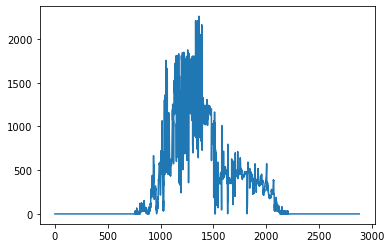

1440.0
weight:  0.0
step_now:  1440 
 our_data[step_now] 1185.0
step_next: 1441 
 our_data[step_next] 1102.0
pvc power 1185.0


In [211]:
# test for one day raw data (every 30s)
col = 4
# col.insert(0, 0)
print(col)
our_data = np.loadtxt('/Users/Huang/Documents/DQNBattery/data/house212_2019_sift/house212_20190412.csv', delimiter=',', skiprows=1, usecols=col)

# data_h212 = np.loadtxt("/Users/Huang/Documents/DQNBattery/data/house212_2019_sift/house212_20190101.csv")
print(our_data, our_data.size)
# pvc_212 = data_h212[""]
plt.plot(our_data)
plt.show()

count_s = 3600*12 # how many seconds have passed
count_t = float(count_s)/30  # set counter for data which is collected every 30s
print(count_t)
weight = count_t-int(count_t)
print("weight: ", weight)

step_now =  int((count_t) % 2880)
print("step_now: ", step_now, "\n", "our_data[step_now]", our_data[step_now])

step_next =  int((count_t+1) % 2880)
print("step_next:", step_next, "\n", "our_data[step_next]", our_data[step_next])

if int(count_t+1) >= our_data.size:
    logger.debug("no more our_data radiation data")
    print(False)
# for oesid in oesunits:
#     oesunits[oesid]["emu"]["pvc_charge_power"] = round((1-weight)*our_data[step_now] + weight*our_data[step_next], 2)  # our_data[W]
#     print("pvc", oesunits)

print("pvc power", round((1-weight)*our_data[step_now] + weight*our_data[step_next], 2))
# print((1-weight)*our_data[step_now] + weight*our_data[step_next])

In [206]:
count_s % 2880

0